In [1]:
# Importing the required libraries

# import 'Numpy'
import numpy as np

# import 'Pandas' 
import pandas as pd

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import color package from matplotlib
from matplotlib.colors import ListedColormap

# import 'Seaborn'
import seaborn as sns

# to suppress warnings
from warnings import filterwarnings
filterwarnings('ignore')

# import regular expression
import re

# import ast
import ast

# display all columns of the dataframe
pd.options.display.max_columns = None

# import label encoder , ordinal encoder , onehot encoder 
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

# import stats for performing statistical tests
import scipy.stats as stats

# import train-test split
from sklearn.model_selection import train_test_split

# import PowerTransformer
from sklearn.preprocessing import PowerTransformer,StandardScaler

# import SMOTE to create synthetic data
from imblearn.over_sampling import SMOTE

# import various functions from sklearn
from sklearn.metrics import accuracy_score,roc_curve,roc_auc_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import KFold,GridSearchCV

# import Linear Regression
from sklearn.linear_model import LinearRegression

# import statsmodels
import statsmodels.api as sma

# import Logistic Regression
from sklearn.linear_model import LogisticRegression

# import DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier

# import tree to visualize DecisiontTree
from sklearn import tree

# import RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# import AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier

# import GradientBoosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

# import XtremeGradientBoost Classifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

# **PROBLEM STATEMENT**

**Develop a classification model to predict the booking status (canceled or not canceled) based on 
the provided booking information. The model should use features such as the number of adults 
and children, length of stay, meal plan, parking requirements, room type, lead time, and previous 
booking and cancellation history to accurately 
classify whether a booking will be canceled or 
not. The objective is to develop a reliable model 
that can help hotel management to identify 
potential cancellations in advance and take 
appropriate measures to reduce the impact on 
their business. 
The model's performance should be evaluated 
based on metrics such as accuracy, precision, 
recall, and F1 score. The model should be able to 
provide actionable insights to the hotel 
management team for better decision-making and business planning.**


### **Importing the dataset**

In [3]:
df = pd.read_csv('Hotel Reservations.csv')

**About this file**

The file contains the different attributes of customers' reservation details. The detailed data dictionary is given below.

**Data Dictionary**

**Booking_ID**: unique identifier of each booking

**no_of_adults**: Number of adults

**no_of_children**: Number of Children

**no_of_weekend_nights**: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

**no_of_week_nights**: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

**type_of_meal_plan**: Type of meal plan booked by the customer:

**required_car_parking_space**: Does the customer require a car parking space? (0 - No, 1- Yes)

**room_type_reserved**: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

**lead_time**: Number of days between the date of booking and the arrival date

**arrival_year**: Year of arrival date

**arrival_month**: Month of arrival date

**arrival_date**: Date of the month

**market_segment_type**: Market segment designation.

**repeated_guest**: Is the customer a repeated guest? (0 - No, 1- Yes)

**no_of_previous_cancellations**: Number of previous bookings that were canceled by the customer prior to the current booking

**no_of_previous_bookings_not_canceled**: Number of previous bookings not canceled by the customer prior to the current booking

**avg_price_per_room**: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)

**no_of_special_requests**: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

**booking_status**: Flag indicating if the booking was canceled or not.

In [4]:
df.head()

Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_Type 1          5          2018             11             6   
2        Room_Type 1          1          2018              2            28   
3        Room_Type 1        211          2018              5            20   
4        Room_Type 1         48          2018              4            11   

  market_segment_type  repeated_guest  no_of_previous_cancellations  \
0             Offline               0                             0   
1              Online               0                             0   
2              Online               0                             0   
3              Online               0                             0   
4              Online               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [5]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Descriptive Statistics

In [6]:
# Description of the dataset
df.describe().T

count         mean        std     min  \
no_of_adults                          36275.0     1.844962   0.518715     0.0   
no_of_children                        36275.0     0.105279   0.402648     0.0   
no_of_weekend_nights                  36275.0     0.810724   0.870644     0.0   
no_of_week_nights                     36275.0     2.204300   1.410905     0.0   
required_car_parking_space            36275.0     0.030986   0.173281     0.0   
lead_time                             36275.0    85.232557  85.930817     0.0   
arrival_year                          36275.0  2017.820427   0.383836  2017.0   
arrival_month                         36275.0     7.423653   3.069894     1.0   
arrival_date                          36275.0    15.596995   8.740447     1.0   
repeated_guest                        36275.0     0.025637   0.158053     0.0   
no_of_previous_cancellations          36275.0     0.023349   0.368331     0.0   
no_of_previous_bookings_not_canceled  36275.0     0.153411   1.754171     0.0   
avg_price_per_room                    36275.0   103.423539  35.089424     0.0   
no_of_special_requests                36275.0     0.619655   0.786236     0.0   

                                         25%      50%     75%     max  
no_of_adults                             2.0     2.00     2.0     4.0  
no_of_children                           0.0     0.00     0.0    10.0  
no_of_weekend_nights                     0.0     1.00     2.0     7.0  
no_of_week_nights                        1.0     2.00     3.0    17.0  
required_car_parking_space               0.0     0.00     0.0     1.0  
lead_time                               17.0    57.00   126.0   443.0  
arrival_year                          2018.0  2018.00  2018.0  2018.0  
arrival_month                            5.0     8.00    10.0    12.0  
arrival_date                             8.0    16.00    23.0    31.0  
repeated_guest                           0.0     0.00     0.0     1.0  
no_of_previous_cancellations             0.0     0.00     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.00     0.0    58.0  
avg_price_per_room                      80.3    99.45   120.0   540.0  
no_of_special_requests                   0.0     0.00     1.0     5.0

1. Number of Adults: On average, there are approximately 1.84 adults per booking, with a standard deviation of 0.52. Most bookings involve 2 adults.

2. Number of Children: The average number of children per booking is very low, with a mean of 0.11. The majority of bookings do not have any children.

3. Weekend Nights: On average, bookings include 0.81 weekend nights, with a standard deviation of 0.87. The majority of bookings have at least one weekend night.

4. Week Nights: The average number of week nights per booking is 2.20, with a standard deviation of 1.41. Most bookings include a 2-night week stay.

5. Required Car Parking Space: Only a small proportion of bookings (approximately 3%) require a car parking space.

6. Lead Time: The average lead time, which is the time between booking and arrival, is approximately 85.23 days, with a standard deviation of 85.93 days. The lead time varies widely, ranging from 0 to 443 days.

7. Arrival Year, Month, and Date: The data primarily consists of arrivals in the year 2018. The most common arrival month is July, and the most common arrival date is around the middle of the month.

8. Repeated Guest: The majority of bookings are from non-repeated guests, with repeated guests accounting for only about 2.6% of the bookings.

9. Previous Cancellations and Previous Bookings Not Canceled: Most bookings have no previous cancellations or previous bookings not canceled. However, a small proportion of bookings have had cancellations or previous bookings not canceled, with some outliers having higher values.

10. Average Price per Room: The average price per room is approximately 103.42 dollars, with a standard deviation of 35.09 dollars. The prices range from 0 to 540 dollars.

11. Number of Special Requests: On average, bookings have 0.62 special requests, with a standard deviation of 0.79. The majority of bookings do not have any special requests, but some bookings have multiple special requests, with a maximum of 5 requests.

In [7]:
df.describe(exclude=np.number).T

count unique           top   freq
Booking_ID           36275  36275      INN00001      1
type_of_meal_plan    36275      4   Meal Plan 1  27835
room_type_reserved   36275      7   Room_Type 1  28130
market_segment_type  36275      5        Online  23214
booking_status       36275      2  Not_Canceled  24390

1. Among the 36,275 instances, the variable "type_of_meal_plan" consists of four unique classes. The most common meal plan, labeled as "Meal Plan 1," appears 27,835 times, indicating it is the majority choice among the customers.

2. The variable "room_type_reserved" has seven distinct classes, and based on the provided data, "Room_Type 1" is the prevailing room type with a count of 28,130, making it the most frequently selected option.

3. Analyzing the "market_segment_type," which encompasses five categories, the highest count is attributed to the "Online" segment, occurring 23,214 times. This suggests that online bookings are the most popular method among the available market segments.

4. The target variable, "booking_status," shows two possible classes. The majority class is "Not_Canceled," indicating that out of the total bookings, 24,390 instances were honored, demonstrating a higher proportion (67%) compared to the other class.

### Check the datatypes of each variable

In [8]:
# Get the list of columns in my dataset
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

### Dropping irrelevant columns in dataset

Dropping 'Booking_ID' column since this does not contribute much to the prediction booking status.

In [9]:
df.drop(columns='Booking_ID',axis=1,inplace=True)

### Split the categories as numerical and categorical

In [10]:
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

In [11]:
df_num.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [12]:
df_cat.columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

### Missing values

In [13]:
# Check if there are any null values in our variables

df.isnull().sum() / df.shape[0]

no_of_adults                            0.0
no_of_children                          0.0
no_of_weekend_nights                    0.0
no_of_week_nights                       0.0
type_of_meal_plan                       0.0
required_car_parking_space              0.0
room_type_reserved                      0.0
lead_time                               0.0
arrival_year                            0.0
arrival_month                           0.0
arrival_date                            0.0
market_segment_type                     0.0
repeated_guest                          0.0
no_of_previous_cancellations            0.0
no_of_previous_bookings_not_canceled    0.0
avg_price_per_room                      0.0
no_of_special_requests                  0.0
booking_status                          0.0
dtype: float64

In [14]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')

There are 36275 rows and 18 columns in the dataset.


**There are no null values in the given dataset. Thus there is no requirement to do treatment.**

### **Univariate Analysis**

Checking correlation for the variables

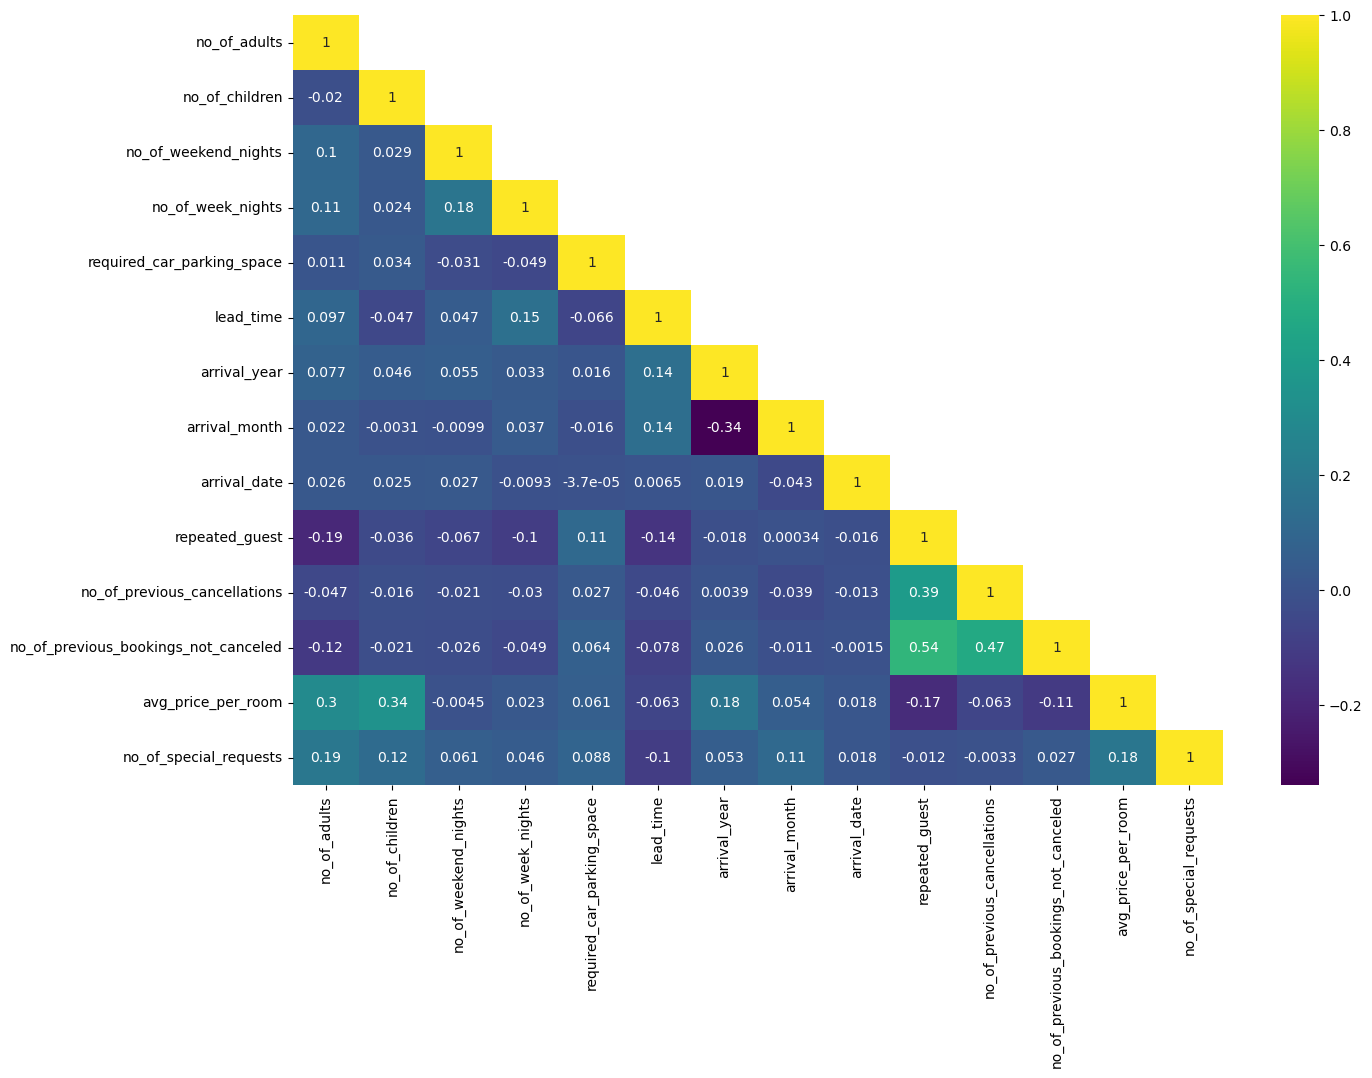

In [15]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.heatmap(df.corr(),annot=True,cmap='viridis',mask=np.triu(df.corr(),+1))
plt.show()

There are no strong correlation among the variables

In [16]:
df['no_of_adults'].value_counts()

2    26108
1     7695
3     2317
0      139
4       16
Name: no_of_adults, dtype: int64

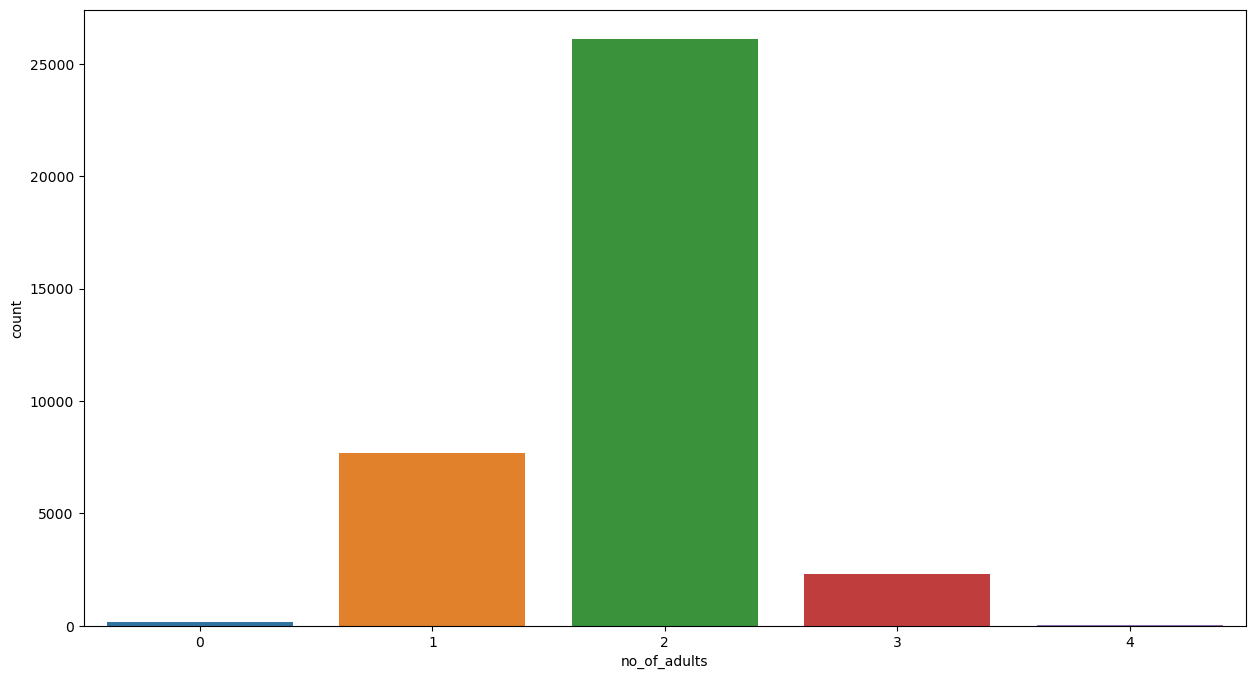

In [17]:
sns.countplot(x=df['no_of_adults'])
plt.show()

Majority of the reservations in hotels is for 2 adults with the count of 26108 reservation followed up by a single adult reservation of count 7695 and then comes three adult checkin.

In [18]:
df['no_of_children'].value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: no_of_children, dtype: int64

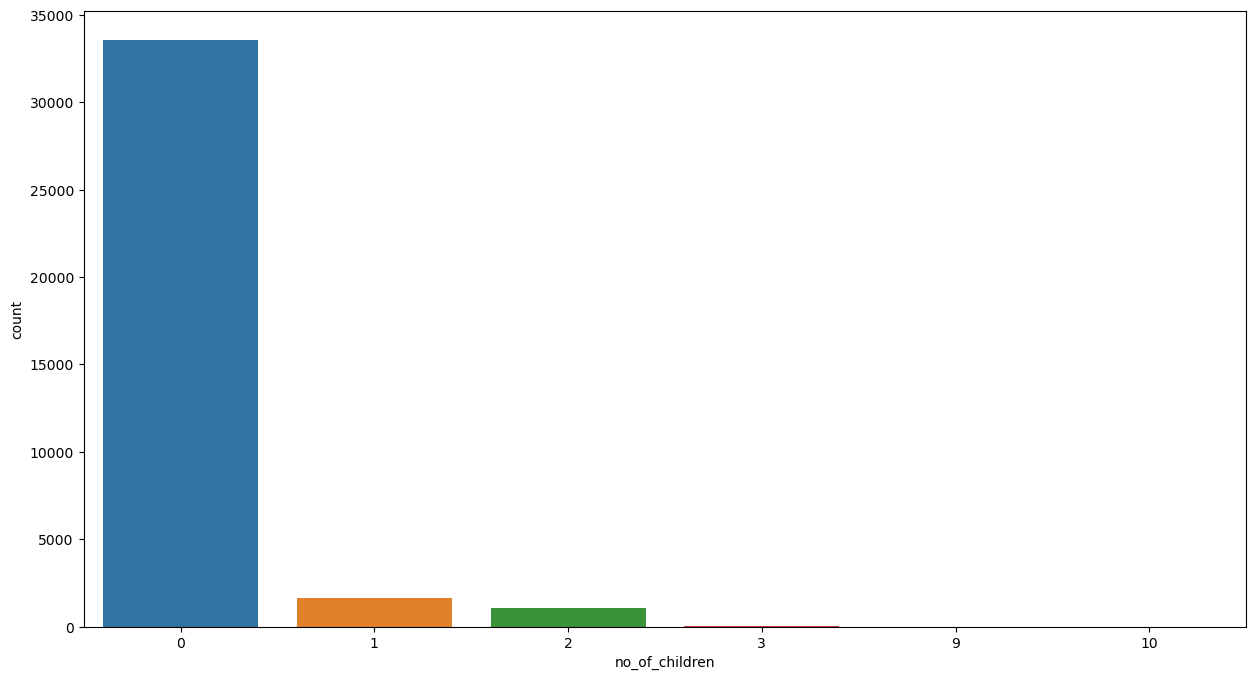

In [19]:
sns.countplot(x=df['no_of_children'])
plt.show()

Majority of the reservations in hotels is for 0 children with the count of 33577 reservations followed up by a single child reservation of count 1618 and then comes two children and three children checkin.

In [20]:
df['no_of_weekend_nights'].value_counts()

0    16872
1     9995
2     9071
3      153
4      129
5       34
6       20
7        1
Name: no_of_weekend_nights, dtype: int64

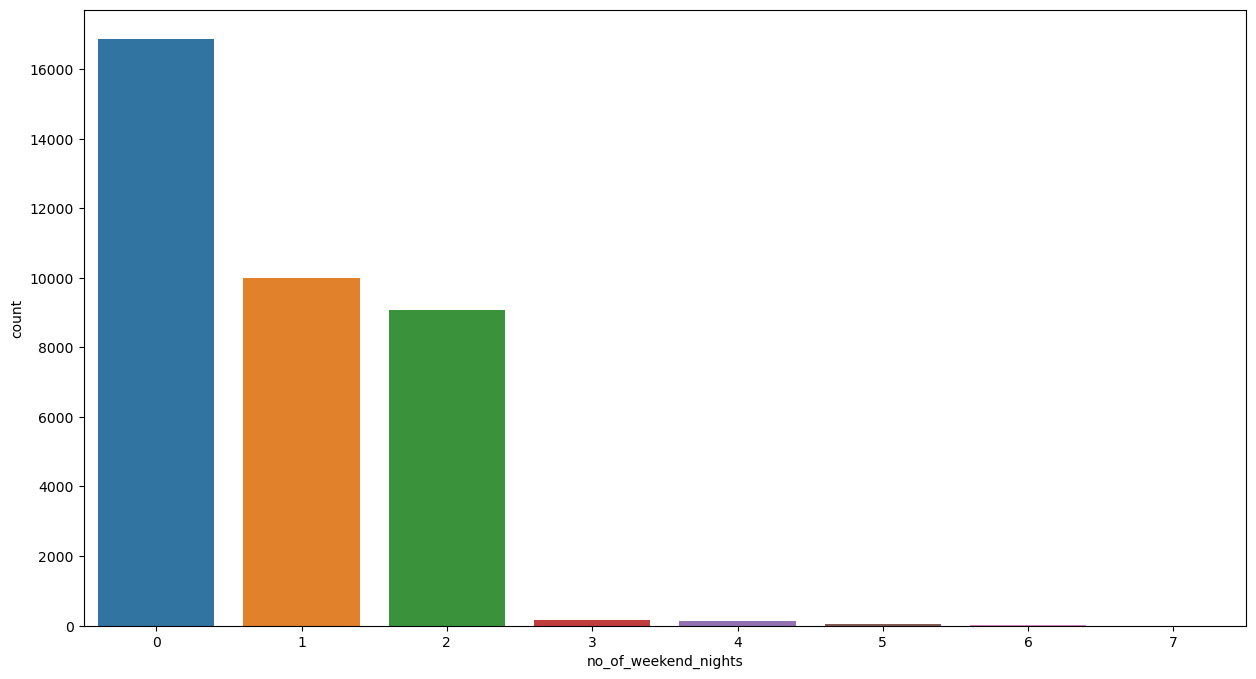

In [21]:
sns.countplot(x=df['no_of_weekend_nights'])
plt.show()

The majority of bookings (16,872 instances) were for stays with zero weekend nights, indicating that a significant portion of the bookings were for weekday stays.

There were 9,995 bookings where guests stayed for one weekend night, indicating a significant number of single-night weekend stays.

Bookings with two weekend nights were also relatively common, with a count of 9,071.
Stays with three, four, five, six, and seven weekend nights were less frequent, with counts of 153, 129, 34, 20, and 1 respectively.

In [22]:
df['no_of_week_nights'].value_counts()

2     11444
1      9488
3      7839
4      2990
0      2387
5      1614
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: no_of_week_nights, dtype: int64

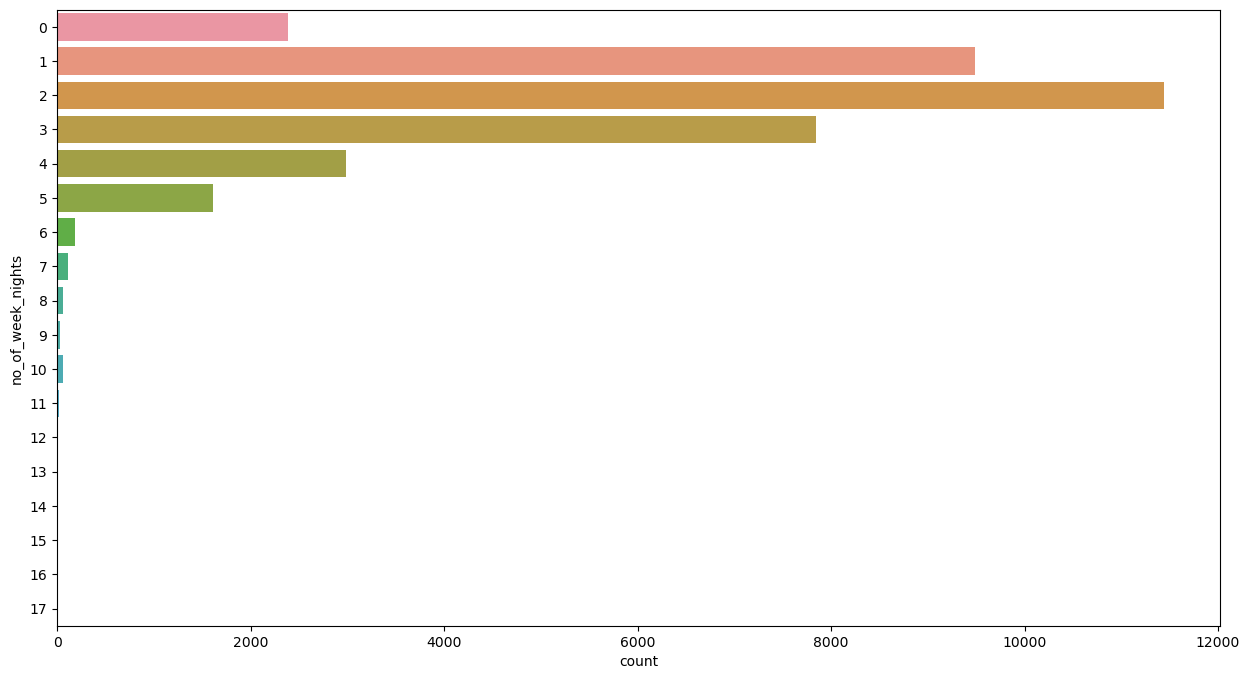

In [23]:
sns.countplot(y=df['no_of_week_nights'])
plt.show()

The most common number of weeknights stayed was 2, with a count of 11,444, indicating that a significant portion of bookings included a two-night stay during weekdays.

Bookings with one weeknight were also fairly common, with a count of 9,488.

Stays with three weeknights were relatively frequent as well, with a count of 7,839.

As the number of weeknights increased, the count of bookings decreased gradually. For instance, there were 2,387 bookings with zero weeknights, and 1,614 bookings with five weeknights.

Stays with six, seven, and ten weeknights were less common, with counts of 189, 113, and 62 respectively.

The least common durations were 8, 9, 11, 15, 12, 14, 13, 17, and 16 weeknights, with decreasing counts ranging from 62 to 2.

In [24]:
df['type_of_meal_plan'].value_counts()

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

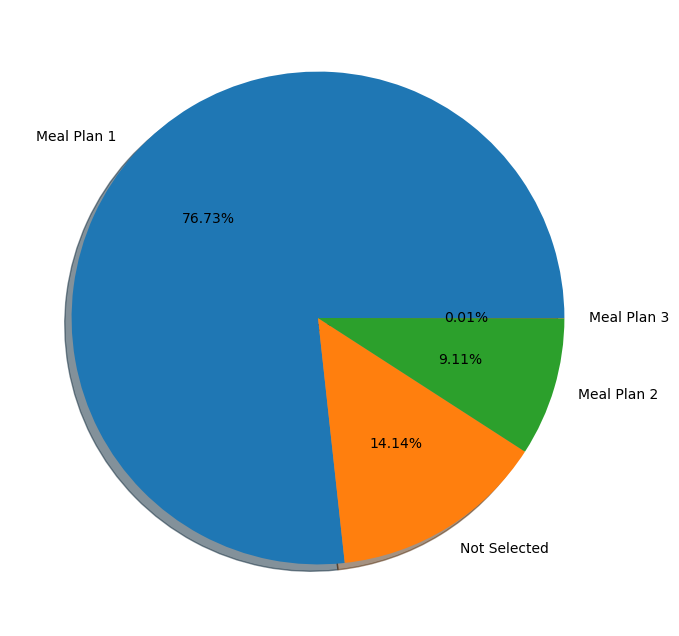

In [25]:
plt.pie(df['type_of_meal_plan'].value_counts(),labels=df['type_of_meal_plan'].unique(),shadow=True,autopct='%.2f%%')
plt.show()

The most commonly chosen meal plan among the bookings is "Meal Plan 1" with a count of 27,835, indicating it is the preferred choice for a majority of the customers.

There were 5,130 instances where no meal plan was selected, suggesting that a portion of the bookings did not include any specific meal plan.

"Meal Plan 2" was chosen in 3,305 bookings, making it the second most popular meal plan option among the customers.

Only a small number of bookings, specifically 5 instances, opted for "Meal Plan 3," indicating it is the least preferred meal plan choice among the available options.

In [26]:
df['required_car_parking_space'].value_counts()

0    35151
1     1124
Name: required_car_parking_space, dtype: int64

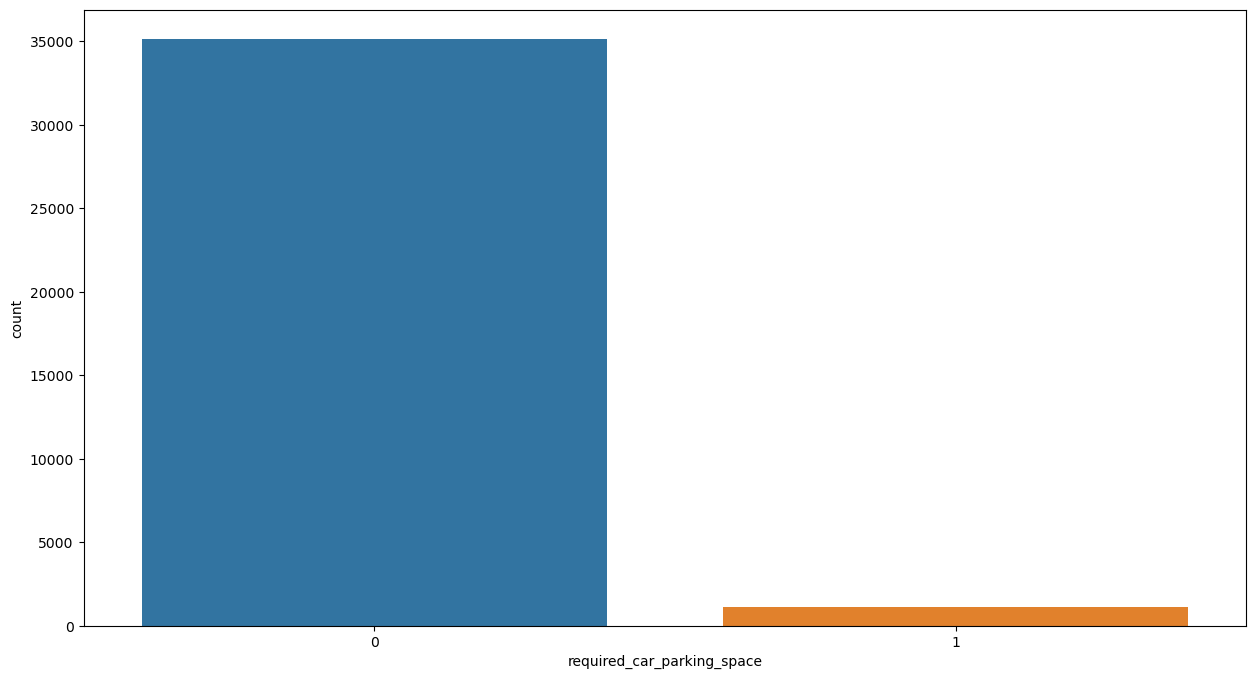

In [27]:
sns.countplot(x=df['required_car_parking_space'])
plt.show()

The majority of instances, 35,151 in total, indicate the absence of car space, suggesting that a significant portion of the bookings or accommodations do not provide designated parking for vehicles.

There are 1,124 instances where car space is present, indicating that a smaller proportion of the bookings or accommodations offer dedicated parking facilities.

In [28]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

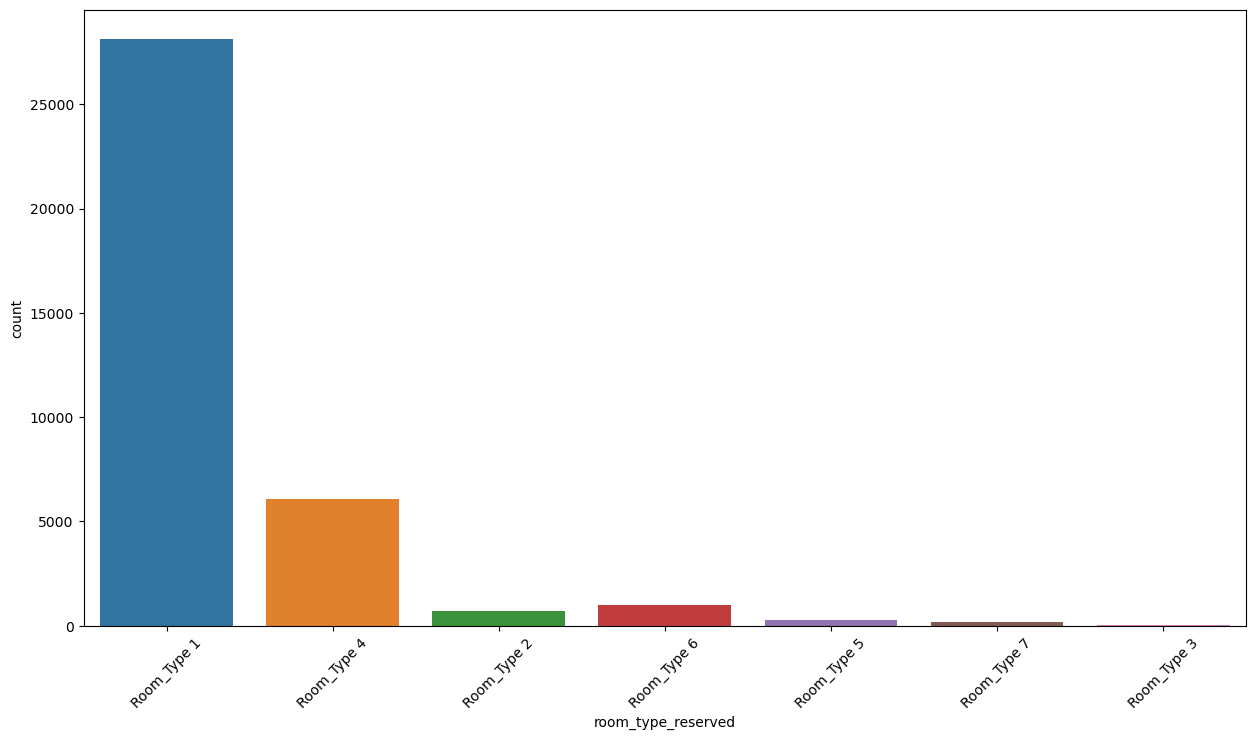

In [29]:
sns.countplot(x=df['room_type_reserved'])
plt.xticks(rotation=45)
plt.show()

"Room_Type 1" is the most common room type, with a count of 28,130, indicating that it is the preferred choice among the customers.

"Room_Type 4" is the second most frequent room type, with a count of 6,057, suggesting it is a popular option among the available choices.

"Room_Type 6" has a count of 966, indicating that it is chosen less frequently compared to Room_Types 1 and 4.

"Room_Type 2," "Room_Type 5," and "Room_Type 7" are less commonly selected, with counts of 692, 265, and 158 respectively.

"Room_Type 3" has the lowest count of 7, indicating it is the least preferred room type among the available options.

In [30]:
df['lead_time'].value_counts()

0      1297
1      1078
2       643
3       630
4       628
       ... 
300       1
353       1
328       1
352       1
351       1
Name: lead_time, Length: 352, dtype: int64

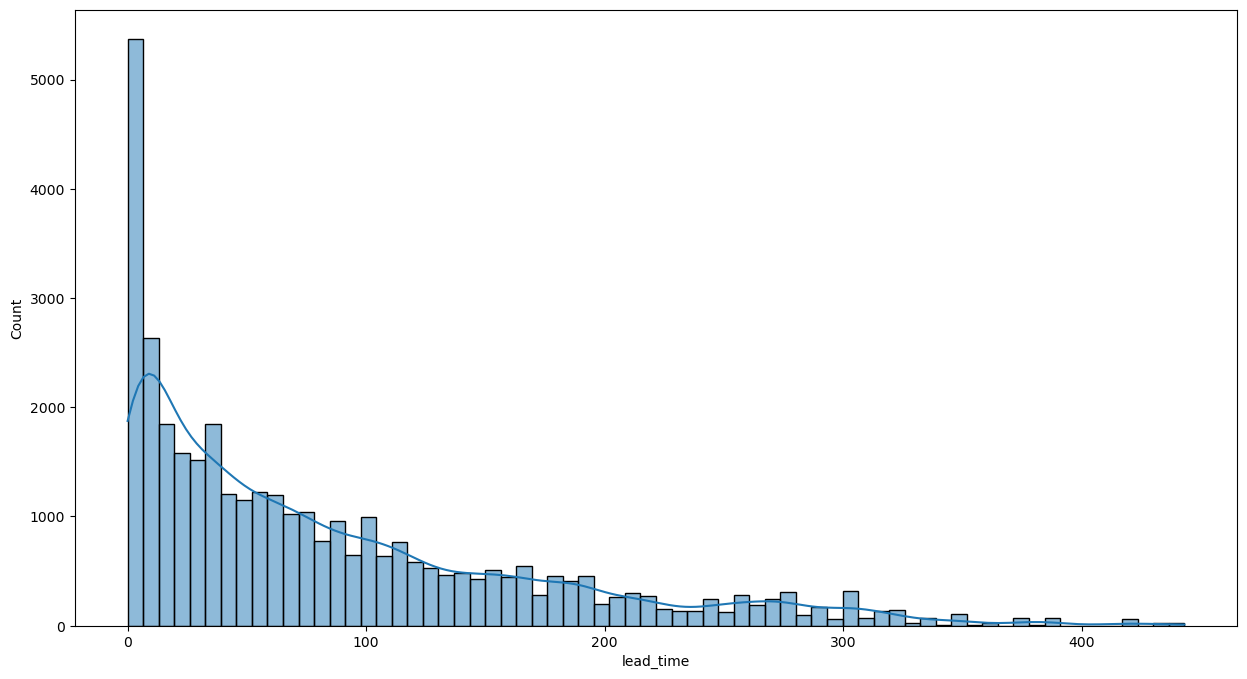

In [31]:
sns.histplot(df['lead_time'],kde=True)
plt.show()

Positively right skewed as seen in the visual. The lead time count is high for short duration but reduces with longer lead time

In [32]:
df['arrival_year'].value_counts()

2018    29761
2017     6514
Name: arrival_year, dtype: int64

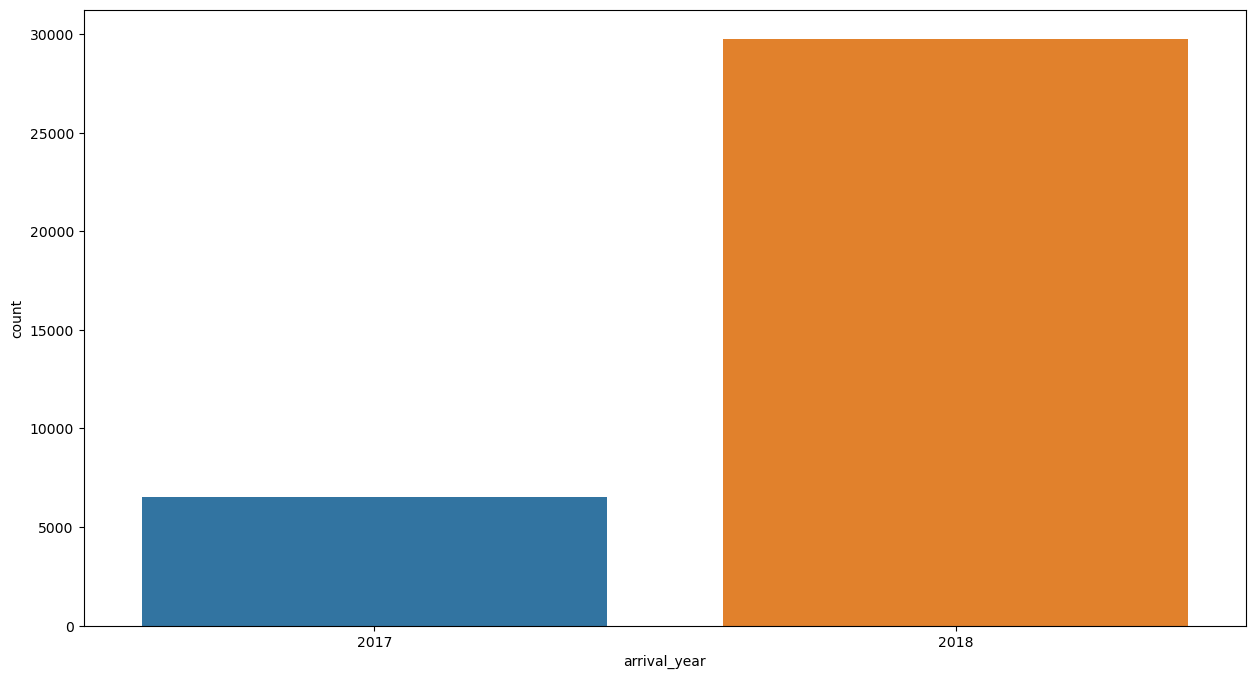

In [33]:
sns.countplot(x=df['arrival_year'])
plt.show()

In the year 2018, there were 29,761 reservations, indicating a significantly higher number of bookings compared to other years. This suggests that 2018 was a year with a substantial volume of reservations.

In contrast, the year 2017 had a relatively lower count of reservations, with 6,514 bookings. This implies that there was a decrease in the number of reservations compared to the year 2018, indicating a potentially different trend or lower demand during that particular year.

In [34]:
df['arrival_month'].value_counts()

10    5317
9     4611
8     3813
6     3203
12    3021
11    2980
7     2920
4     2736
5     2598
3     2358
2     1704
1     1014
Name: arrival_month, dtype: int64

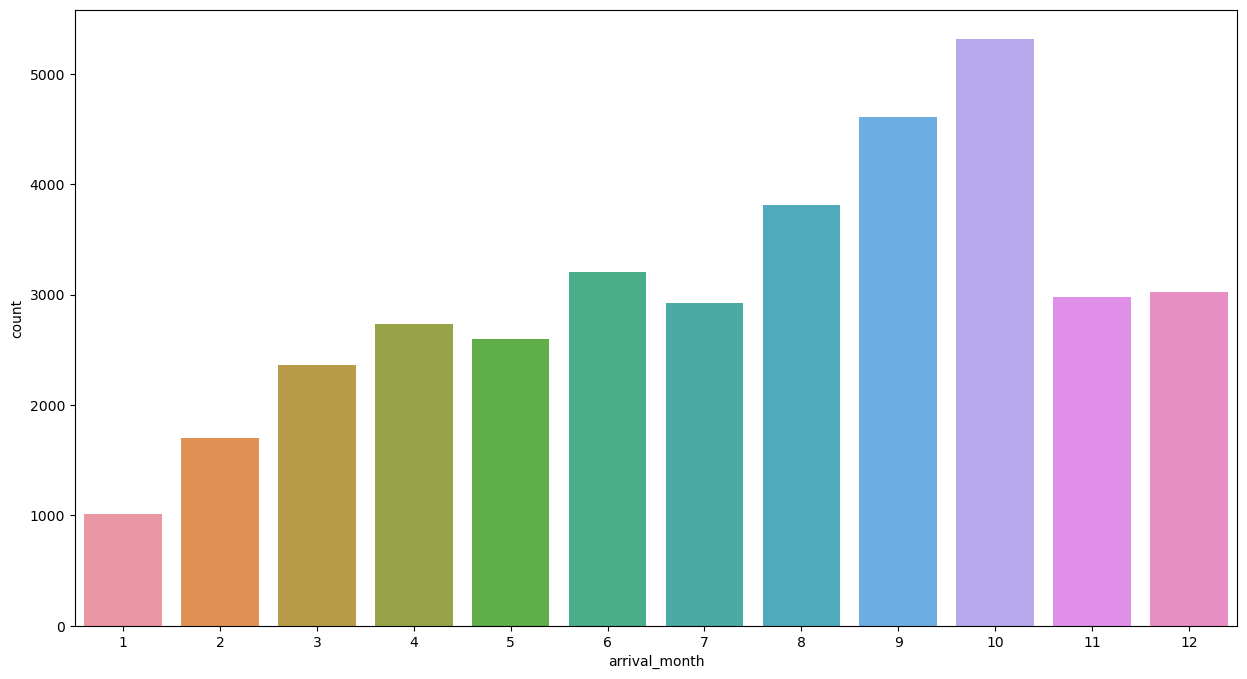

In [35]:
sns.countplot(x=df['arrival_month'])
plt.show()

The month with the highest count of reservations is October, with 5,317 bookings, suggesting that it is a popular time for making reservations.

September follows closely with 4,611 reservations, indicating it is another month with a high number of bookings.

August has 3,813 reservations, making it the third most popular month for making reservations.

The counts gradually decrease from June (3,203) to February (1,014), indicating a potential decrease in demand or fewer bookings during the winter months.

The months with the lowest counts are January (1,704) and February (1,014), suggesting that these months might have the fewest bookings among the months listed.

In [36]:
df['arrival_date'].unique()

array([ 2,  6, 28, 20, 11, 13, 15, 26, 18, 30,  5, 10,  4, 25, 22, 21, 19,
       17,  7,  9, 27,  1, 29, 16,  3, 24, 14, 31, 23,  8, 12],
      dtype=int64)

In [37]:
df['arrival_date'].value_counts()

13    1358
17    1345
2     1331
4     1327
19    1327
16    1306
20    1281
15    1273
6     1273
18    1260
14    1242
30    1216
12    1204
8     1198
29    1190
21    1158
5     1154
26    1146
25    1146
1     1133
9     1130
28    1129
7     1110
24    1103
11    1098
3     1098
10    1089
27    1059
22    1023
23     990
31     578
Name: arrival_date, dtype: int64

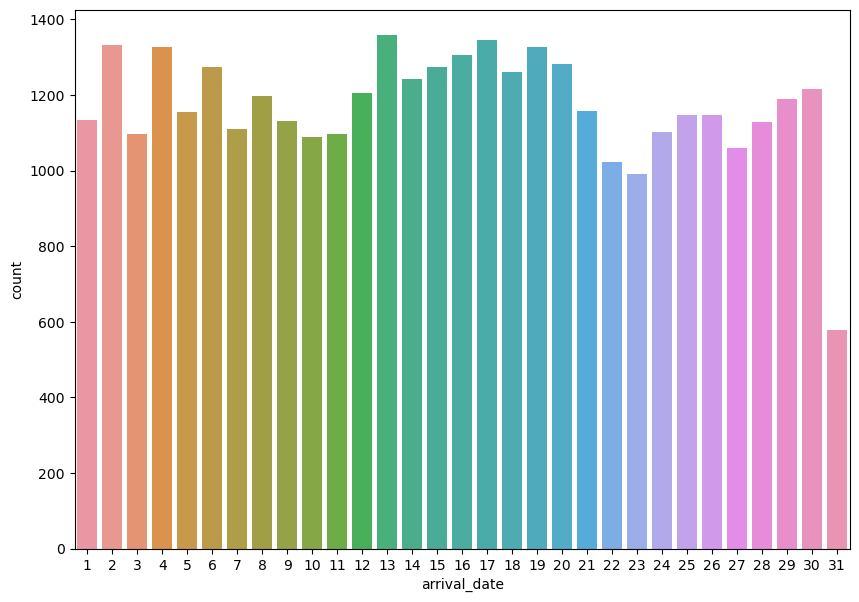

In [38]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['arrival_date'])
plt.show()

The pattern appears to be that the counts generally decrease towards the end of the month, specifically after the 20th day. This could suggest that there is a decrease in reservations made towards the end of the month, potentially due to factors such as financial considerations or planning preferences of the customers. However, it is important to note that the counts for the last few days (29th, 30th, and 31st) are noticeably lower, which could be attributed to the varying number of days in different months and the data not being normalized.

In [39]:
df['market_segment_type'].value_counts()

Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

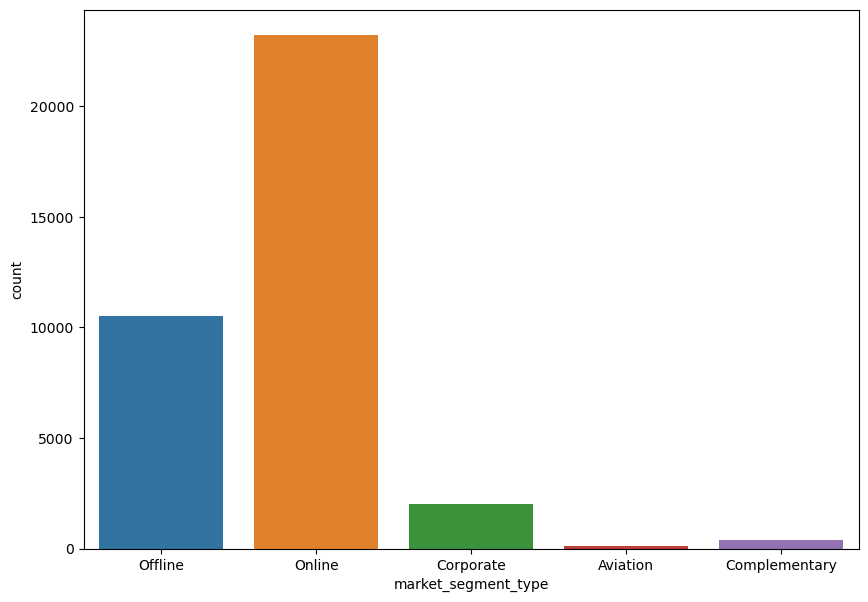

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x=df['market_segment_type'])
plt.show()

The "Online" market segment type has the highest count, with 23,214 bookings, indicating that a significant portion of the bookings were made through online channels.

The "Offline" market segment type follows with 10,528 bookings, suggesting that a notable number of bookings were made through offline channels, such as phone or in-person reservations.

The "Corporate" market segment type has a count of 2,017 bookings, indicating a relatively smaller proportion of bookings attributed to corporate clients or companies.

Bookings categorized as "Complementary" account for 391 instances, suggesting that a smaller number of bookings were provided as complimentary or free-of-charge.

The "Aviation" market segment type has the lowest count of 125 bookings, indicating a relatively small number of bookings associated with the aviation industry, such as airline crew or passengers.

In [41]:
df['repeated_guest'].value_counts()

0    35345
1      930
Name: repeated_guest, dtype: int64

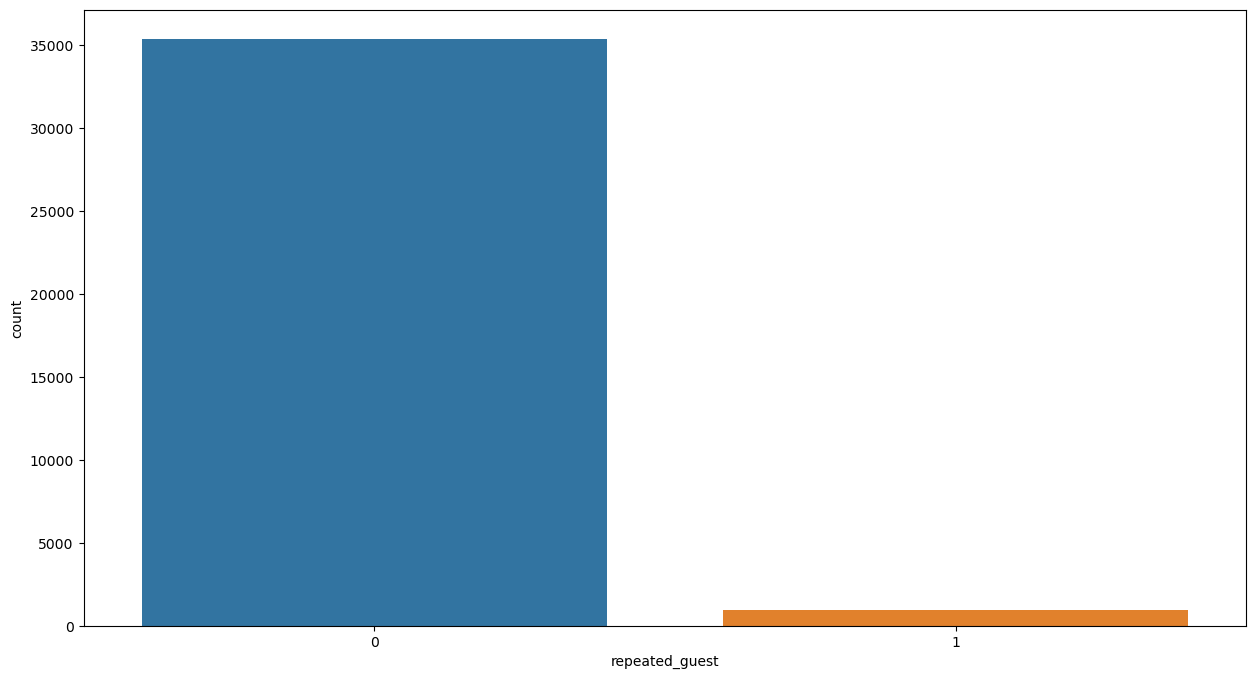

In [42]:
sns.countplot(x=df['repeated_guest'])
plt.show()

The majority of customers are non-repeated customers, with a count of 35,345. This suggests that a significant portion of the bookings were made by customers who have not previously booked with the establishment.

There are 930 instances where customers are classified as repeated customers. This indicates that a smaller number of bookings were made by customers who have previously booked with the establishment, suggesting a certain level of customer loyalty or return business.

In [43]:
df['no_of_previous_cancellations'].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6], dtype=int64)

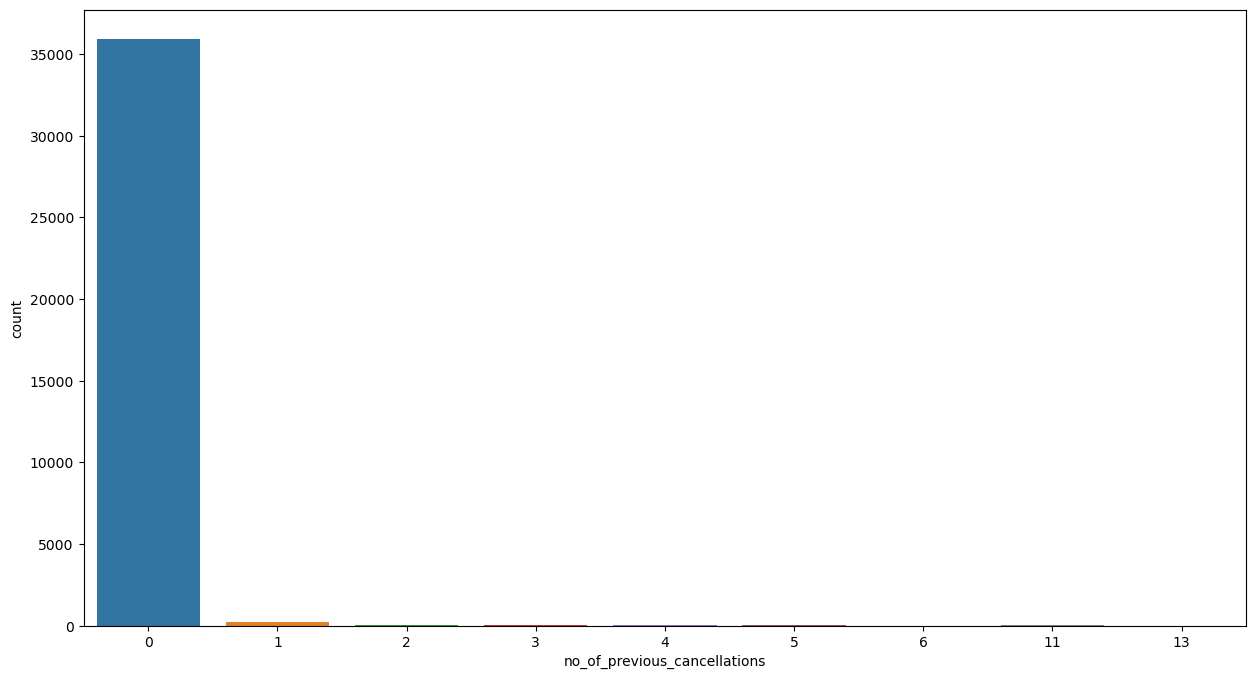

In [44]:
sns.countplot(x=df['no_of_previous_cancellations'])
plt.show()

In [45]:
df['no_of_previous_bookings_not_canceled'].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36], dtype=int64)

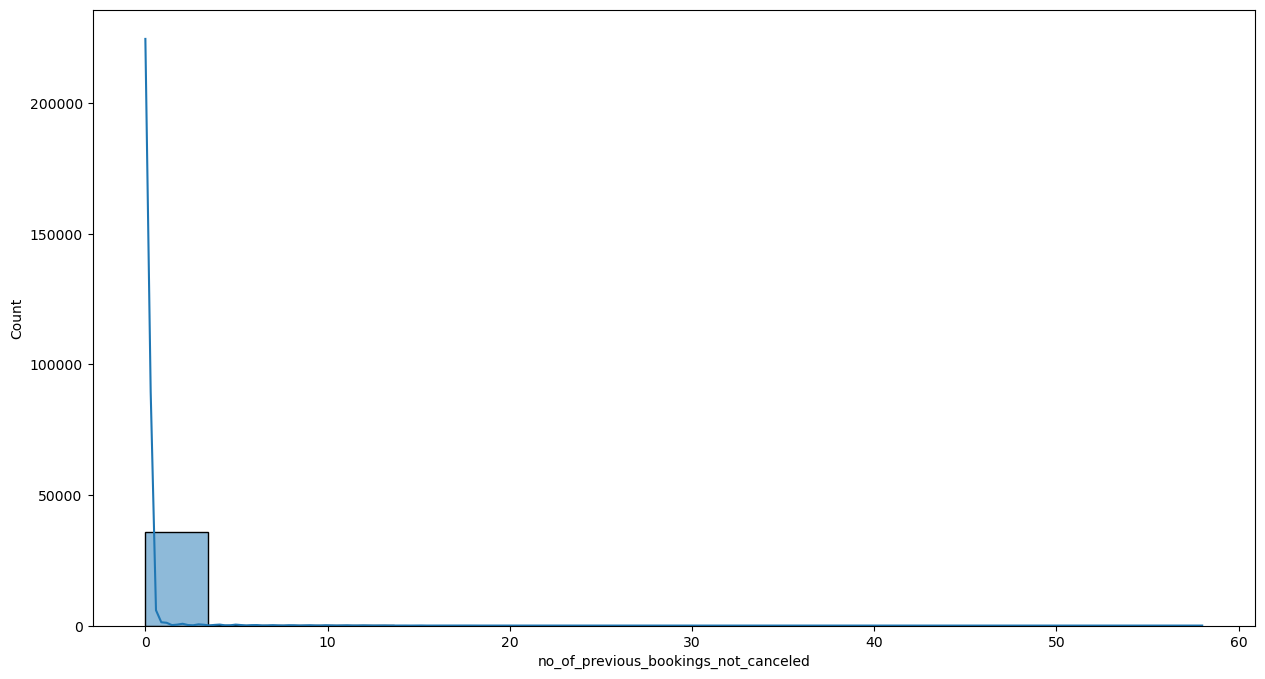

In [46]:
sns.histplot(df['no_of_previous_bookings_not_canceled'],kde=True)
plt.show()

In [47]:
df['avg_price_per_room'].value_counts()

65.00     848
75.00     826
90.00     703
95.00     669
115.00    662
         ... 
212.42      1
83.48       1
70.42       1
130.99      1
167.80      1
Name: avg_price_per_room, Length: 3930, dtype: int64

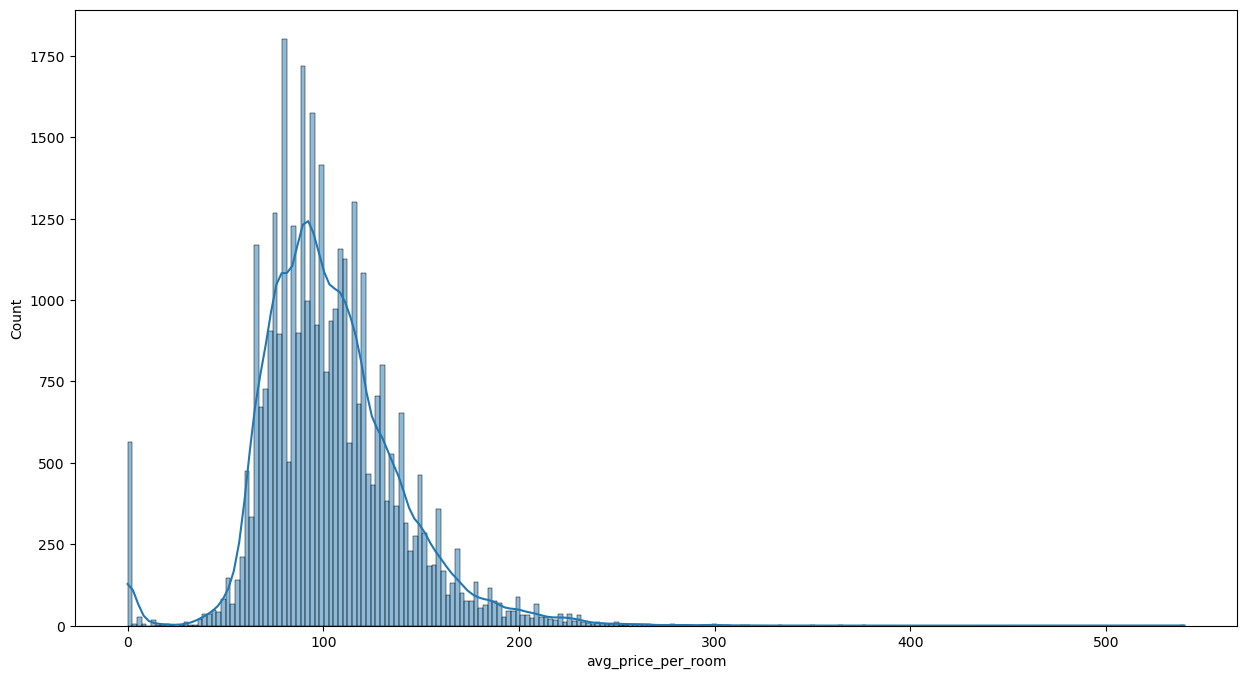

In [48]:
sns.histplot(df['avg_price_per_room'],kde=True)
plt.show()

In [49]:
df['no_of_special_requests'].value_counts()

0    19777
1    11373
2     4364
3      675
4       78
5        8
Name: no_of_special_requests, dtype: int64

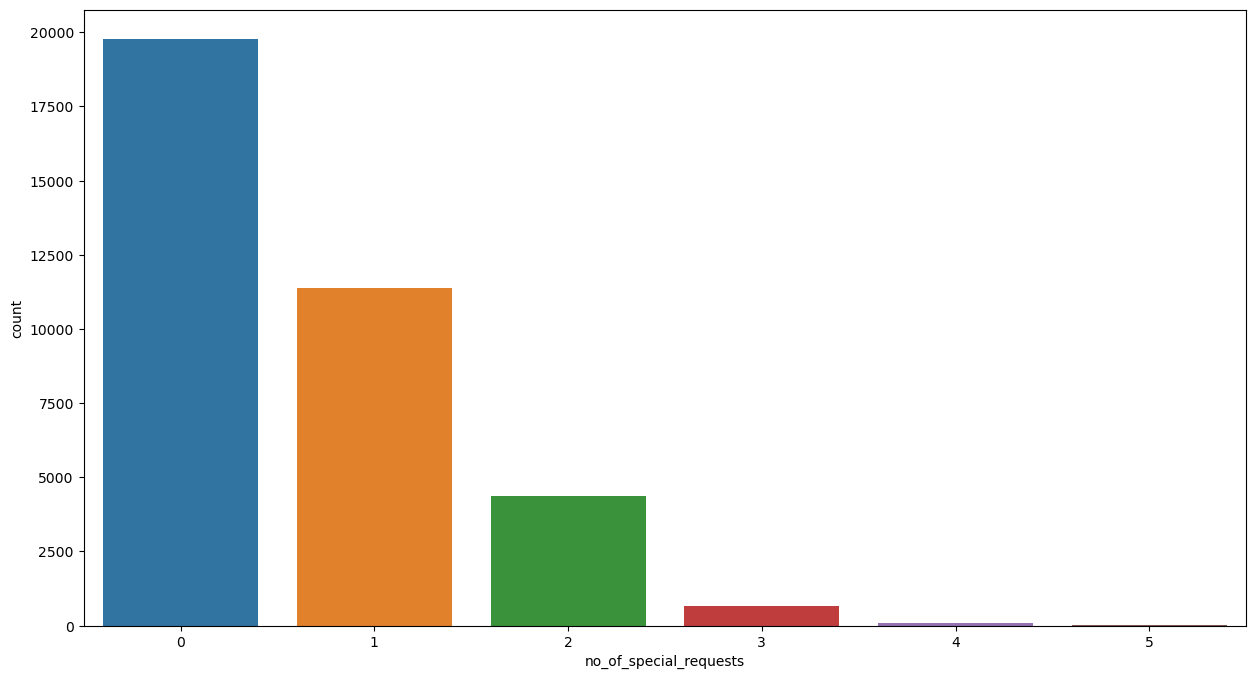

In [50]:
sns.countplot(x=df['no_of_special_requests'])
plt.show()

The majority of bookings, with a count of 19,777, did not involve any special requests, indicating that a significant portion of customers did not have specific additional requirements during their stay.

There were 11,373 bookings where customers made one special request, suggesting that a considerable number of customers had specific needs or preferences that required attention.

Bookings with two, three, four, and five special requests were less frequent, with counts of 4,364, 675, 78, and 8 respectively. This indicates that as the number of special requests increases, the count decreases, suggesting that a smaller proportion of customers made multiple special requests.

In [51]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

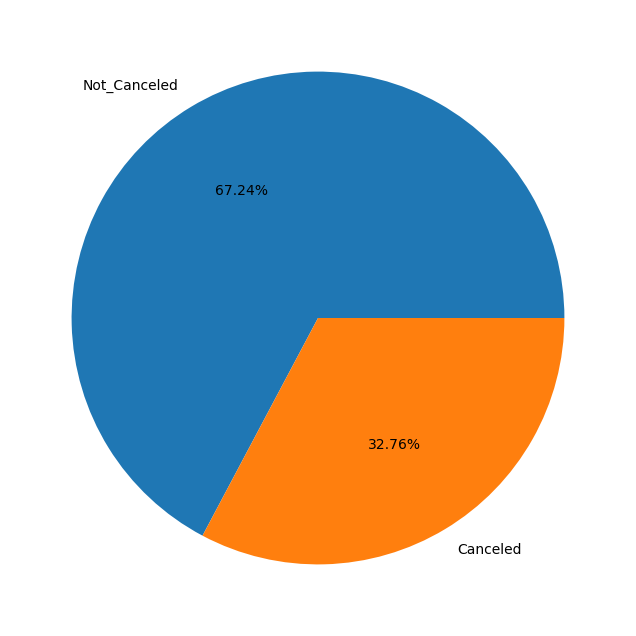

In [52]:
plt.figure.figsize=(10,7)
plt.pie(df['booking_status'].value_counts(),labels=df['booking_status'].unique(),autopct='%.2f%%')
plt.show()

The majority of reservations, with a count of 24,390, were labeled as "Not_Canceled," indicating that the bookings were honored, and the customers proceeded with their planned stays.

There were 11,885 reservations labeled as "Canceled," suggesting that a significant number of bookings were not honored or were canceled before the planned stay, reflecting a proportion of cancellations or changes in the reservation status.

**Check for Outliers**

In [53]:
df_num.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

<Figure size 1500x800 with 0 Axes>

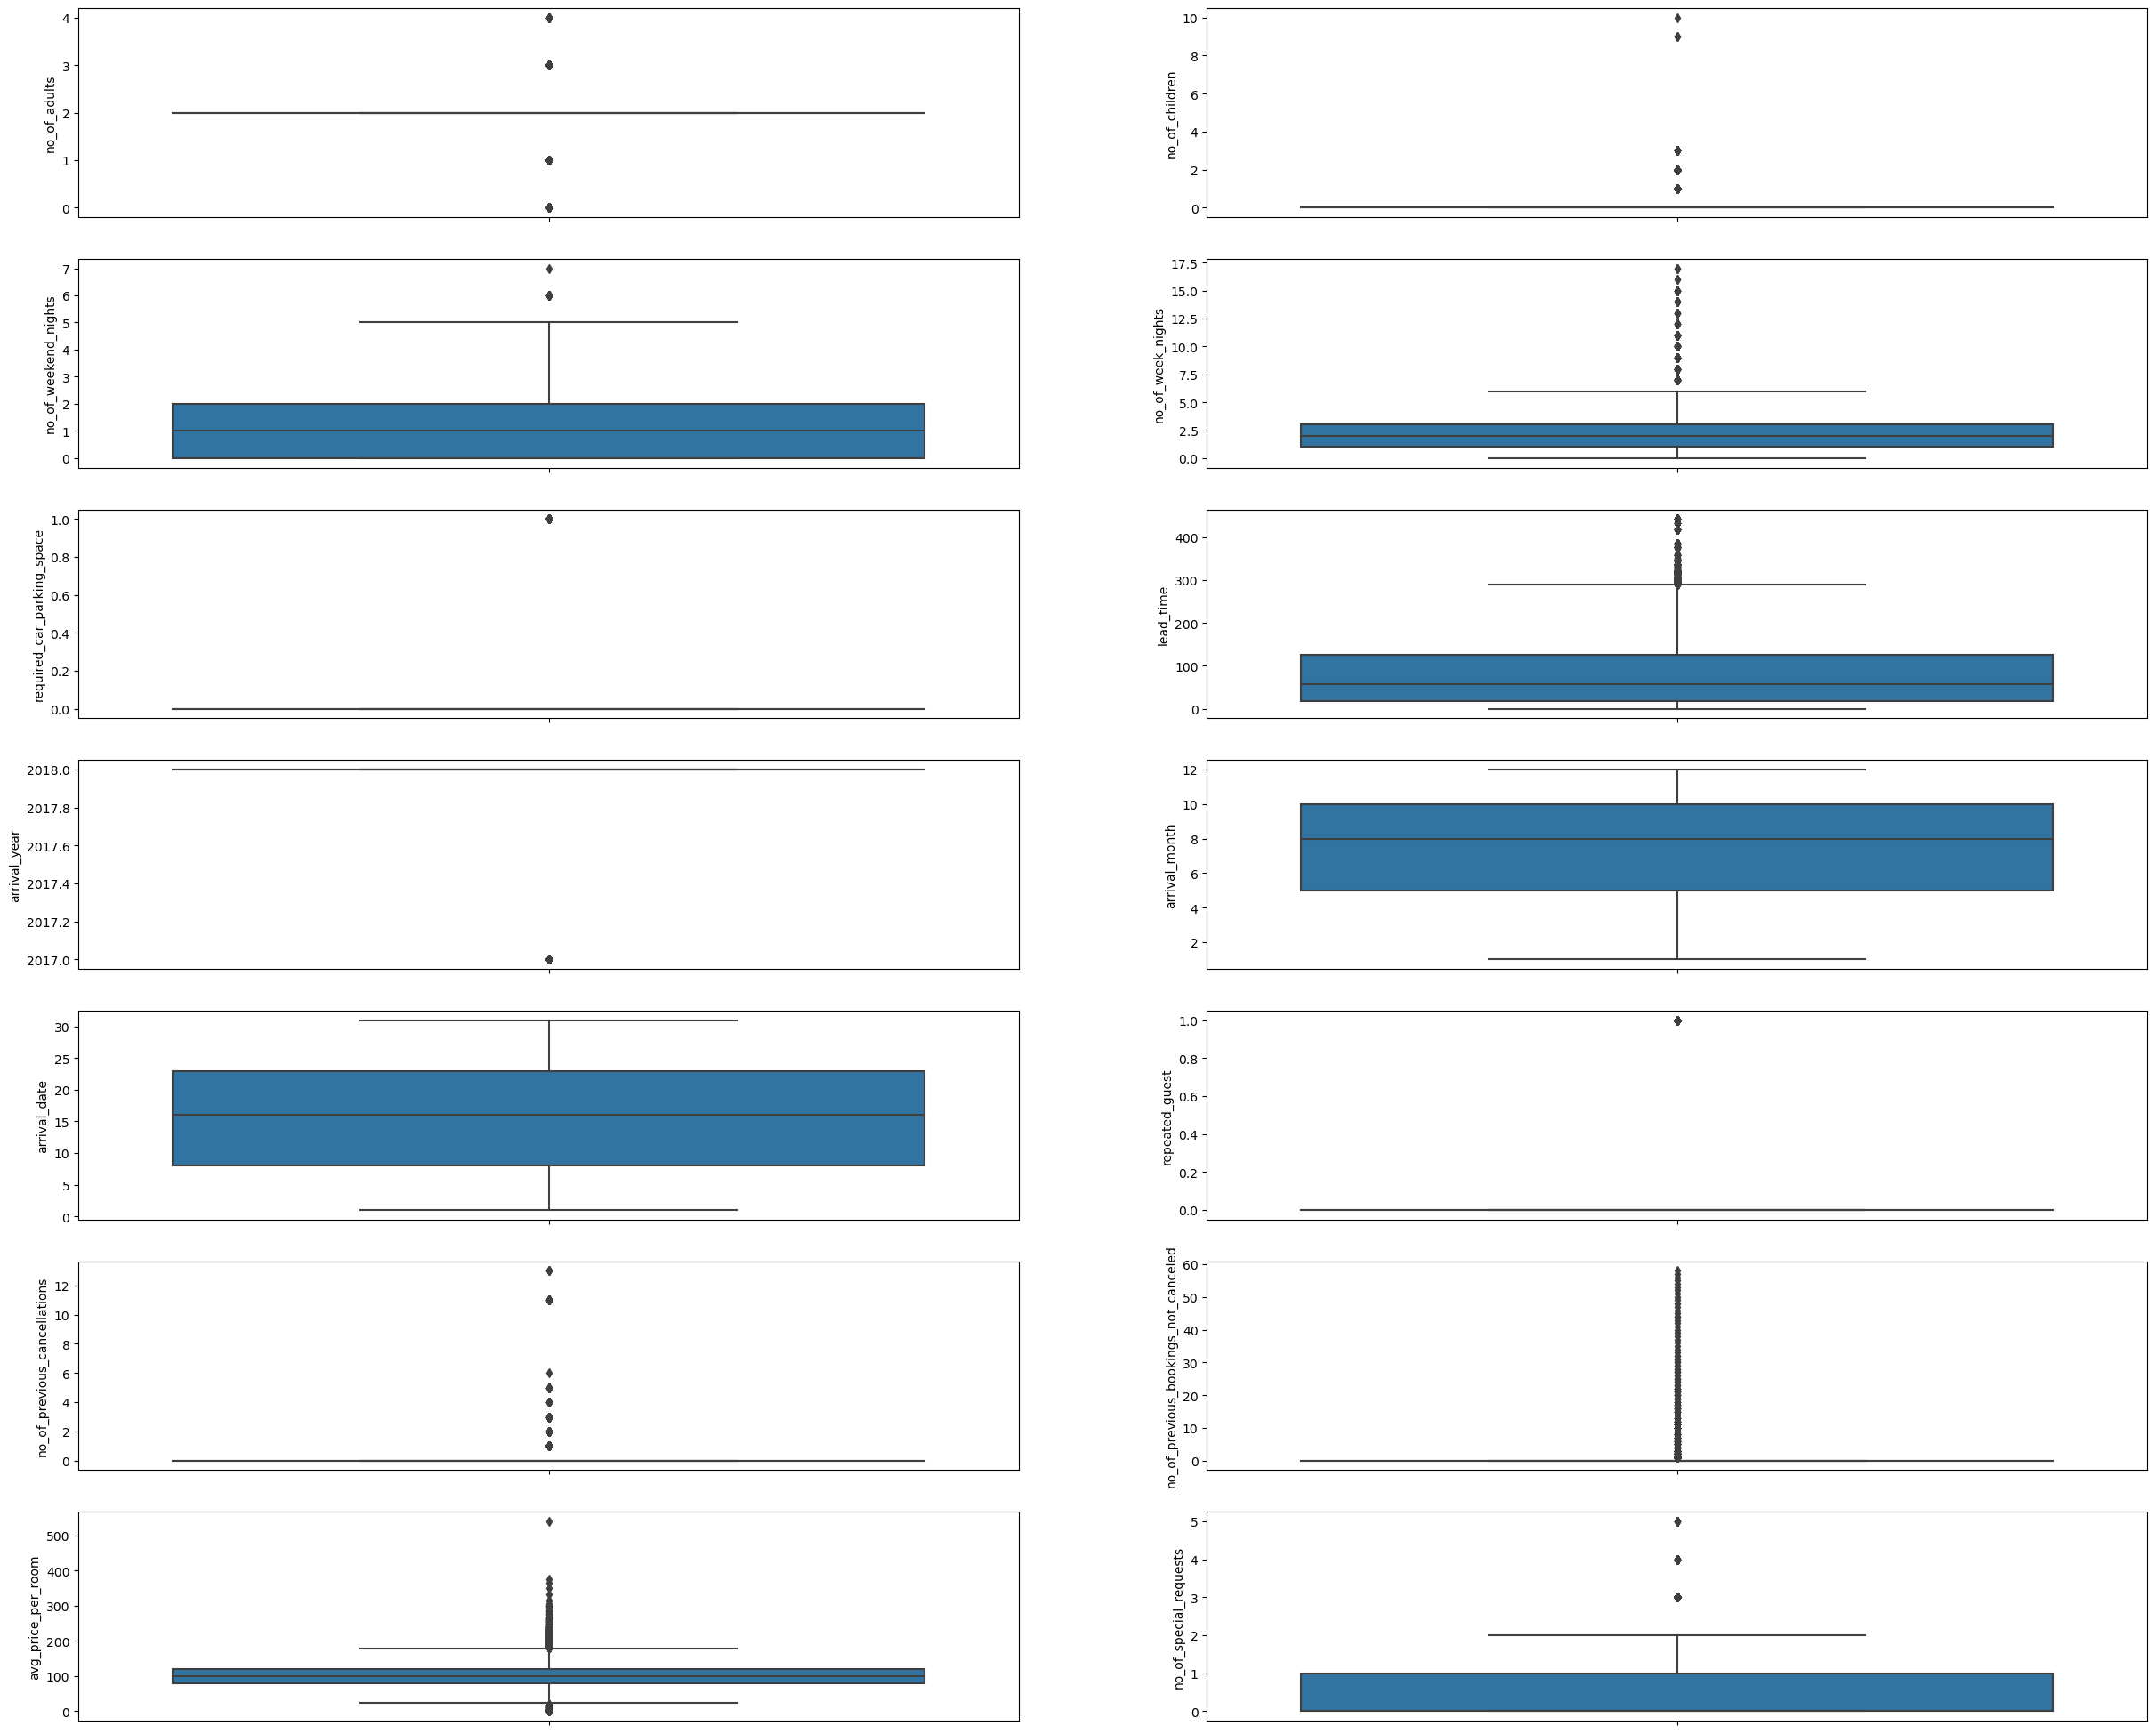

In [54]:
plt.figure.figsize=(18,25)
plt.tight_layout()
fig,ax = plt.subplots(nrows=7,ncols=2,figsize=(30,25))
for i,subplot in zip(df_num.columns,ax.flatten()):
  sns.boxplot(y=df_num[i],ax=subplot)
plt.show()

# **Bivariate Analysis**

With 'booking_status' as the target variable we can try to get many insights by comparing it with other features. 

From the understanding of the dataset and the business problem the person who asks for special requests is less likely to cancel his booking and the person who is a repeated guest is less likely to cancel his booking too. From the visualization we have to see if there is any pattern with the lead_time variable. Also considering the market segment type the person who books the hotel offline has less chances of cancelling his booking and this can be verified with our analysis.

In [55]:
df_num.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [56]:
df_cat.columns

Index(['type_of_meal_plan', 'room_type_reserved', 'market_segment_type',
       'booking_status'],
      dtype='object')

In [57]:
# 'no_of_adults', 'no_of_children', 'no_of_weekend_nights','type_of_meal_plan', 'room_type_reserved', 'market_segment_type','required_car_parking_space','arrival_year','repeated_guest','no_of_special_requests'

In [58]:
# 'no_of_week_nights', 'lead_time','arrival_year', 'arrival_month', 'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room'

### Analysis with respect to booking status

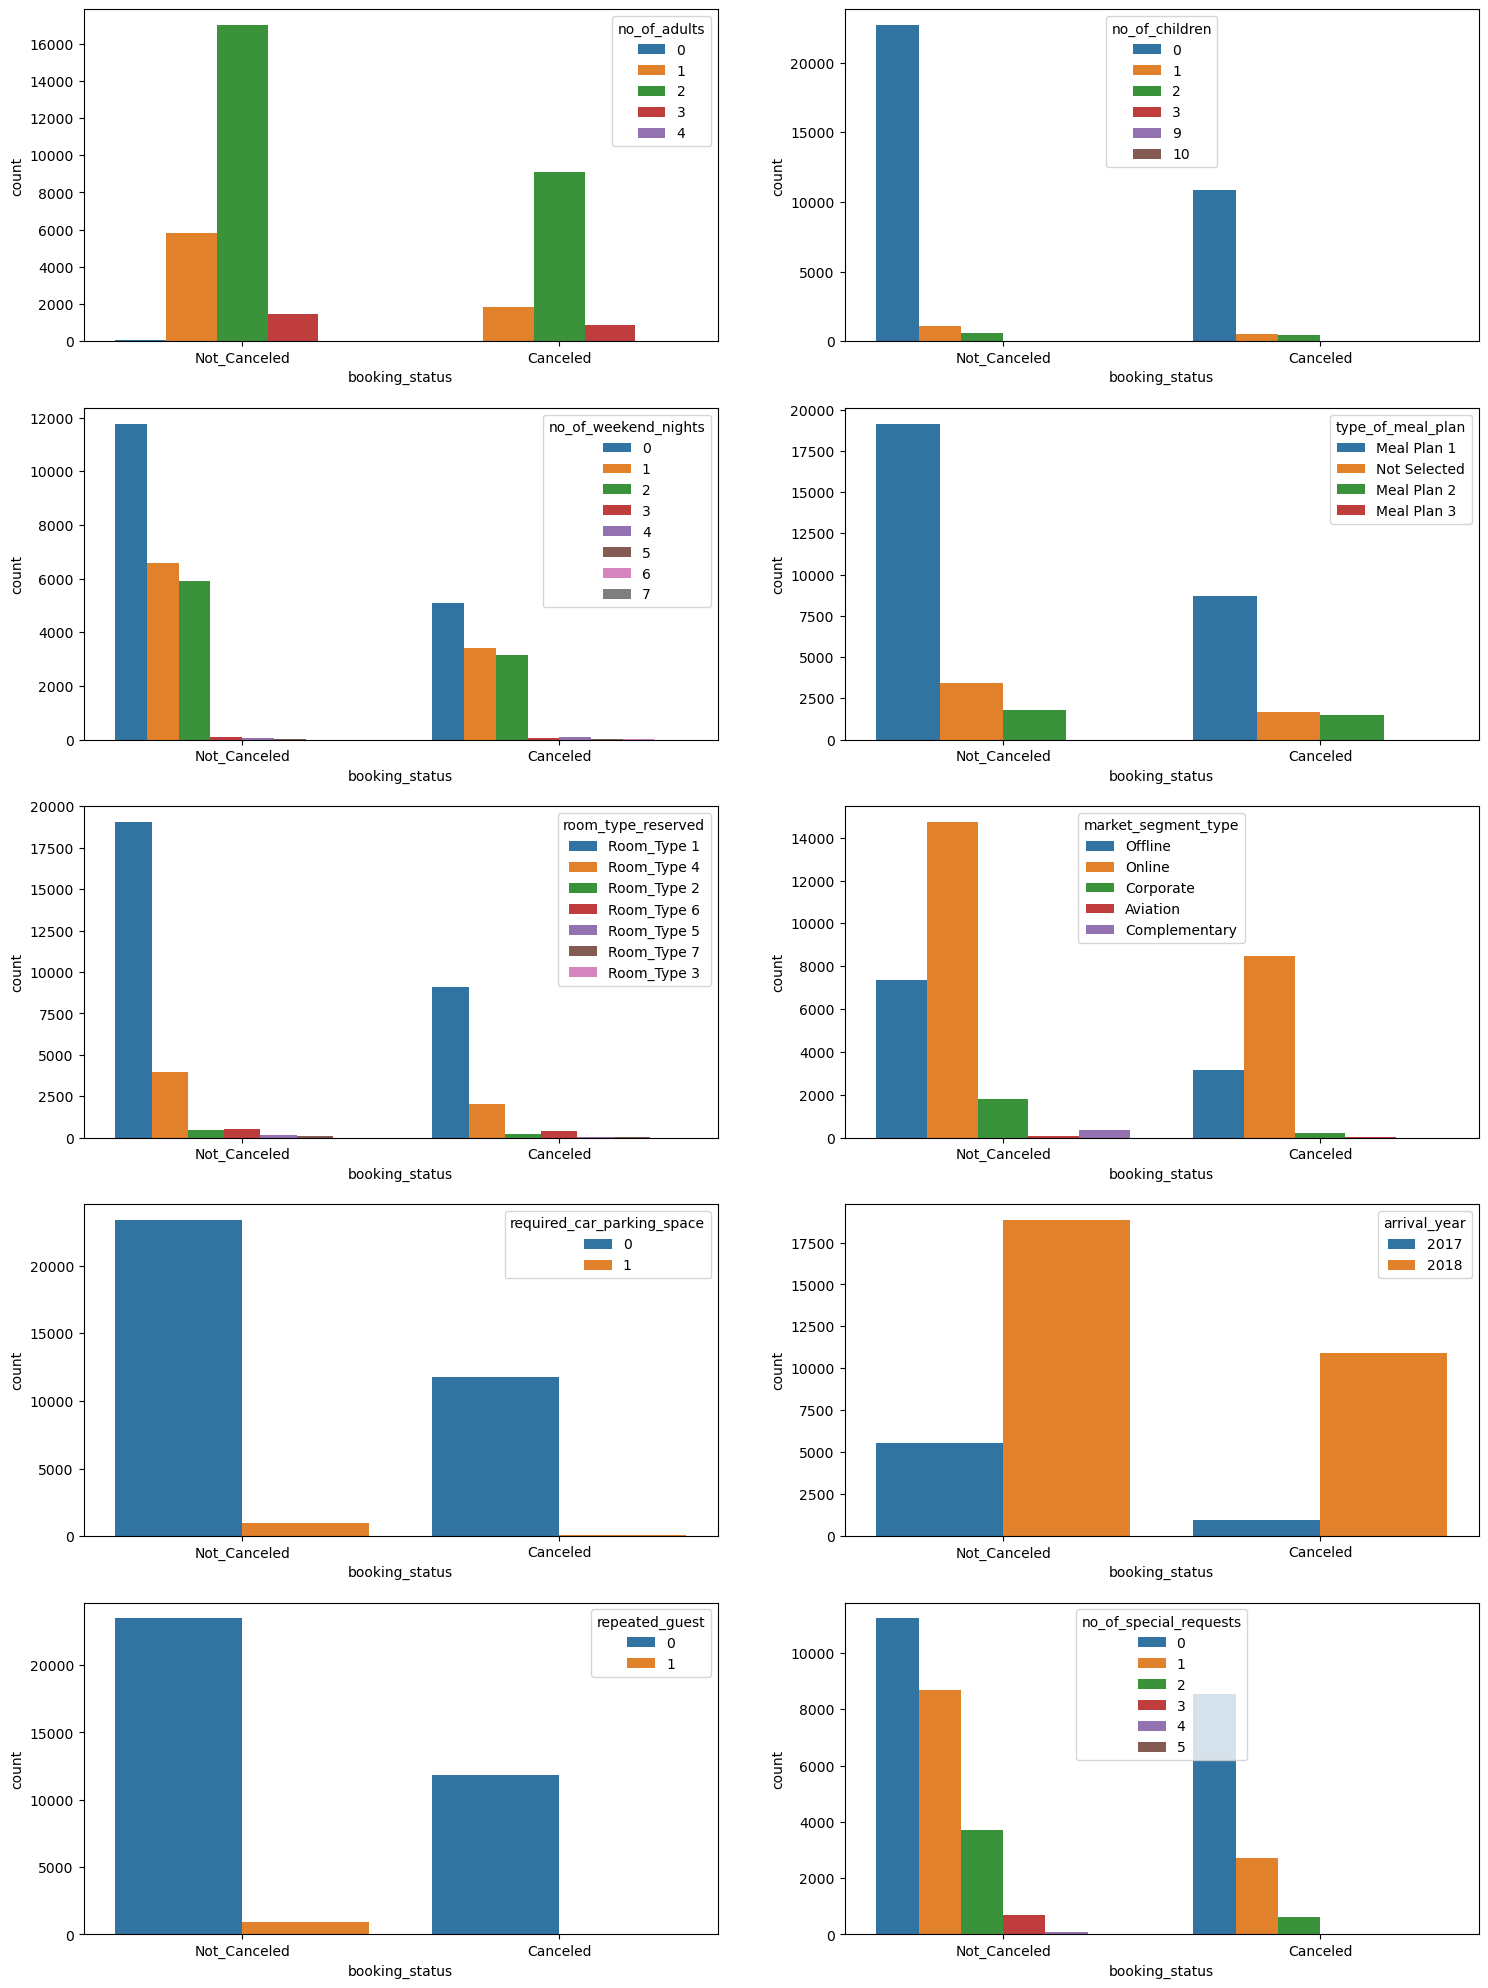

In [59]:
plt.figure(figsize = (18, 25))

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', data = df)

plt.subplot(5,2,9)
sns.countplot(x = 'booking_status', hue = 'repeated_guest', data = df)

plt.subplot(5,2,10)
sns.countplot(x = 'booking_status', hue = 'no_of_special_requests', data = df)

plt.show()

In [60]:
# 'no_of_week_nights', 'lead_time','arrival_year', 'arrival_month', 'arrival_date','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled','avg_price_per_room'

<AxesSubplot:xlabel='booking_status', ylabel='avg_price_per_room'>

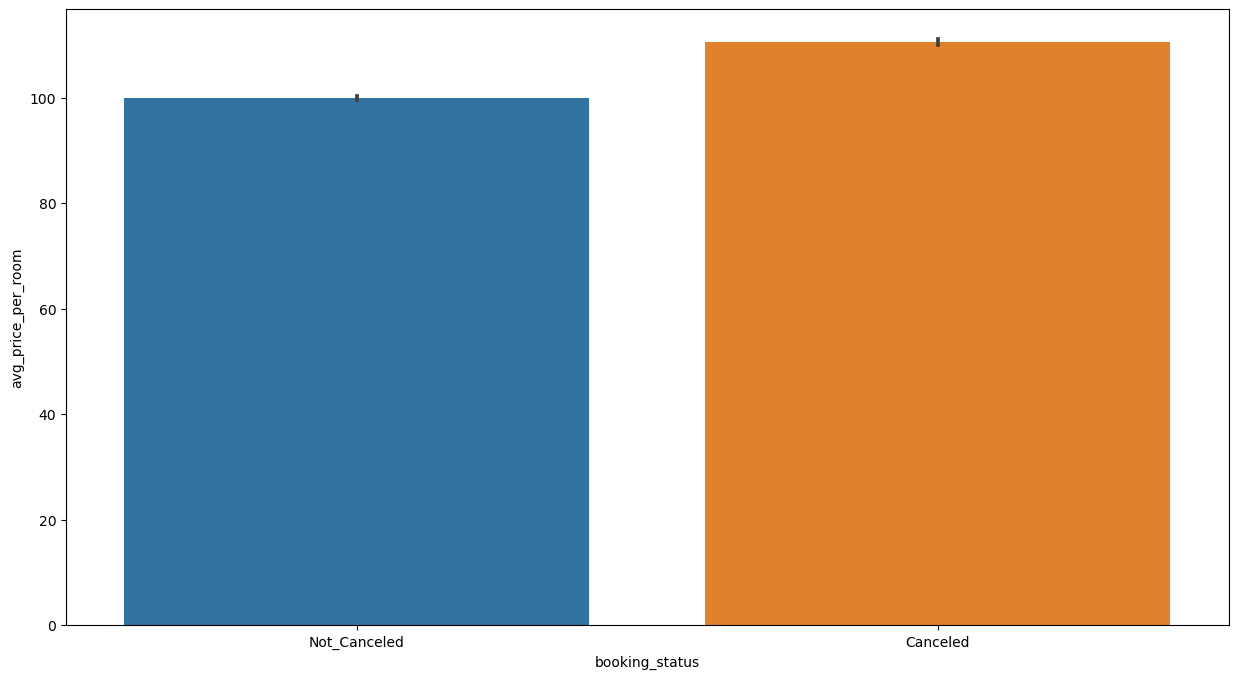

In [61]:
sns.barplot(x= "booking_status",y = "avg_price_per_room" ,data = df)

Higher priced rooms have high cancellations

### Analysis with respect to Lead Time

<AxesSubplot:xlabel='market_segment_type', ylabel='lead_time'>

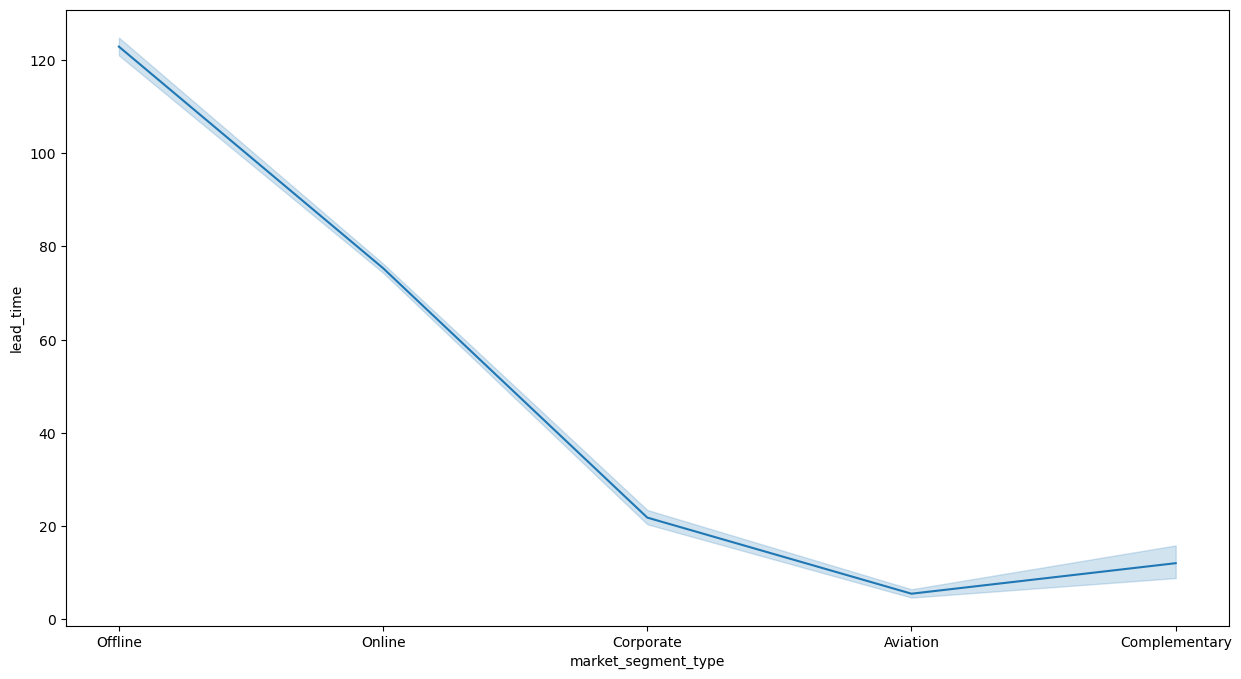

In [62]:
sns.lineplot(x = "market_segment_type", y= "lead_time", data = df)

The lead time is less for Aviation followed by Complimentary and Corporate segments

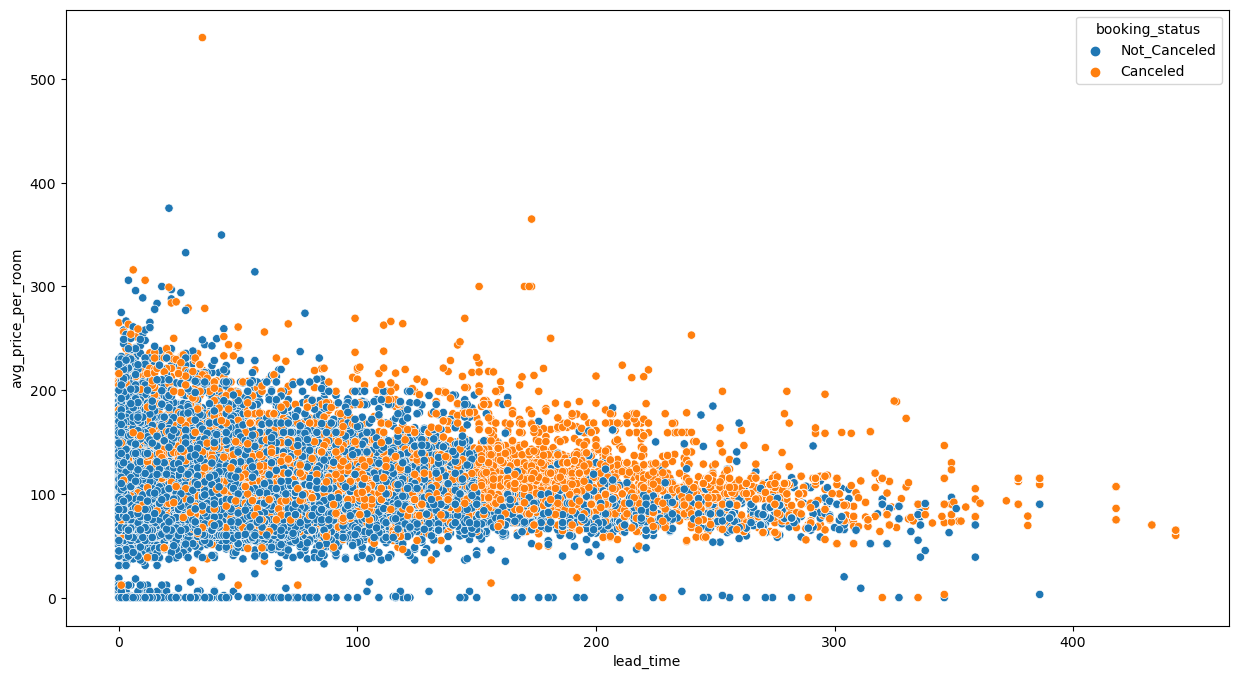

In [63]:
sns.scatterplot(data=df,x='lead_time',y='avg_price_per_room',hue='booking_status')
plt.show()

Higher the price, Higher is the lead time for room cancellation

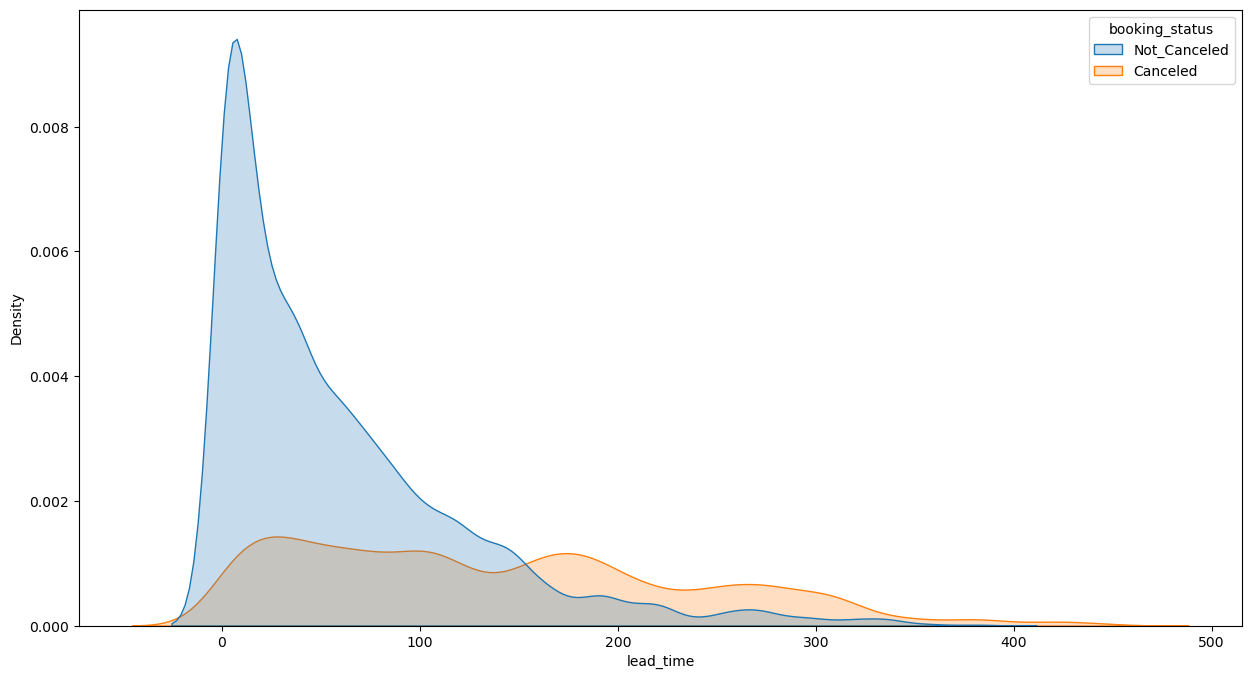

In [64]:
sns.kdeplot(x='lead_time', hue='booking_status', data=df,fill=True)
plt.show()

Cancellations count is less when the lead time is less and it is the opposite when the lead time is higher.

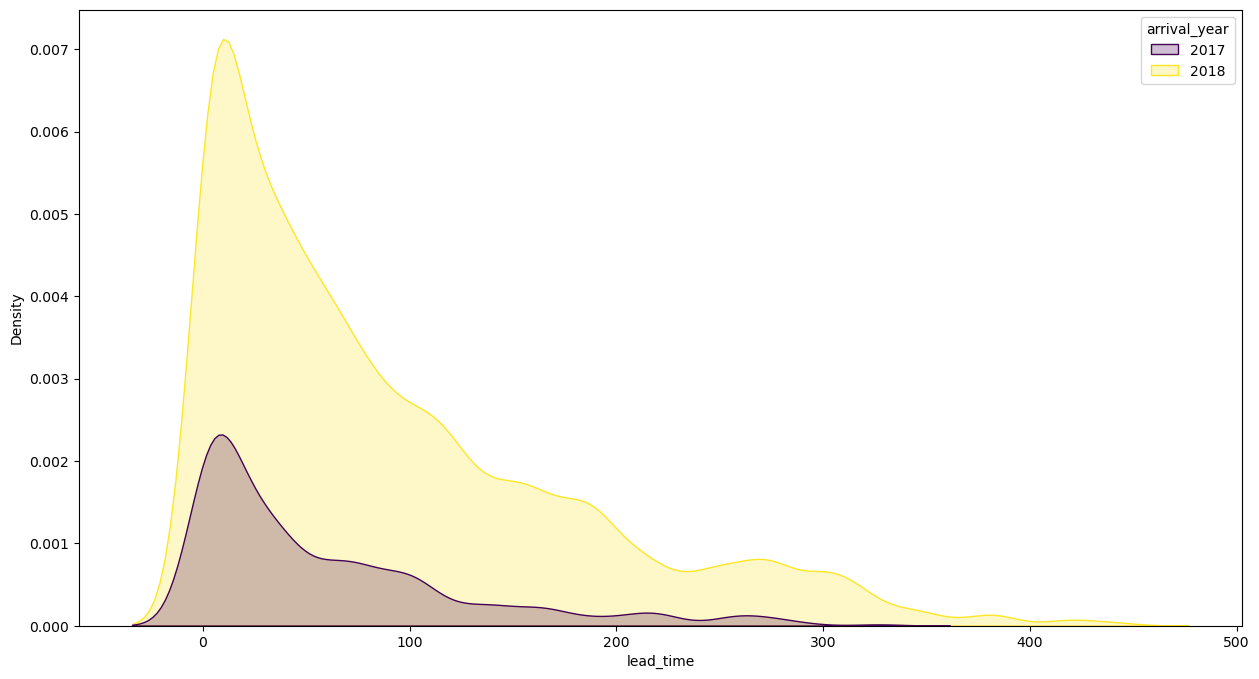

In [65]:
sns.kdeplot(x = 'lead_time', hue = 'arrival_year', data = df,fill=True,palette='viridis')
plt.show()

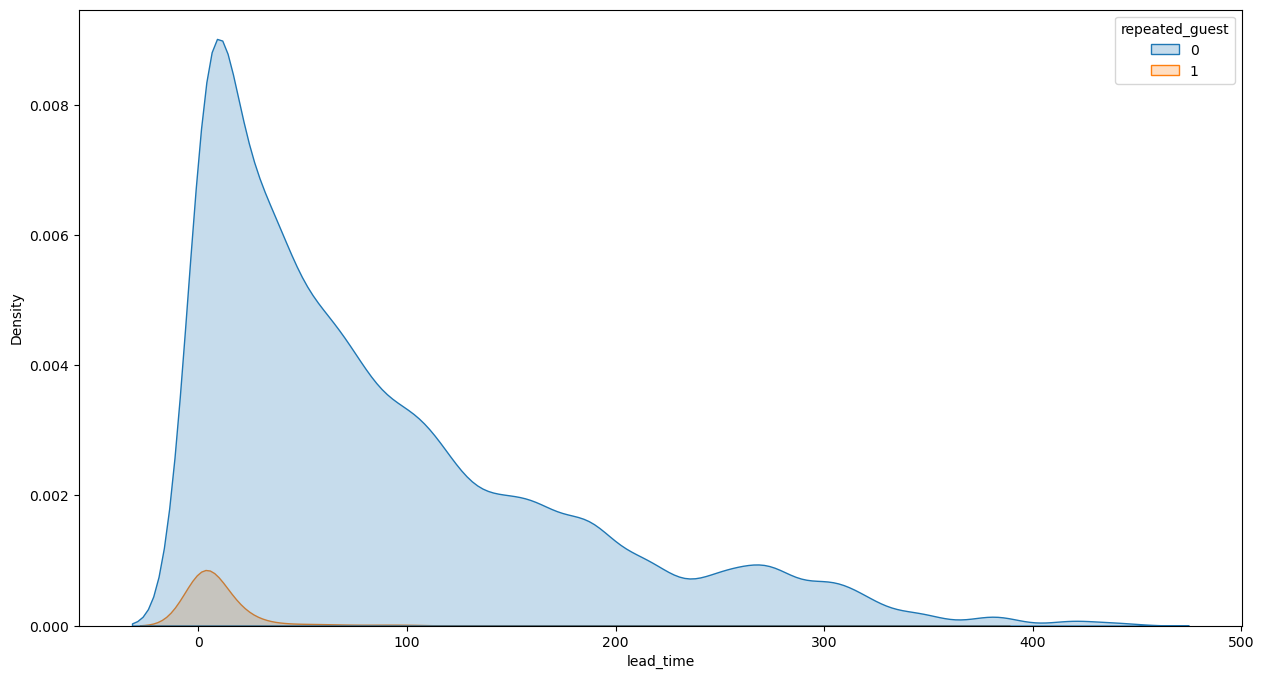

In [66]:
sns.kdeplot(x='lead_time', hue='repeated_guest', data=df,fill=True)
plt.show()

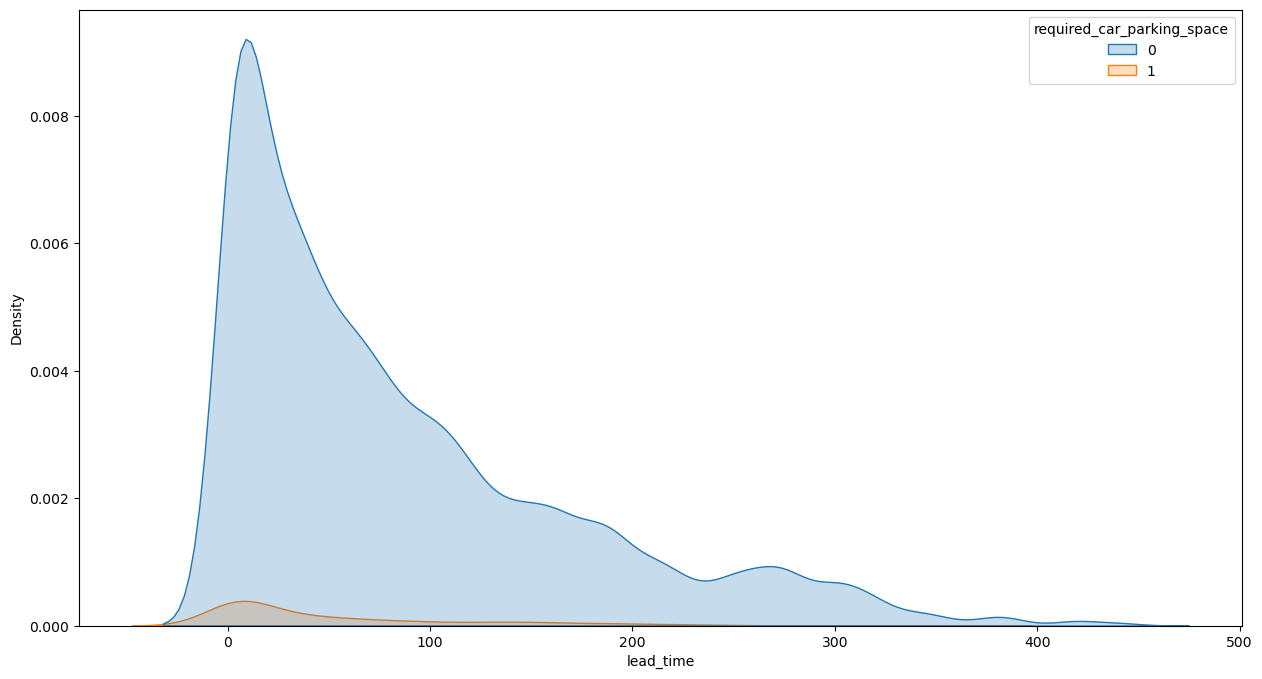

In [67]:
sns.kdeplot(x ='lead_time', hue = 'required_car_parking_space', data = df,fill=True)
plt.show()

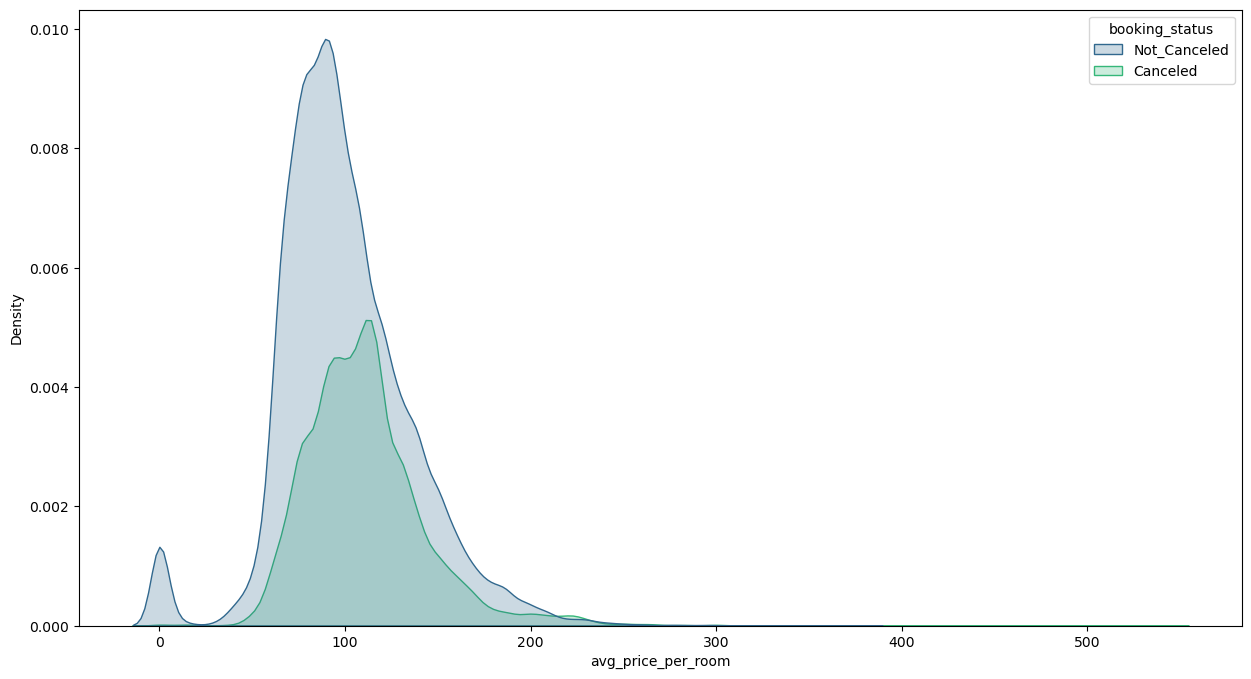

In [68]:
sns.kdeplot(x='avg_price_per_room', hue='booking_status', fill=True, data=df,palette = 'viridis')
plt.show()

###  Lead Time for number of week nights and number of weekend nights

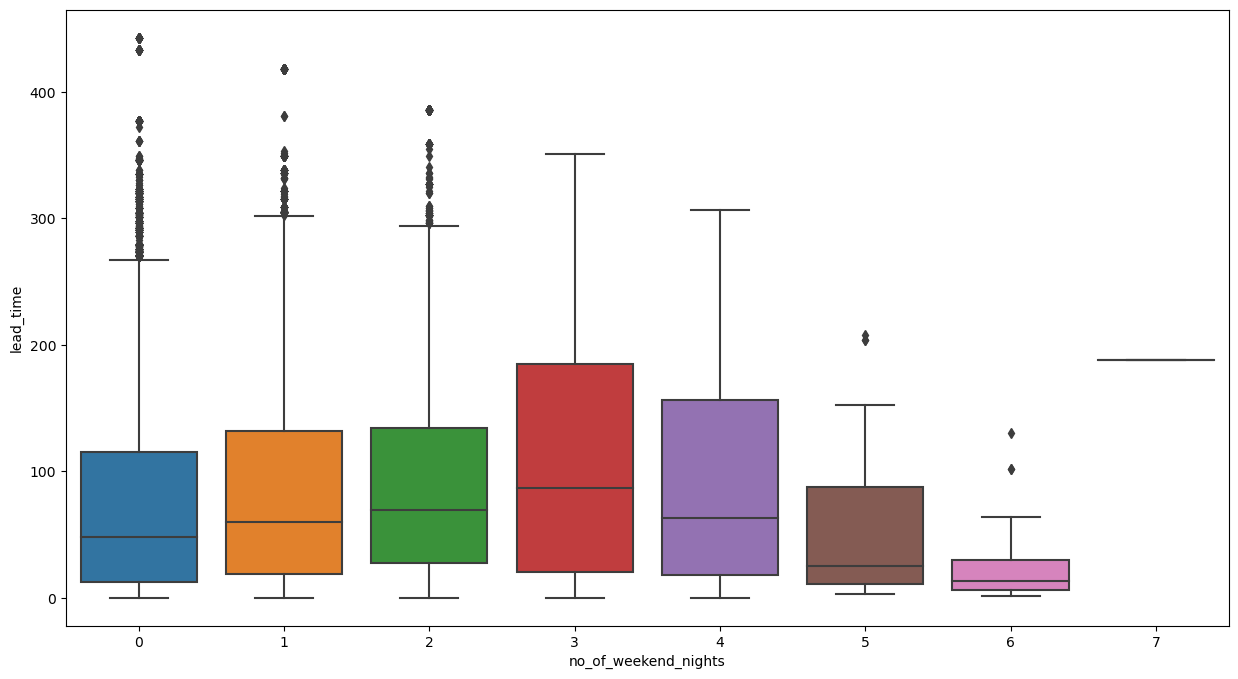

In [69]:
sns.boxplot(x='no_of_weekend_nights', y='lead_time', data=df)
plt.show()

Lead time higher for 1-3 weekend nights with presence of outliers 

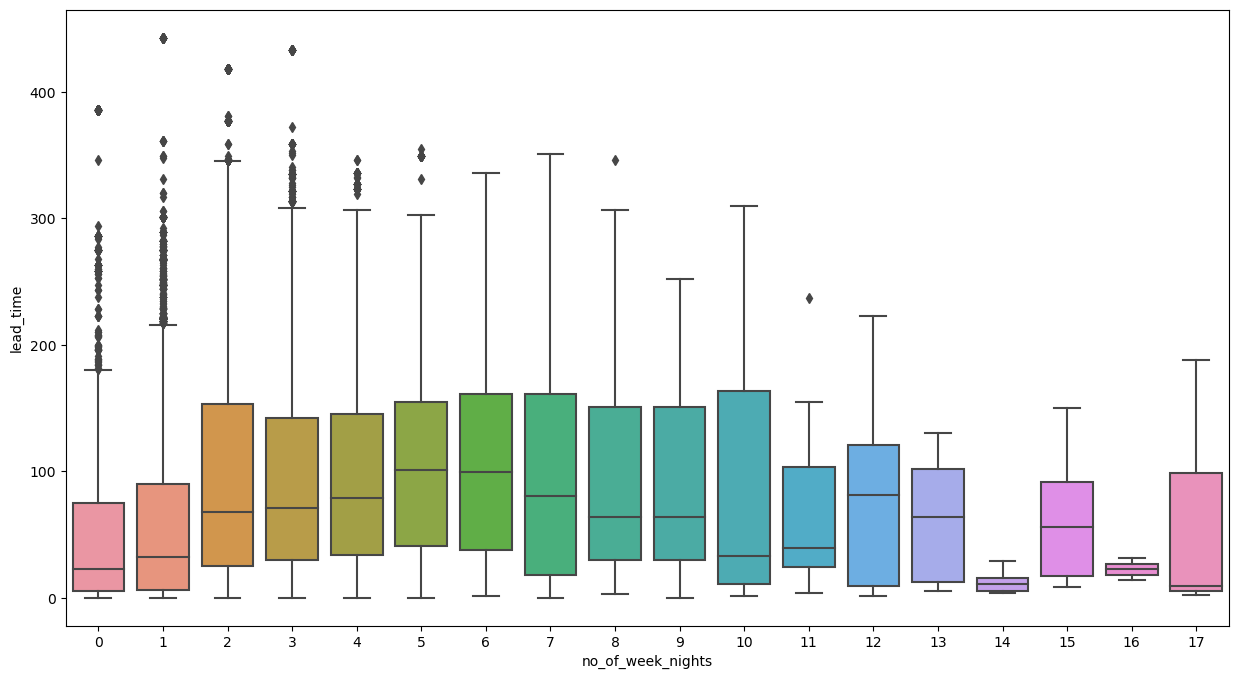

In [70]:
sns.boxplot(x='no_of_week_nights', y='lead_time', data=df)
plt.show()

Lead time higher for 1-5 week nights with presence of outliers

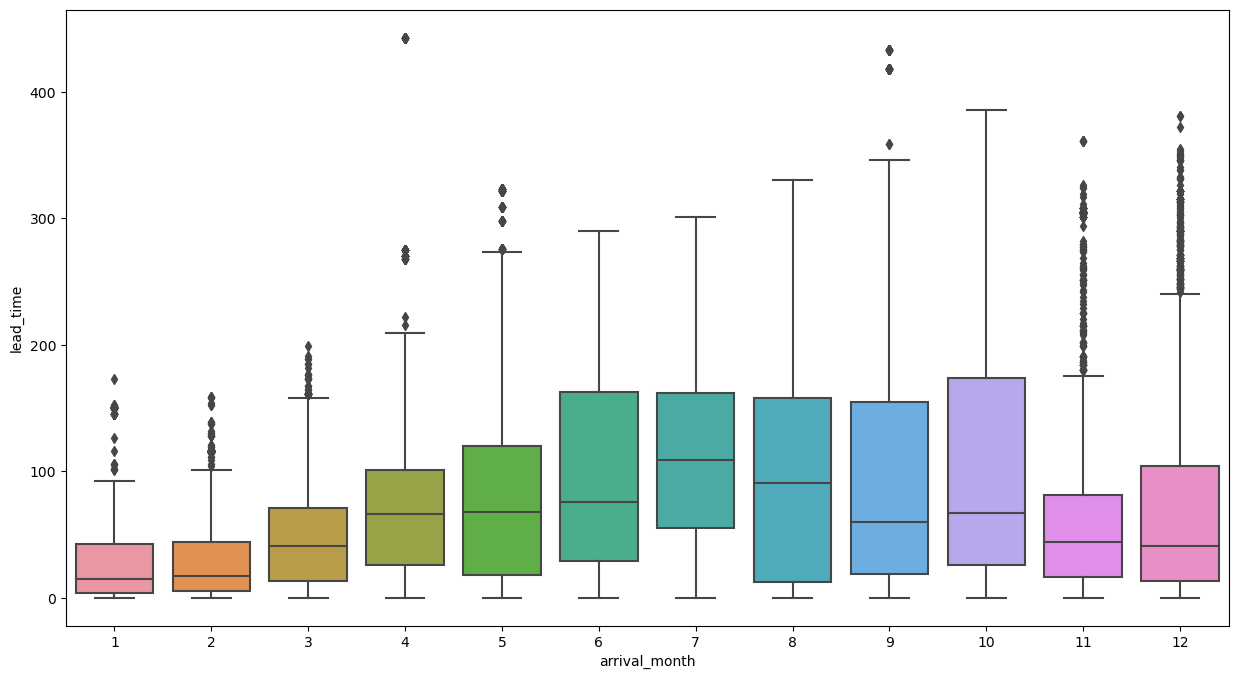

In [71]:
sns.boxplot(x='arrival_month', y='lead_time', data=df)
plt.show()

The lead time is less for the first 3 months of the year and for the last 2 months of the year

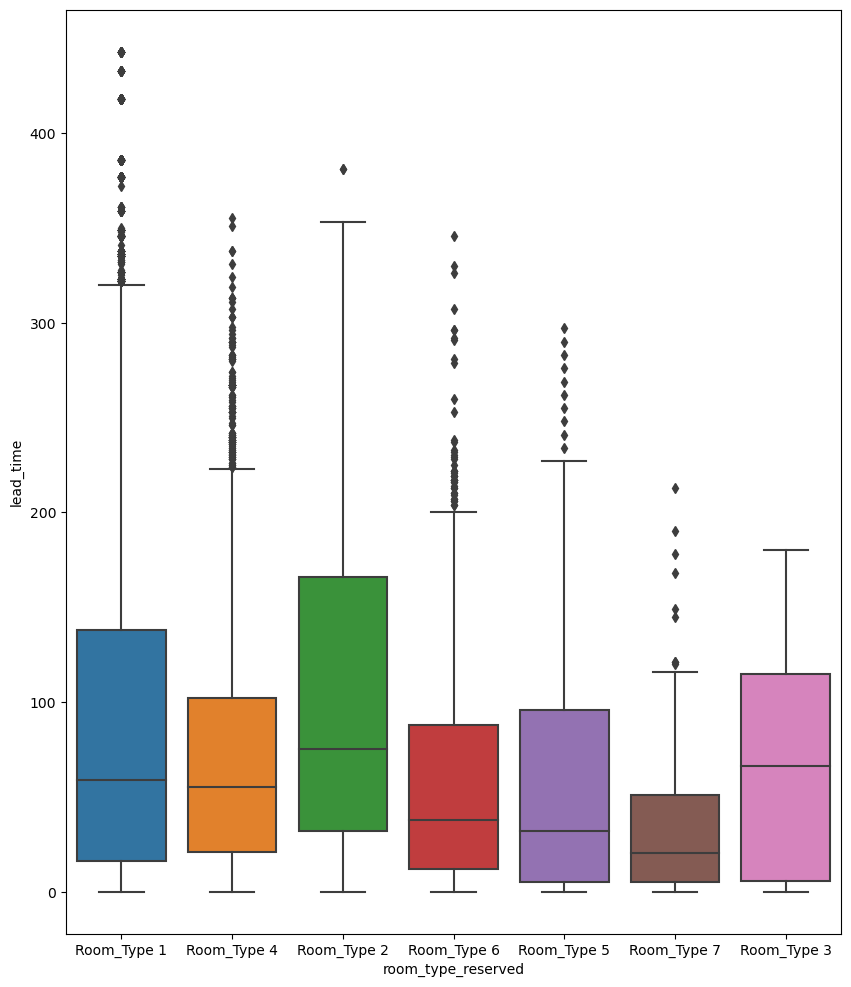

In [72]:
plt.figure(figsize=(10,12))
plt.tight_layout()
sns.boxplot(x='room_type_reserved', y='lead_time', data=df)
plt.show()

Room type 7 has the least lead time and Room type 2 has the highest lead time

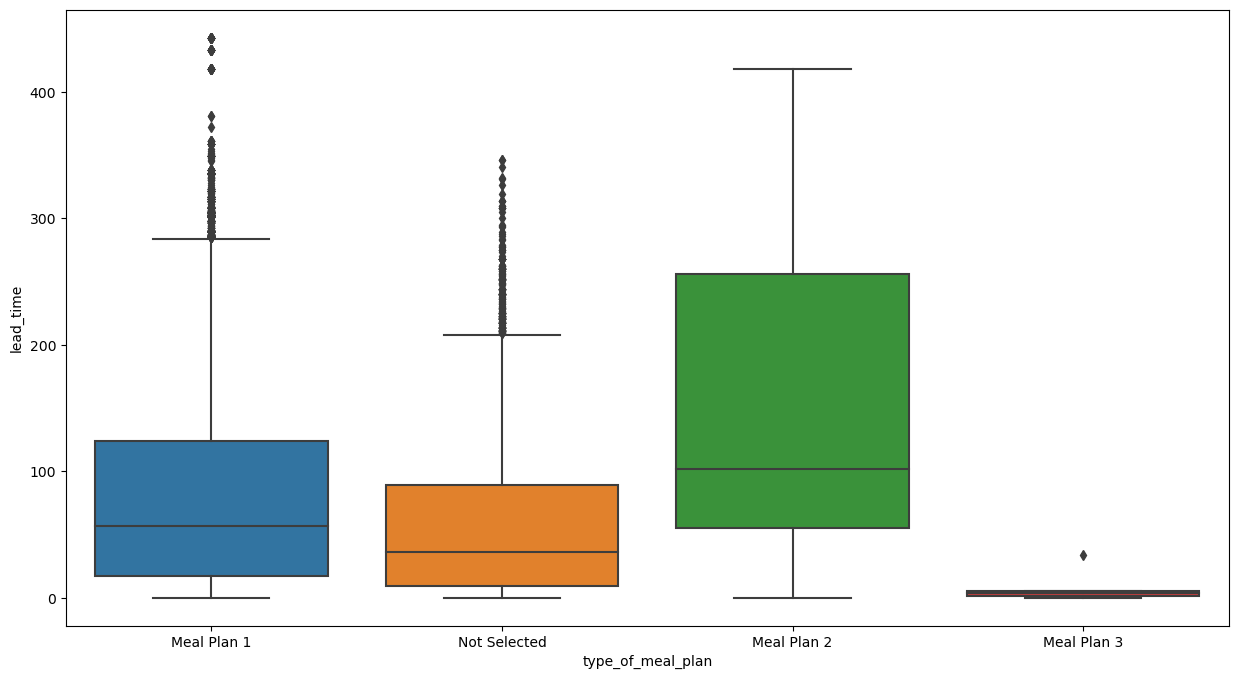

In [73]:
sns.boxplot(x='type_of_meal_plan', y='lead_time', data=df)
plt.show()

Meal plan 2 has the highest lead time and Meal plan 3 the least

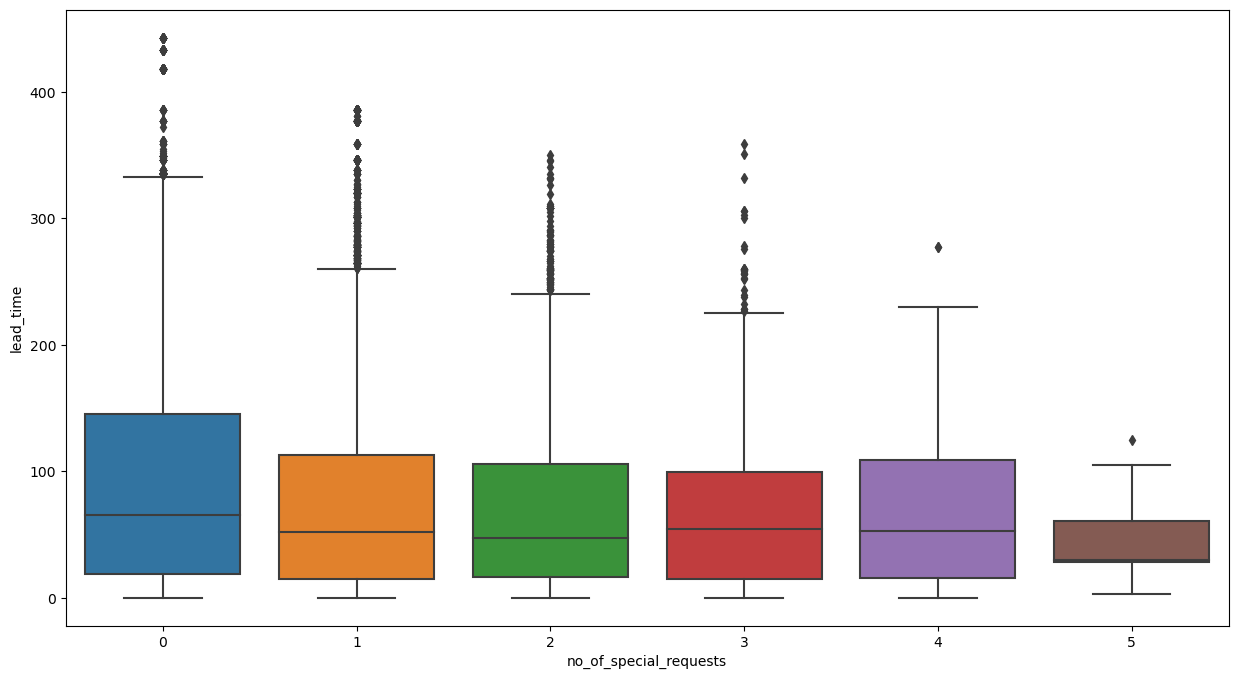

In [74]:
sns.boxplot(x='no_of_special_requests', y='lead_time', data=df)
plt.show()

In [75]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

  type_of_meal_plan  required_car_parking_space room_type_reserved  lead_time  \
0       Meal Plan 1                           0        Room_Type 1        224   
1      Not Selected                           0        Room_Type 1          5   
2       Meal Plan 1                           0        Room_Type 1          1   
3       Meal Plan 1                           0        Room_Type 1        211   
4      Not Selected                           0        Room_Type 1         48   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2018              4            11              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                                     0               65.00   
1                                     0              106.68   
2                                     0               60.00   
3                                     0              100.00   
4                                     0               94.50   

   no_of_special_requests booking_status  
0                       0   Not_Canceled  
1                       1   Not_Canceled  
2                       0       Canceled  
3                       0       Canceled  
4                       0       Canceled

In [76]:
# Encoding : 'type_of_meal_plan','room_type_reserved','market_segment_type','booking_status'

There are features with high skew values so we can apply Transformation technique and check whether the skewness has reduced or not.

### Encoding the categorical variables

####  'type_of_meal_plan'

Type of meal booked by the customer in a hotel

In [77]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [78]:
# Order of each category based on the mean
df.groupby('type_of_meal_plan')['avg_price_per_room'].mean().sort_values(ascending=False)

type_of_meal_plan
Meal Plan 2     115.306106
Meal Plan 1     103.593139
Not Selected     94.908610
Meal Plan 3      41.200000
Name: avg_price_per_room, dtype: float64

In [79]:
oe = OrdinalEncoder(categories = [['Meal Plan 2','Meal Plan 1','Not Selected', 'Meal Plan 3']])

df['type_of_meal_plan'] = oe.fit_transform(df[['type_of_meal_plan']])

df['type_of_meal_plan'].unique()

array([1., 2., 0., 3.])

#### 'room_type_reserved'

In [80]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [81]:
# Order of each category based on mean since different room types have different price of reservation.
df.groupby('room_type_reserved')['avg_price_per_room'].mean().sort_values(ascending=False)

room_type_reserved
Room_Type 6    182.212836
Room_Type 7    155.198291
Room_Type 4    125.287317
Room_Type 5    123.733623
Room_Type 1     95.918532
Room_Type 2     87.848555
Room_Type 3     73.678571
Name: avg_price_per_room, dtype: float64

In [82]:
oe = OrdinalEncoder(categories = [['Room_Type 6','Room_Type 7','Room_Type 4', 'Room_Type 5',
                                  'Room_Type 1','Room_Type 2','Room_Type 3']])

df['room_type_reserved'] = oe.fit_transform(df[['room_type_reserved']])

df['room_type_reserved'].unique()

array([4., 2., 5., 0., 3., 1., 6.])

#### 'market_segment_type'

In [83]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [84]:
# Order of each market category based on mean due to different prices.
df.groupby('market_segment_type')['avg_price_per_room'].mean().sort_values(ascending=False)

market_segment_type
Online           112.256855
Aviation         100.704000
Offline           91.632679
Corporate         82.911740
Complementary      3.141765
Name: avg_price_per_room, dtype: float64

In [85]:
oe = OrdinalEncoder(categories = [['Online','Aviation','Offline','Corporate','Complementary']])

df['market_segment_type'] = oe.fit_transform(df[['market_segment_type']])

df['market_segment_type'].unique()

array([2., 0., 3., 1., 4.])

#### 'booking_status'

In [86]:
df['booking_status'].unique()

array(['Not_Canceled', 'Canceled'], dtype=object)

In [87]:
book_status = {'Not_Canceled':0,'Canceled':1}

In [88]:
df['booking_status'] = df['booking_status'].map(book_status)
df['booking_status'].unique()

array([0, 1], dtype=int64)

### Check for skewness and Treat the outliers

In [89]:
df.skew()

no_of_adults                            -0.333295
no_of_children                           4.710350
no_of_weekend_nights                     0.737616
no_of_week_nights                        1.599350
type_of_meal_plan                        0.147278
required_car_parking_space               5.413643
room_type_reserved                      -1.876218
lead_time                                1.292492
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
market_segment_type                      0.860778
repeated_guest                           6.002888
no_of_previous_cancellations            25.199876
no_of_previous_bookings_not_canceled    19.250191
avg_price_per_room                       0.667133
no_of_special_requests                   1.145081
booking_status                           0.734507
dtype: float64

### Transformation

In [90]:
pt = PowerTransformer()

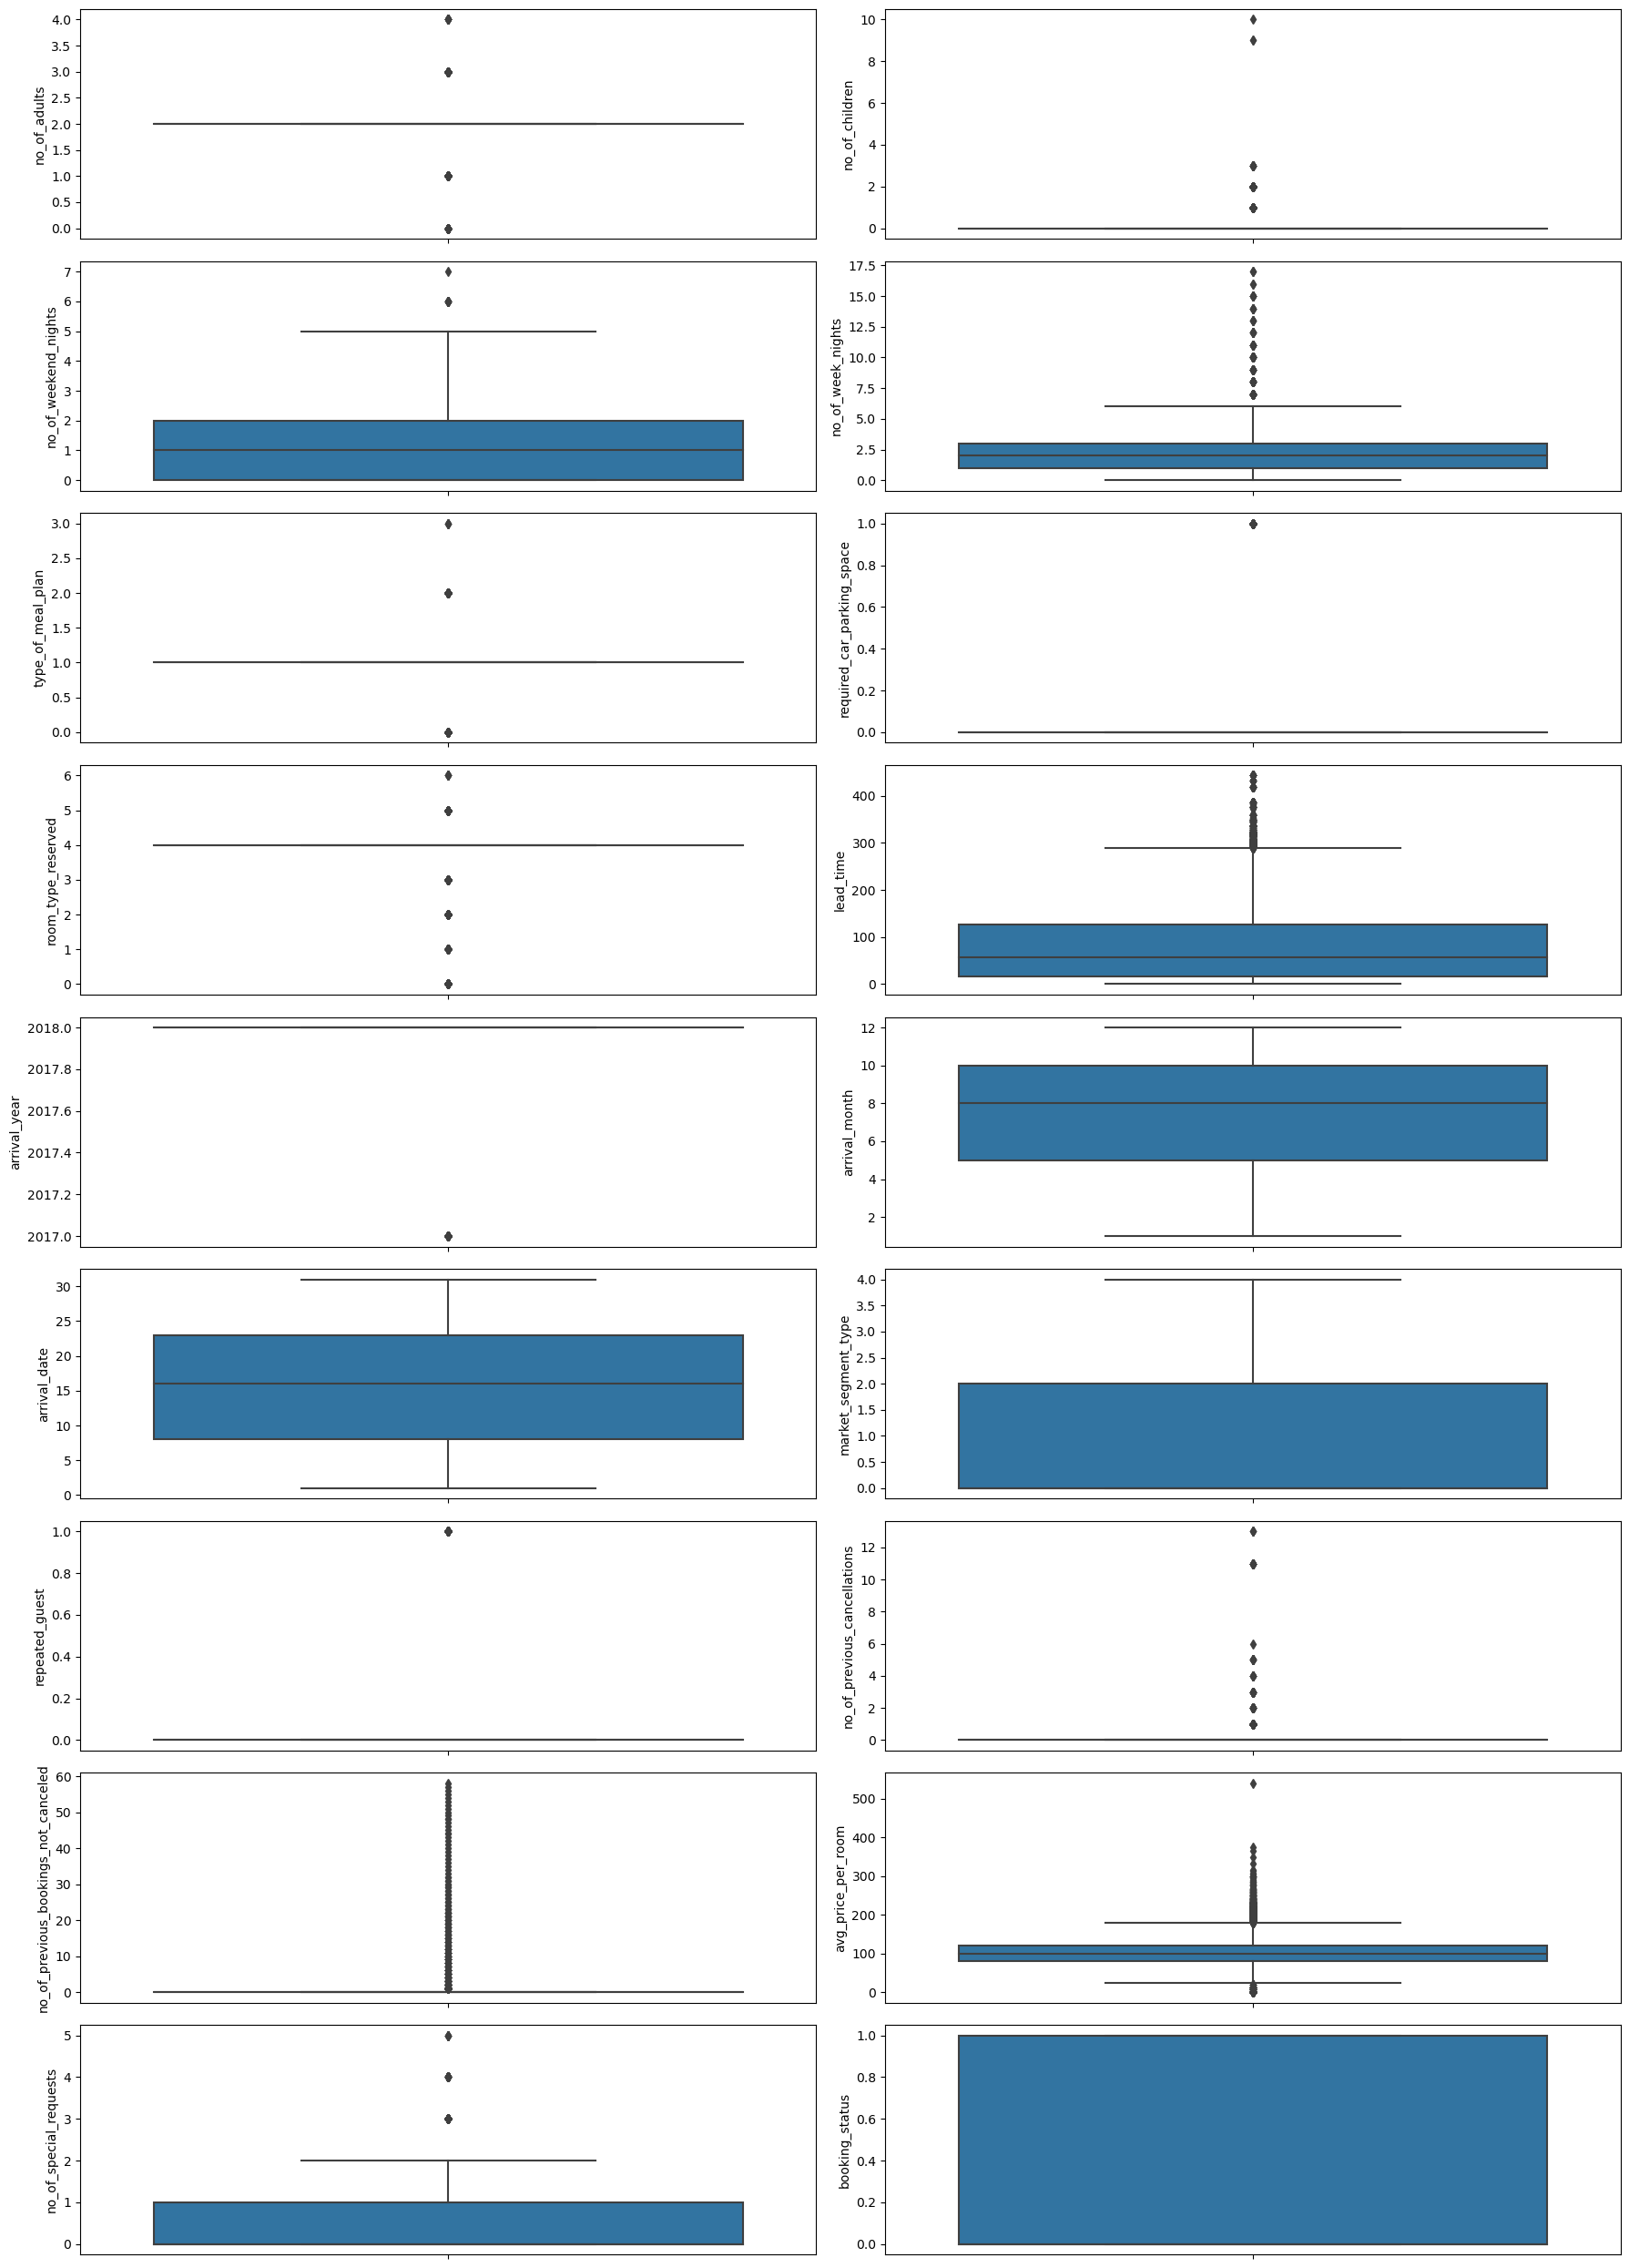

In [91]:
# Check outlier
fig,ax = plt.subplots(9,2,figsize=(18,25))
for i,subplot in zip(df.columns,ax.flatten()):
    sns.boxplot(y=df[i],ax=subplot)

plt.tight_layout()
plt.show()

There is presence of outliers in the following features:

1. no_of_adults
2. no_of_children
3. no_of_weekend_nights
4. no_of_week_nights
5. lead_time
6. no_of_previous_cancellations
7. no_of_previous_bookings_not_canceled
8. avg_price_per_room
9. no_of_special_requests

In [92]:
df['no_of_adults'] = pt.fit_transform(df[['no_of_adults']])

In [93]:
df['no_of_children'] = pt.fit_transform(df[['no_of_children']]) 

In [94]:
df['no_of_weekend_nights'] = pt.fit_transform(df[['no_of_weekend_nights']])

In [95]:
df['no_of_week_nights'] = pt.fit_transform(df[['no_of_week_nights']])

In [96]:
df['lead_time'] = pt.fit_transform(df[['lead_time']])

In [97]:
df['no_of_previous_cancellations'] = pt.fit_transform(df[['no_of_previous_cancellations']])

In [98]:
df['no_of_previous_bookings_not_canceled'] = pt.fit_transform(df[['no_of_previous_bookings_not_canceled']])

In [99]:
df['avg_price_per_room'] = pt.fit_transform(df[['avg_price_per_room']])

In [100]:
df['no_of_special_requests'] = pt.fit_transform(df[['no_of_special_requests']])

#### Rechecking skewness

In [101]:
df.skew()

no_of_adults                             0.060205
no_of_children                           3.244436
no_of_weekend_nights                     0.104621
no_of_week_nights                        0.020110
type_of_meal_plan                        0.147278
required_car_parking_space               5.413643
room_type_reserved                      -1.876218
lead_time                               -0.122779
arrival_year                            -1.669695
arrival_month                           -0.348229
arrival_date                             0.028809
market_segment_type                      0.860778
repeated_guest                           6.002888
no_of_previous_cancellations            10.214721
no_of_previous_bookings_not_canceled     6.457553
avg_price_per_room                       0.264816
no_of_special_requests                   0.298272
booking_status                           0.734507
dtype: float64

I went with transformation over IQR method as I want to keep my rows as it as and dont want to remove it. Transformation doesnt remove the outliers but only alters the distribution of the data.

In [102]:
df.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0      0.260722       -0.283465              0.527490           0.002966   
1      0.260722       -0.283465              1.259047           0.688539   
2     -1.575140       -0.283465              1.259047          -0.875353   
3      0.260722       -0.283465             -1.028072           0.002966   
4      0.260722       -0.283465              0.527490          -0.875353   

   type_of_meal_plan  required_car_parking_space  room_type_reserved  \
0                1.0                           0                 4.0   
1                2.0                           0                 4.0   
2                1.0                           0                 4.0   
3                1.0                           0                 4.0   
4                2.0                           0                 4.0   

   lead_time  arrival_year  arrival_month  arrival_date  market_segment_type  \
0   1.366032          2017             10             2                  2.0   
1  -1.310194          2018             11             6                  0.0   
2  -1.725164          2018              2            28                  0.0   
3   1.297807          2018              5            20                  0.0   
4  -0.079158          2018              4            11                  0.0   

   repeated_guest  no_of_previous_cancellations  \
0               0                     -0.096981   
1               0                     -0.096981   
2               0                     -0.096981   
3               0                     -0.096981   
4               0                     -0.096981   

   no_of_previous_bookings_not_canceled  avg_price_per_room  \
0                             -0.151318           -1.093777   
1                             -0.151318            0.118583   
2                             -0.151318           -1.245760   
3                             -0.151318           -0.070287   
4                             -0.151318           -0.227162   

   no_of_special_requests  booking_status  
0               -0.896700               0  
1                0.889697               0  
2               -0.896700               1  
3               -0.896700               1  
4               -0.896700               1

### Check for Imbalance in Target Variable

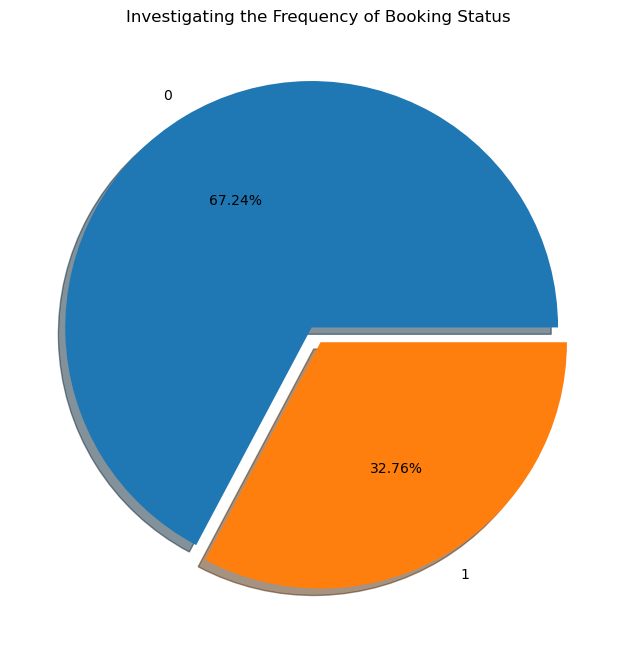

In [103]:
plt.pie(df['booking_status'].value_counts(), labels = df['booking_status'].value_counts().index,
        autopct = '%.2f%%', shadow = True, explode = [0.05,0.02])
plt.title('Investigating the Frequency of Booking Status')
plt.show()

In [104]:
df['booking_status'].value_counts()

0    24390
1    11885
Name: booking_status, dtype: int64

Data imbalance can have implications for machine learning models because they tend to perform better when the training data is balanced. In this case, the model might become biased towards predicting the majority class (not cancelled) since it has more examples to learn from. As a result, the model's ability to accurately predict the minority class (cancelled) may be compromised.


We use SMOTE Technique to address this data imbalance

In [105]:
#sm = SMOTE()

x = df.drop(columns = 'booking_status')
y = df['booking_status']

#x_resampled , y_resampled = sm.fit_resample(x,y)

In [106]:
# y_resampled.value_counts()

We have addressed the data imbalance

### Split the dataset randomly to 70:30 ratio into train and test dataset

In [107]:
xtrain , xtest , ytrain , ytest = train_test_split(x, y, test_size = 0.3, random_state = 10)

## Base Model - Logistic Regression 

In [108]:
model_lr = sma.Logit(ytrain,sma.add_constant(xtrain)).fit()

         Current function value: 0.436529
         Iterations: 35


C:\Users\plcha\anaconda3\envs\demo777\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [109]:
print(model_lr.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25374
Method:                           MLE   Df Model:                           17
Date:                Tue, 29 Aug 2023   Pseudo R-squ.:                  0.3090
Time:                        17:20:46   Log-Likelihood:                -11084.
converged:                      False   LL-Null:                       -16041.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                -1175.2949    118.305     -9.934      0.000   -1407.168    -943.422
no_of_adults                            -0.0251      

In [110]:
y_pred_prob_train = model_lr.predict(sma.add_constant(xtrain))
y_pred_prob_test = model_lr.predict(sma.add_constant(xtest))

### Youden's index to convert probability prediction to class prediction for both train and test

In [111]:
fpr , tpr , threshold = roc_curve(ytrain,y_pred_prob_train)

youden_index_train = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_train.append(res)

yi_train = max(np.round(youden_index_train,2))

In [112]:
fpr , tpr , threshold = roc_curve(ytest,y_pred_prob_test)

youden_index_test = []

for i,v in zip(fpr , tpr):
    res = v - i
    youden_index_test.append(res)

yi_test = max(np.round(youden_index_test,2))

In [113]:
print(f'Youdens index for train data is {yi_train}')
print(f'Youdens index for test data is {yi_test}')

Youdens index for train data is 0.57
Youdens index for test data is 0.57


In [114]:
y_pred_train = [ 1 if i > 0.59 else 0  for i in y_pred_prob_train]
y_pred_test = [ 1 if i > 0.59 else 0  for i in y_pred_prob_test]

### Confusion Matrix for train data and test data

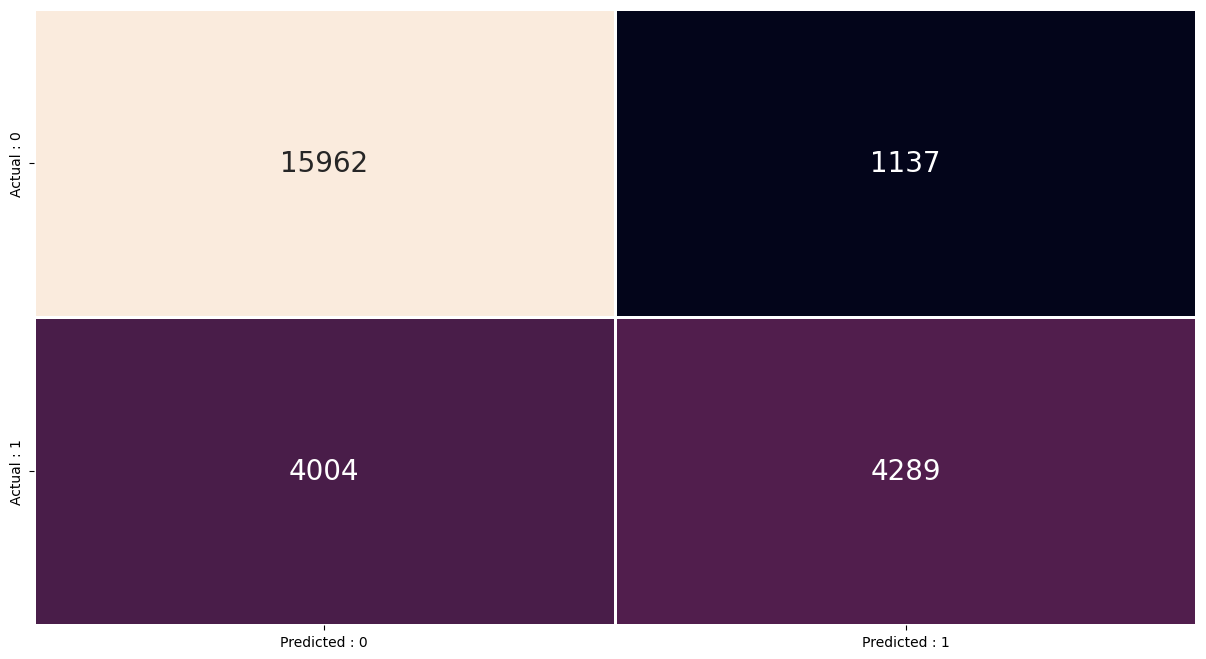

In [115]:
cm = confusion_matrix(ytrain,y_pred_train)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])

sns.heatmap(data = conf_matrix, annot = True, fmt = 'd', annot_kws = {'size' : 20},cbar=False,linewidths=1)
plt.show()

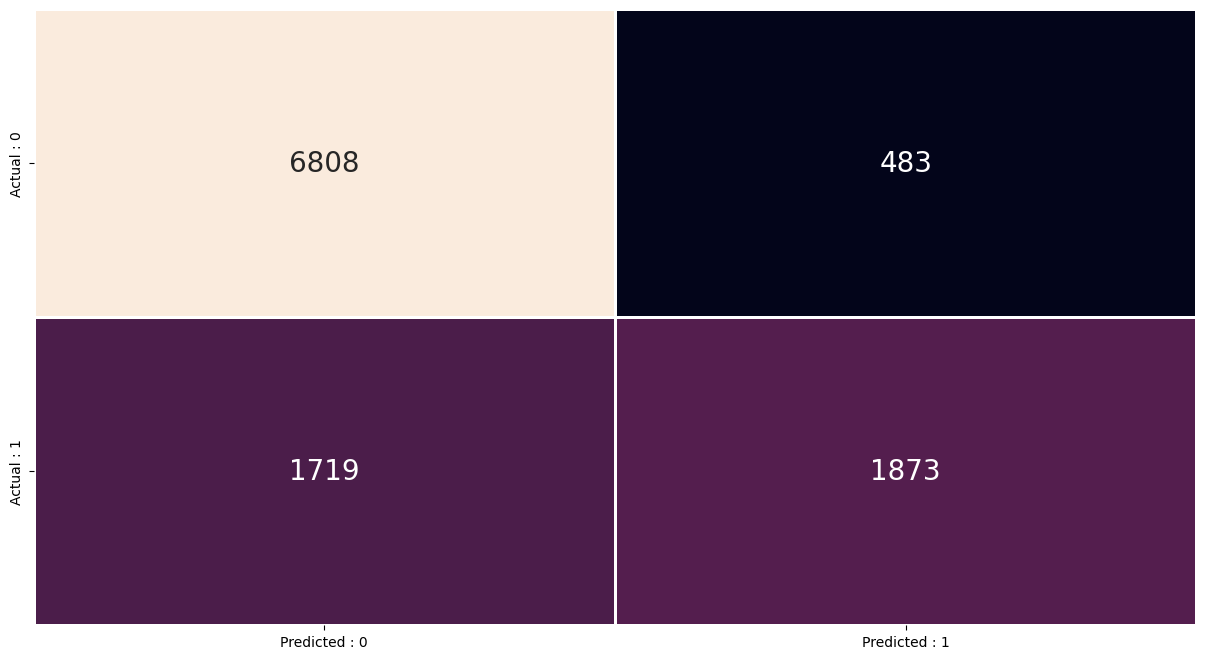

In [116]:
cm = confusion_matrix(ytest,y_pred_test)
conf_matrix = pd.DataFrame(data = cm , columns = ['Predicted : 0','Predicted : 1'], index = ['Actual : 0','Actual : 1'])

sns.heatmap(data = conf_matrix, annot = True, fmt = 'd', annot_kws = {'size' : 20},cbar=False,linewidths=1)
plt.show()

### Classification Report for train and test data

In [117]:
print(f'Train report : \n{classification_report(ytrain,y_pred_train)}\n')
print(f'Testreport : \n{classification_report(ytest,y_pred_test)}')

Train report : 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86     17099
           1       0.79      0.52      0.63      8293

    accuracy                           0.80     25392
   macro avg       0.79      0.73      0.74     25392
weighted avg       0.80      0.80      0.78     25392


Testreport : 
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      7291
           1       0.79      0.52      0.63      3592

    accuracy                           0.80     10883
   macro avg       0.80      0.73      0.75     10883
weighted avg       0.80      0.80      0.78     10883



### Variation Inflation Factor

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [119]:
var = df[['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'lead_time',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']]

In [120]:
vif = pd.DataFrame()
vif["Predictor"] = var.columns
vif["VIF"] = [variance_inflation_factor(var.values, i) for i in range(var.shape[1])]

In [121]:
vif = vif.sort_values(by="VIF", ascending=False)

In [122]:
vif

Predictor       VIF
6  no_of_previous_bookings_not_canceled  1.298973
7                    avg_price_per_room  1.258702
0                          no_of_adults  1.212540
5          no_of_previous_cancellations  1.207131
4                             lead_time  1.137136
1                        no_of_children  1.115342
8                no_of_special_requests  1.082633
3                     no_of_week_nights  1.073780
2                  no_of_weekend_nights  1.027494

### Function block to get all the required metrics in a single row

In [123]:
check_df=pd.DataFrame(columns=['Name','Accuracy_train','Accuracy_test','Precision_train','Precision_test','Recall_train',
                            'Recall_test','F1_score_train','F1_score_test'])


def my_model(model,name):
    global check_df
    
    pred_train=model.predict(xtrain)
    pred_test=model.predict(xtest)
    pred_prob=model.predict_proba(xtest)[:,1]
    
    
    acc_train = accuracy_score(ytrain,pred_train)
    acc_test  = accuracy_score(ytest,pred_test)
    pre_train = precision_score(ytrain,pred_train)
    pre_test  = precision_score(ytest,pred_test)
    recall_train = recall_score(ytrain,pred_train)
    recall_test = recall_score(ytest,pred_test)
    f1_train = f1_score(ytrain,pred_train)
    f1_test  = f1_score(ytest,pred_test)
    
    print('classification report for train ','\n',classification_report(ytrain,pred_train))
    print('classification report for test ','\n',classification_report(ytest,pred_test))
    
    
    cm_train= confusion_matrix(ytrain,pred_train)
    ConfusionMatrixDisplay(cm_train).plot()
    plt.title('Confusion Matrix for train in {}  :  '.format(name))
    plt.show()
    

    cm_test= confusion_matrix(ytest,pred_test)
    ConfusionMatrixDisplay(cm_test).plot()
    plt.title('Confusion Matrix for test in {} :  '.format(name))
    plt.show()
    
    
    fpr,tpr,threshold= roc_curve(ytest,pred_prob)
    plt.xlim=[0,1]
    plt.ylim=[0,1]
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],'r--')
    plt.title('ROC_Curve for test in {} '.format(name))
    s=round(roc_auc_score(ytest,pred_prob),3)
    plt.text(x=0.5,y=0.4,s=('ROC-AUC SCORE: {}'.format(s)))
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.grid(True)
    plt.show()
    
    
    new= pd.DataFrame([[name,acc_train,acc_test,pre_train,pre_test,recall_train,recall_test,f1_train,f1_test]],
                      columns=['Name','Accuracy_train','Accuracy_test','Precision_train','Precision_test','Recall_train',
                            'Recall_test','F1_score_train','F1_score_test'] )
    
    
    check_df = check_df.append(new,ignore_index=True)
    
    return new

### Logistic Regression

classification report for train  
               precision    recall  f1-score   support

           0       0.82      0.89      0.86     17099
           1       0.73      0.61      0.66      8293

    accuracy                           0.80     25392
   macro avg       0.78      0.75      0.76     25392
weighted avg       0.79      0.80      0.79     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      7291
           1       0.74      0.62      0.67      3592

    accuracy                           0.80     10883
   macro avg       0.78      0.75      0.76     10883
weighted avg       0.80      0.80      0.80     10883



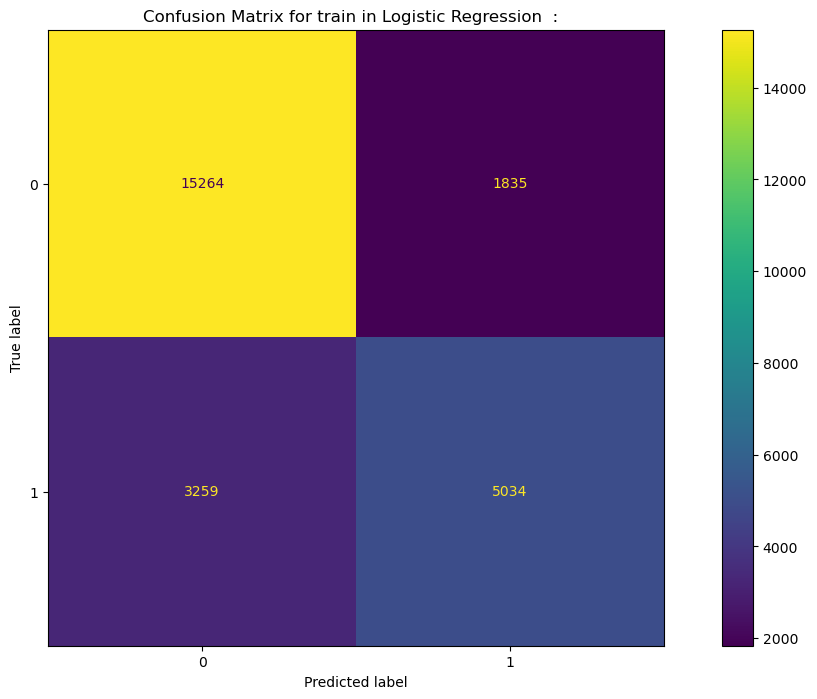

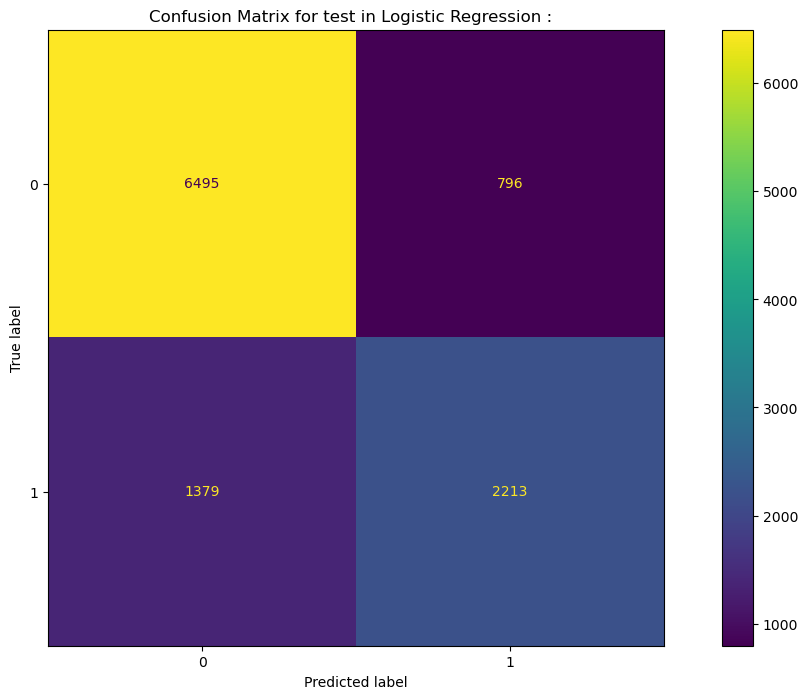

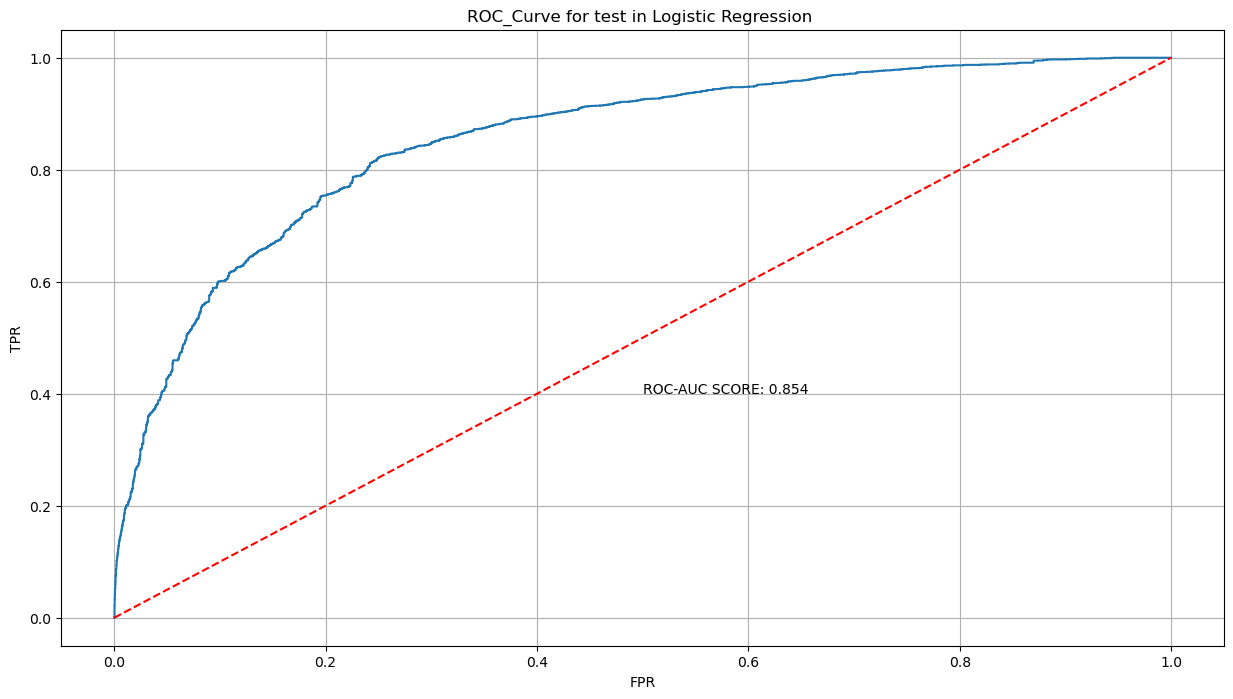

Name  Accuracy_train  Accuracy_test  Precision_train  \
0  Logistic Regression        0.799386       0.800147         0.732858   

   Precision_test  Recall_train  Recall_test  F1_score_train  F1_score_test  
0         0.73546      0.607018     0.616091        0.664028       0.670504

In [124]:
lr = LogisticRegression()
lr_model = lr.fit(xtrain,ytrain)

my_model(lr_model,'Logistic Regression')

### Decision Tree

classification report for train  
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     17099
           1       1.00      0.99      0.99      8293

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      7291
           1       0.80      0.81      0.80      3592

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883



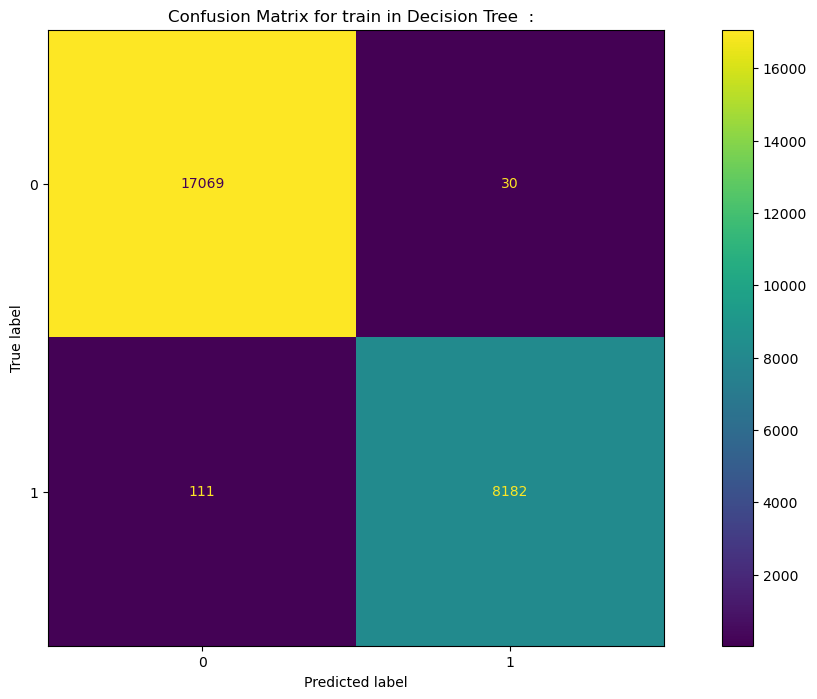

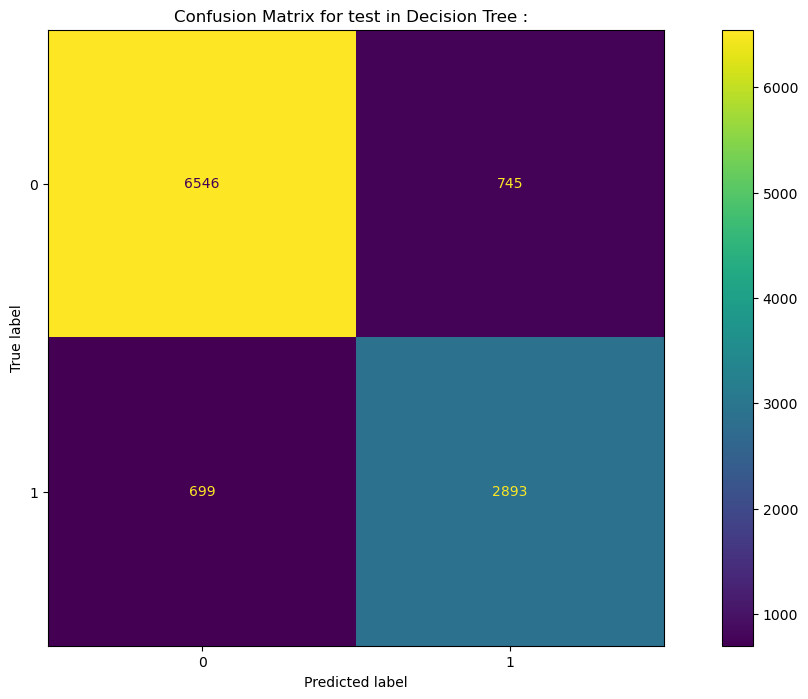

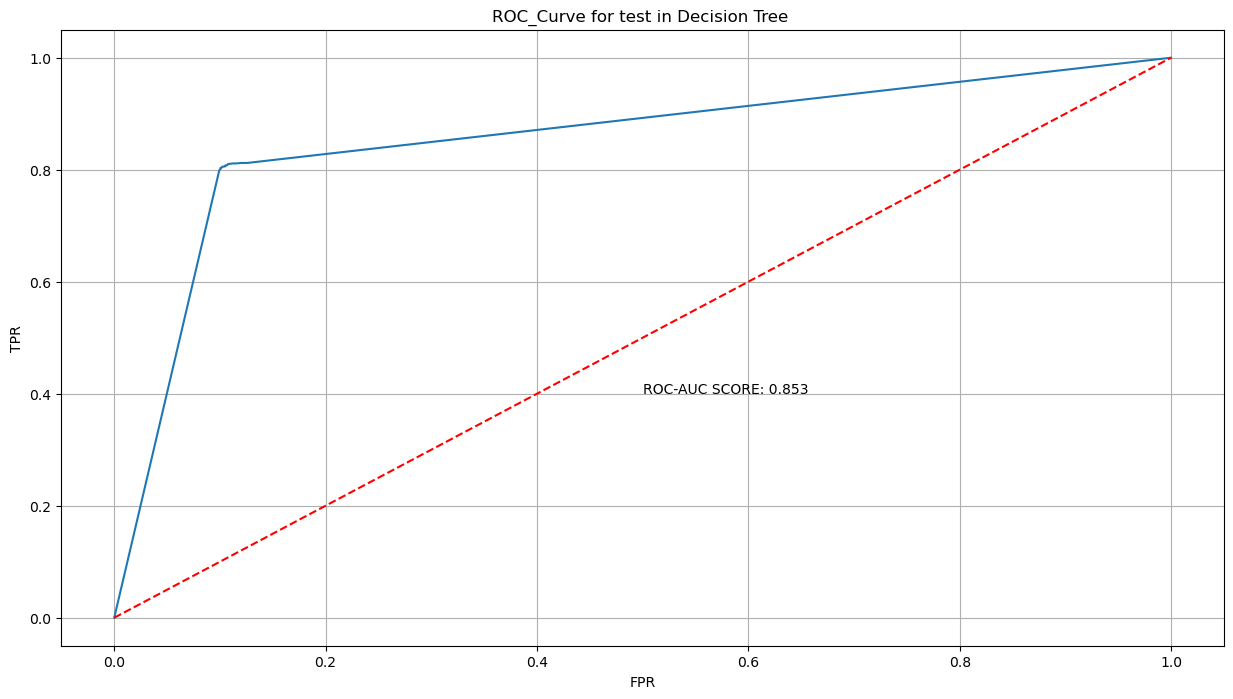

Name  Accuracy_train  Accuracy_test  Precision_train  \
0  Decision Tree        0.994447       0.867316         0.996347   

   Precision_test  Recall_train  Recall_test  F1_score_train  F1_score_test  
0        0.795217      0.986615     0.805401        0.991457       0.800277

In [125]:
dt = DecisionTreeClassifier()
dt_model = dt.fit(xtrain,ytrain)

my_model(dt_model,'Decision Tree')

### Decision Tree with Hyper Parameter Tuning using GridSearchCV

In [126]:
'''tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(1,10),
                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
tree_grid = GridSearchCV(estimator = decision_tree_classification, 
                         param_grid = tuned_paramaters, 
                         cv = 5)

# fit the model on X_train and y_train using fit()
tree_grid_model = tree_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')'''

'tuned_paramaters = [{\'criterion\': [\'entropy\', \'gini\'], \n                     \'max_depth\': range(2, 10),\n                     \'max_features\': ["sqrt", "log2"],\n                     \'min_samples_split\': range(2,10),\n                     \'min_samples_leaf\': range(1,10),\n                     \'max_leaf_nodes\': range(1, 10)}]\n \n# instantiate the \'DecisionTreeClassifier\' \n# pass the \'random_state\' to obtain the same samples for each time you run the code\ndecision_tree_classification = DecisionTreeClassifier(random_state = 10)\n\n# use GridSearchCV() to find the optimal value of the hyperparameters\n# estimator: pass the decision tree classifier model\n# param_grid: pass the list \'tuned_parameters\'\n# cv: number of folds in k-fold i.e. here cv = 5\ntree_grid = GridSearchCV(estimator = decision_tree_classification, \n                         param_grid = tuned_paramaters, \n                         cv = 5)\n\n# fit the model on X_train and y_train using fit()\ntr

classification report for train  
               precision    recall  f1-score   support

           0       0.83      0.86      0.85     17099
           1       0.69      0.63      0.66      8293

    accuracy                           0.79     25392
   macro avg       0.76      0.75      0.75     25392
weighted avg       0.78      0.79      0.79     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.83      0.86      0.84      7291
           1       0.69      0.63      0.66      3592

    accuracy                           0.78     10883
   macro avg       0.76      0.75      0.75     10883
weighted avg       0.78      0.78      0.78     10883



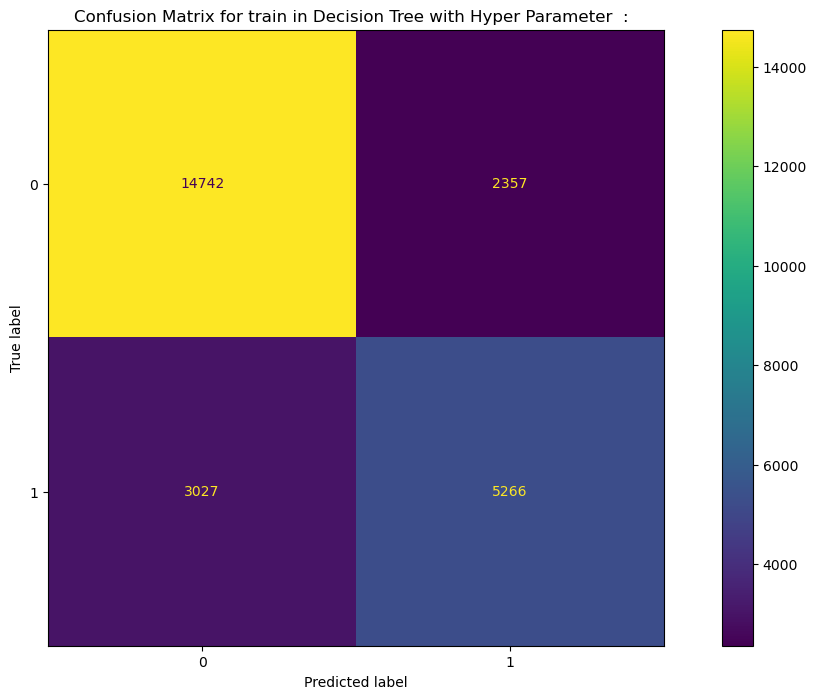

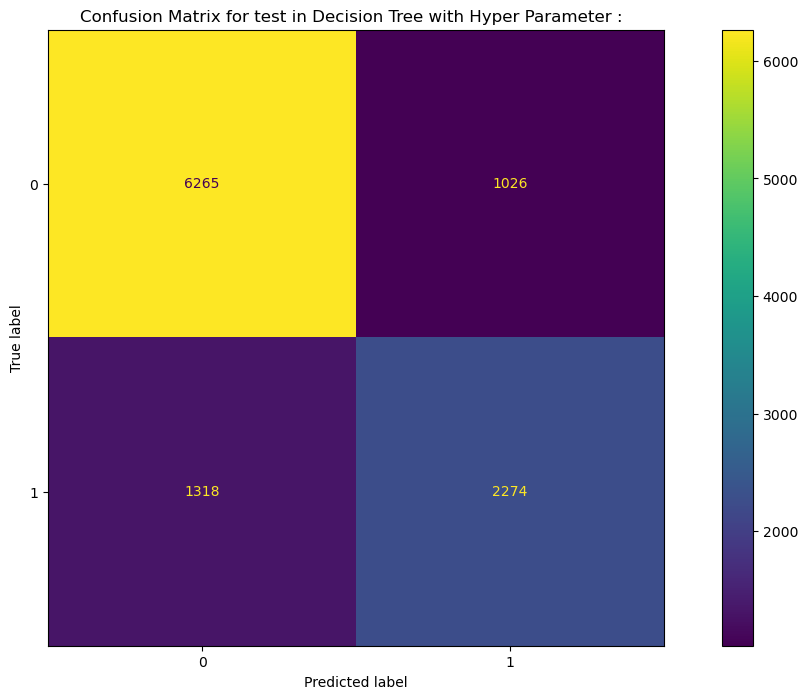

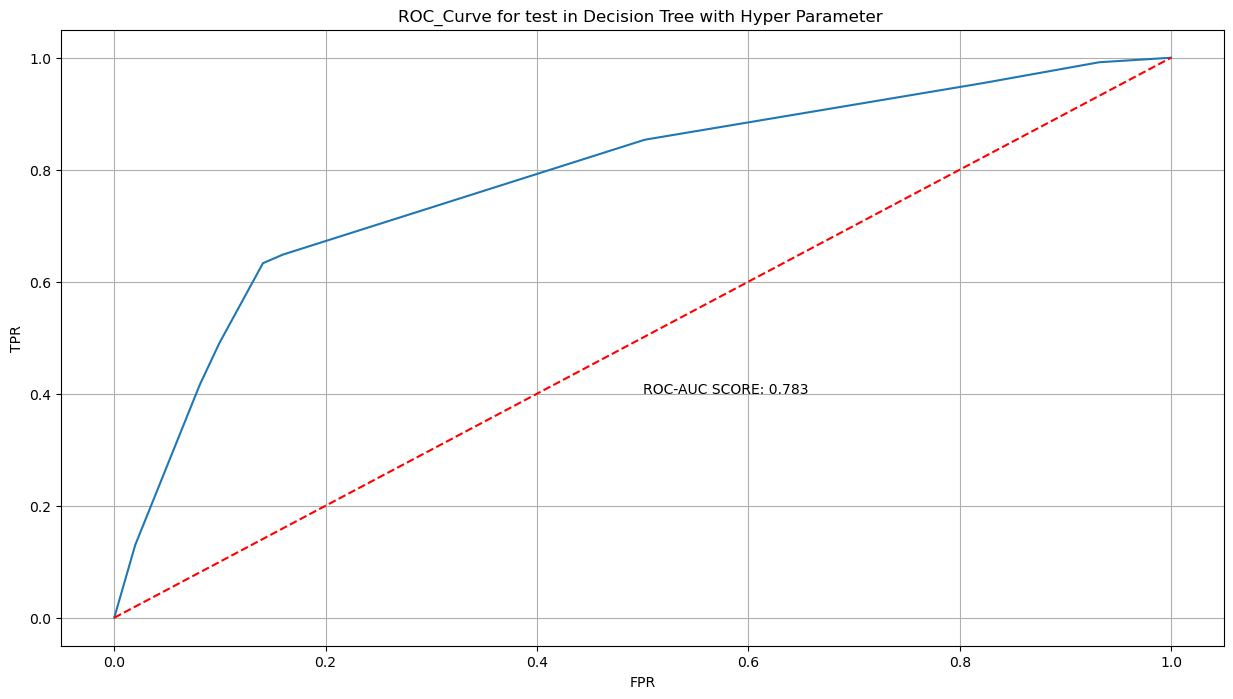

Name  Accuracy_train  Accuracy_test  \
0  Decision Tree with Hyper Parameter        0.787965       0.784618   

   Precision_train  Precision_test  Recall_train  Recall_test  F1_score_train  \
0         0.690804        0.689091      0.634993     0.633073        0.661724   

   F1_score_test  
0       0.659896

In [127]:
dt = DecisionTreeClassifier(criterion='gini', max_depth= 6, max_features='sqrt', max_leaf_nodes=9, min_samples_leaf=1, 
                            min_samples_split=2)
dt_model_update = dt.fit(xtrain,ytrain)

my_model(dt_model_update,'Decision Tree with Hyper Parameter')

### Random Forest

classification report for train  
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     17099
           1       1.00      0.99      0.99      8293

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      7291
           1       0.89      0.81      0.85      3592

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.89     10883
weighted avg       0.90      0.90      0.90     10883



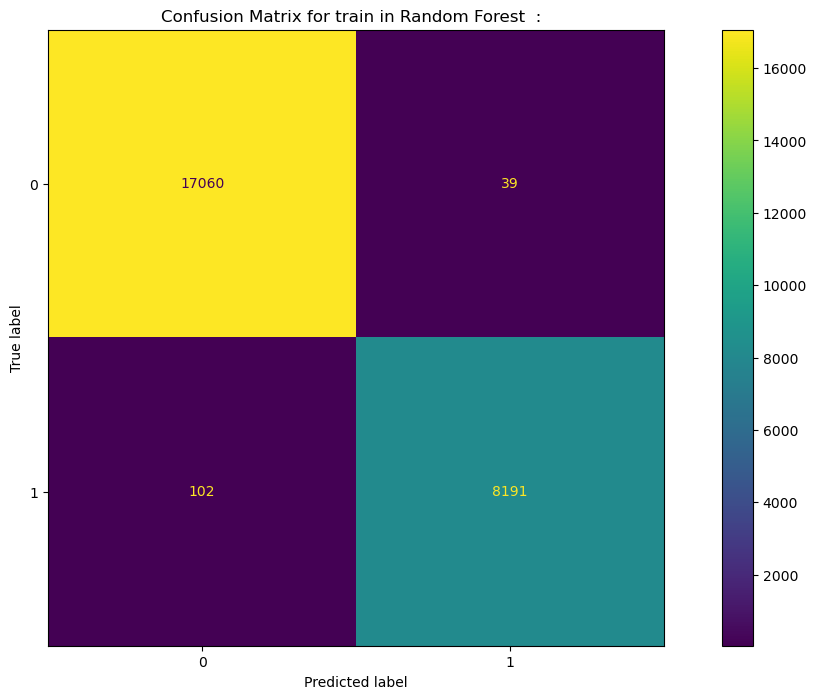

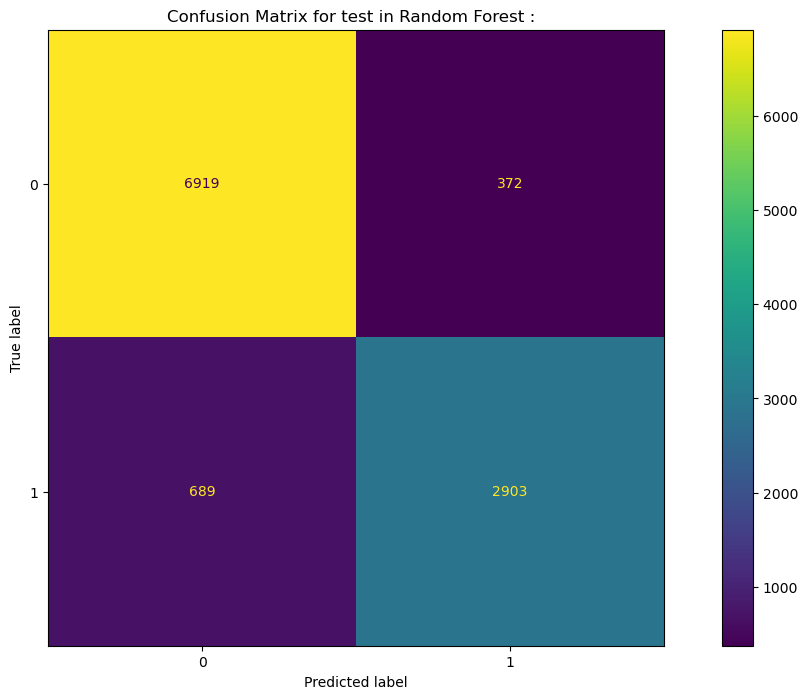

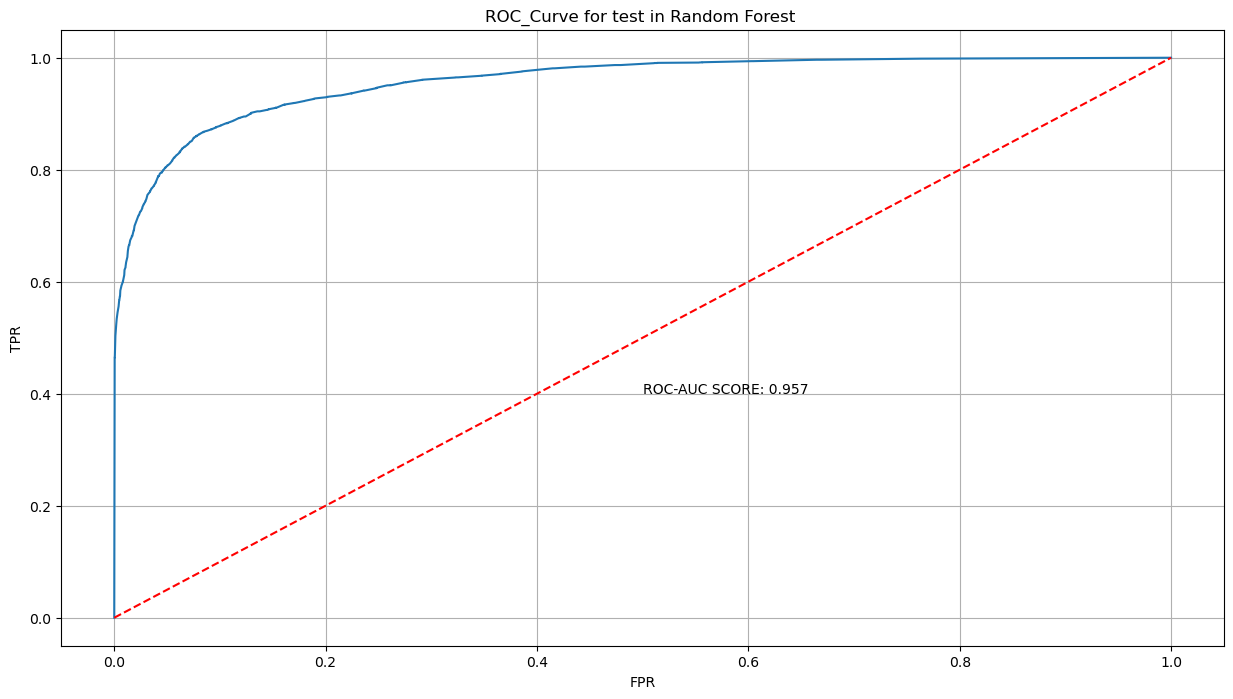

Name  Accuracy_train  Accuracy_test  Precision_train  \
0  Random Forest        0.994447       0.902508         0.995261   

   Precision_test  Recall_train  Recall_test  F1_score_train  F1_score_test  
0        0.886412        0.9877     0.808185        0.991466       0.845493

In [128]:
rf = RandomForestClassifier()
rf_model = rf.fit(xtrain,ytrain)

my_model(rf_model,'Random Forest')

### Random Forest with Hyper Parameter Tuning

In [129]:
'''tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [1, 5, 9],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
 
# instantiate the 'RandomForestClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
random_forest_classification = RandomForestClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the random forest classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, 
                       cv = 5)

# use fit() to fit the model on the train set
rf_grid_model = rf_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')'''

"tuned_paramaters = [{'criterion': ['entropy', 'gini'],\n                     'n_estimators': [10, 30, 50, 70, 90],\n                     'max_depth': [10, 15, 20],\n                     'max_features': ['sqrt', 'log2'],\n                     'min_samples_split': [2, 5, 8, 11],\n                     'min_samples_leaf': [1, 5, 9],\n                     'max_leaf_nodes': [2, 5, 8, 11]}]\n \n# instantiate the 'RandomForestClassifier' \n# pass the 'random_state' to obtain the same samples for each time you run the code\nrandom_forest_classification = RandomForestClassifier(random_state = 10)\n\n# use GridSearchCV() to find the optimal value of the hyperparameters\n# estimator: pass the random forest classifier model\n# param_grid: pass the list 'tuned_parameters'\n# cv: number of folds in k-fold i.e. here cv = 5\nrf_grid = GridSearchCV(estimator = random_forest_classification, \n                       param_grid = tuned_paramaters, \n                       cv = 5)\n\n# use fit() to fit the

classification report for train  
               precision    recall  f1-score   support

           0       0.82      0.94      0.88     17099
           1       0.83      0.58      0.69      8293

    accuracy                           0.83     25392
   macro avg       0.83      0.76      0.78     25392
weighted avg       0.83      0.83      0.82     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      7291
           1       0.82      0.58      0.68      3592

    accuracy                           0.82     10883
   macro avg       0.82      0.76      0.78     10883
weighted avg       0.82      0.82      0.81     10883



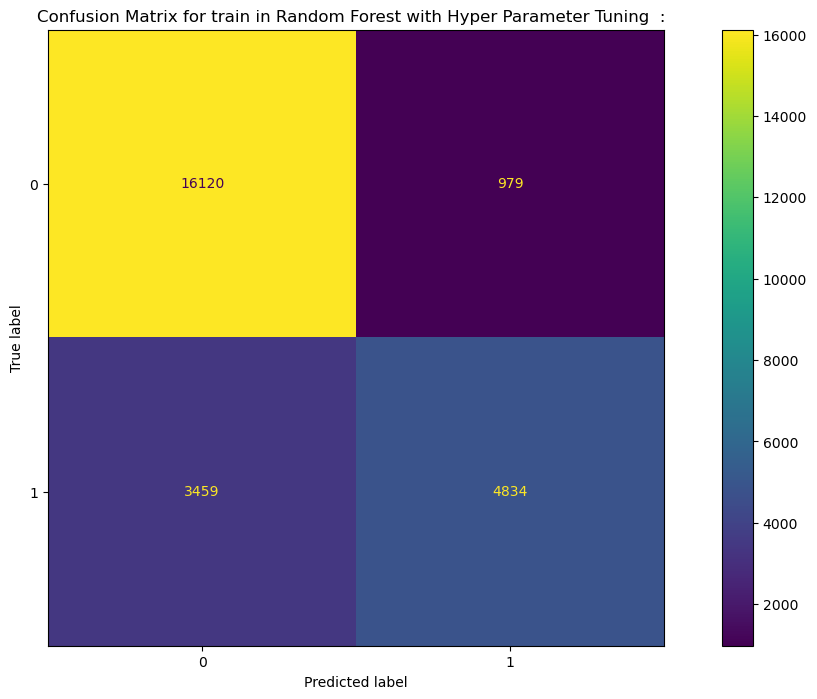

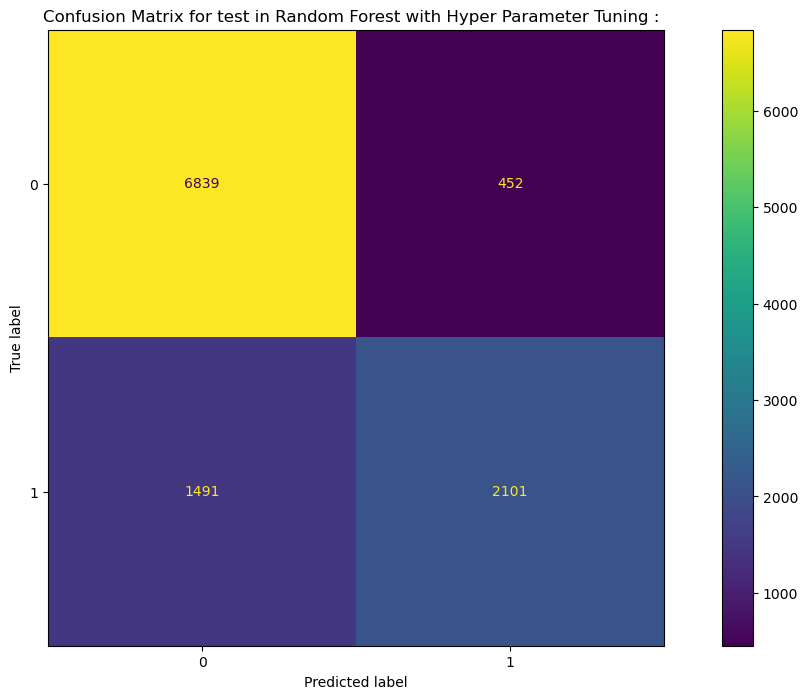

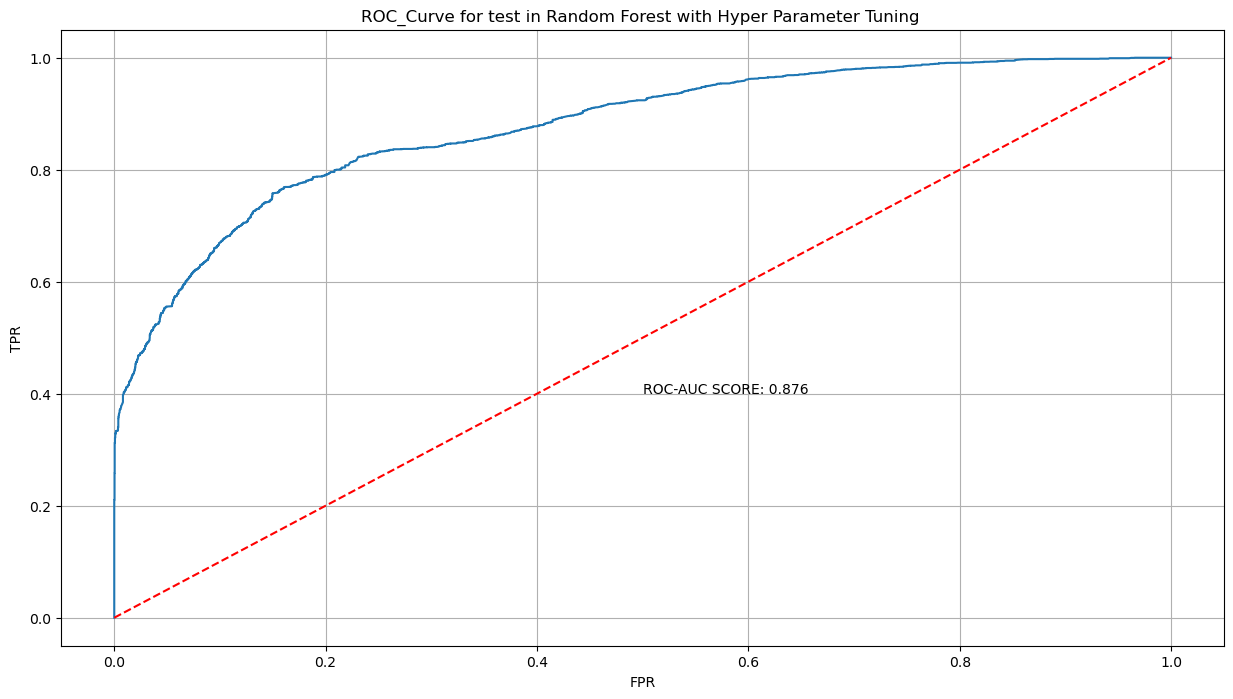

Name  Accuracy_train  Accuracy_test  \
0  Random Forest with Hyper Parameter Tuning        0.825221       0.821465   

   Precision_train  Precision_test  Recall_train  Recall_test  F1_score_train  \
0         0.831584        0.822953      0.582901     0.584911        0.685382   

   F1_score_test  
0       0.683808

In [130]:
rf = RandomForestClassifier(criterion='gini', max_depth=10, max_features='sqrt', max_leaf_nodes=11, 
                            min_samples_leaf= 1, min_samples_split=2, n_estimators=70)
rf_model_update = rf.fit(xtrain,ytrain)

my_model(rf_model_update,'Random Forest with Hyper Parameter Tuning')

### Ada Boost

classification report for train  
               precision    recall  f1-score   support

           0       0.85      0.89      0.87     17099
           1       0.75      0.68      0.71      8293

    accuracy                           0.82     25392
   macro avg       0.80      0.78      0.79     25392
weighted avg       0.82      0.82      0.82     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      7291
           1       0.74      0.68      0.71      3592

    accuracy                           0.82     10883
   macro avg       0.80      0.78      0.79     10883
weighted avg       0.81      0.82      0.82     10883



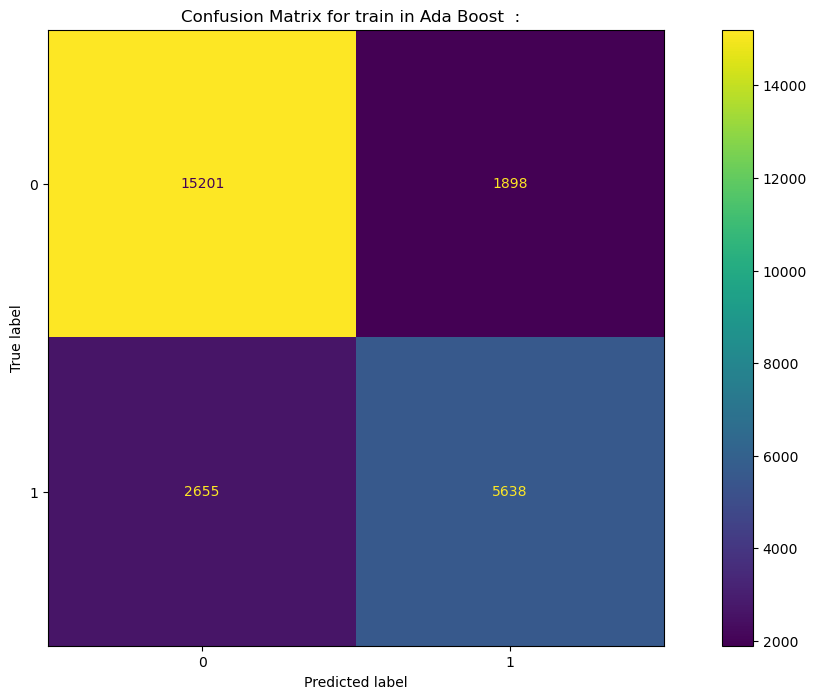

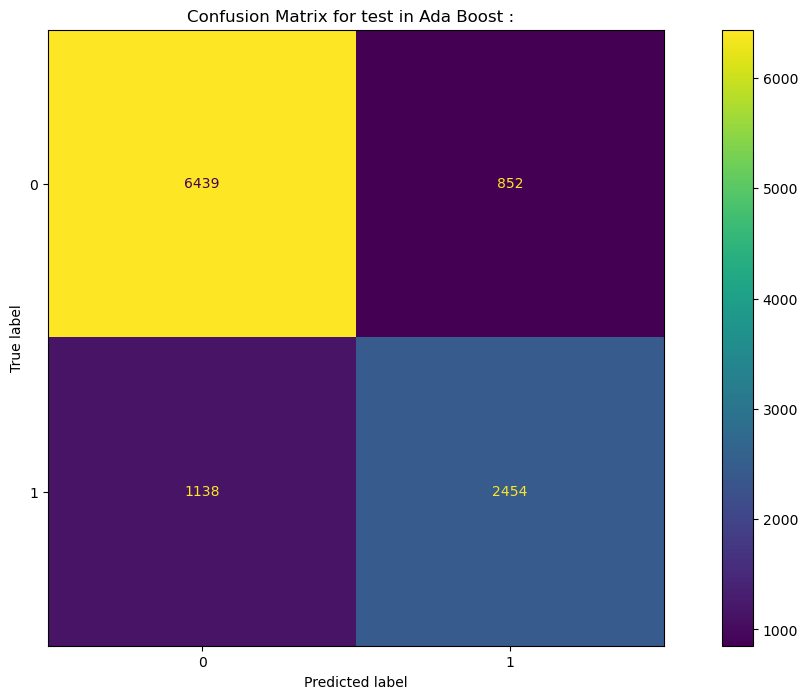

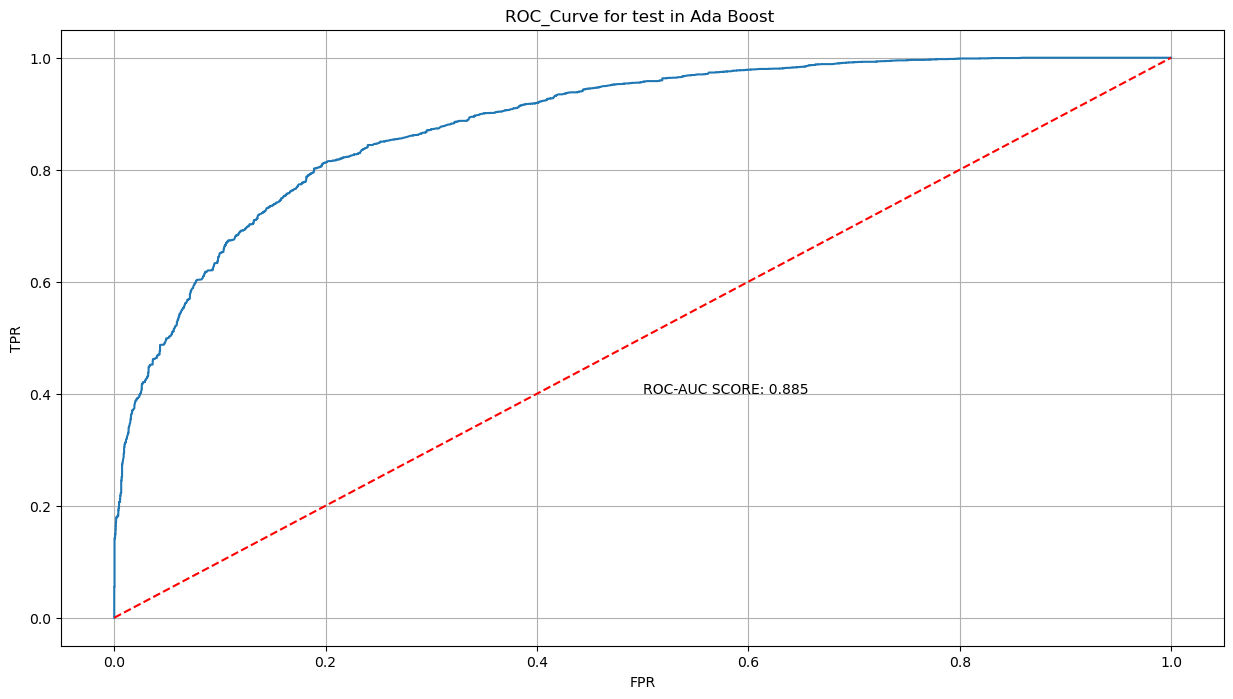

Name  Accuracy_train  Accuracy_test  Precision_train  Precision_test  \
0  Ada Boost        0.820692       0.817146         0.748142        0.742287   

   Recall_train  Recall_test  F1_score_train  F1_score_test  
0       0.67985     0.683185        0.712363       0.711511

In [131]:
ab = AdaBoostClassifier()
ab_model = ab.fit(xtrain,ytrain)

my_model(ab_model,'Ada Boost')

### Gradient Boost

classification report for train  
               precision    recall  f1-score   support

           0       0.87      0.93      0.90     17099
           1       0.82      0.70      0.76      8293

    accuracy                           0.85     25392
   macro avg       0.84      0.82      0.83     25392
weighted avg       0.85      0.85      0.85     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      7291
           1       0.82      0.71      0.76      3592

    accuracy                           0.85     10883
   macro avg       0.84      0.81      0.82     10883
weighted avg       0.85      0.85      0.85     10883



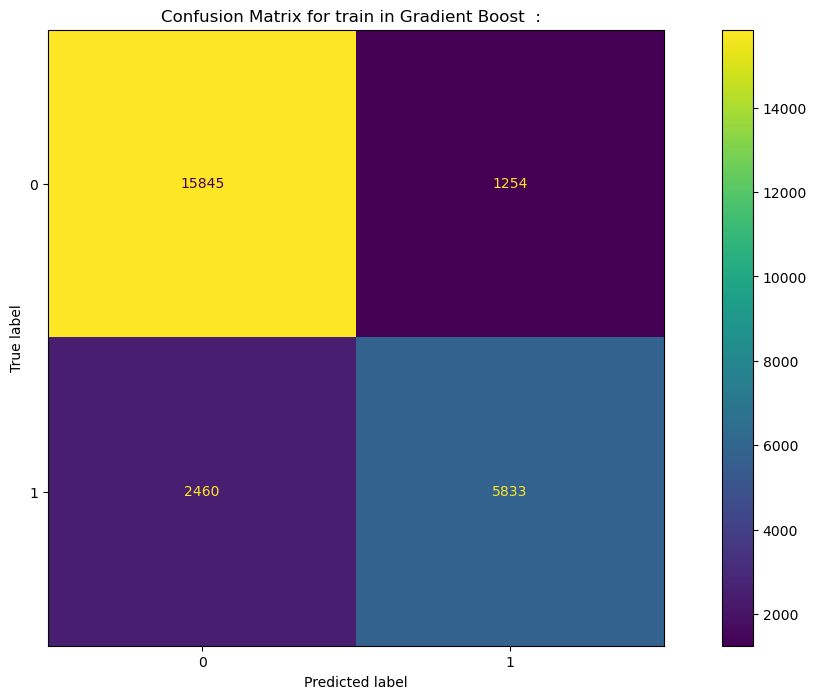

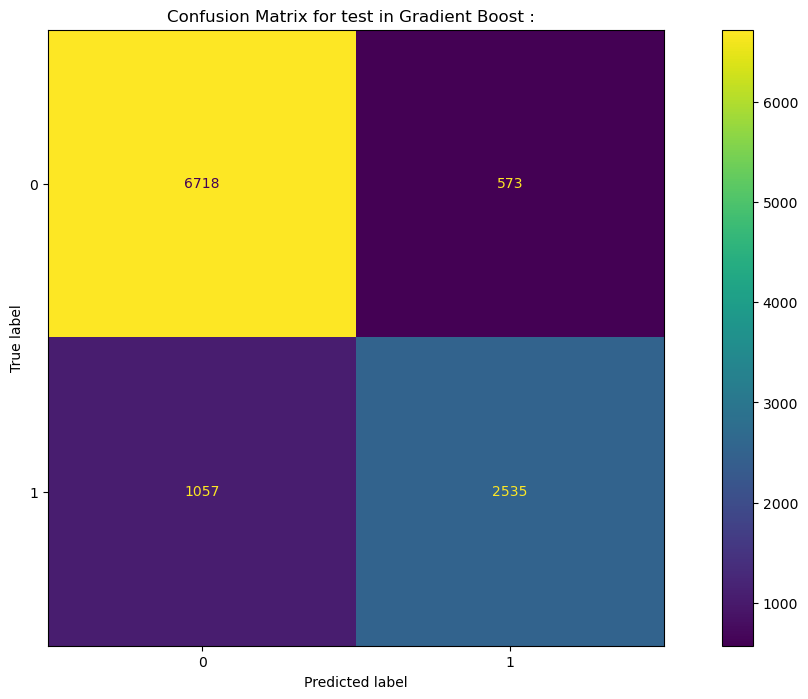

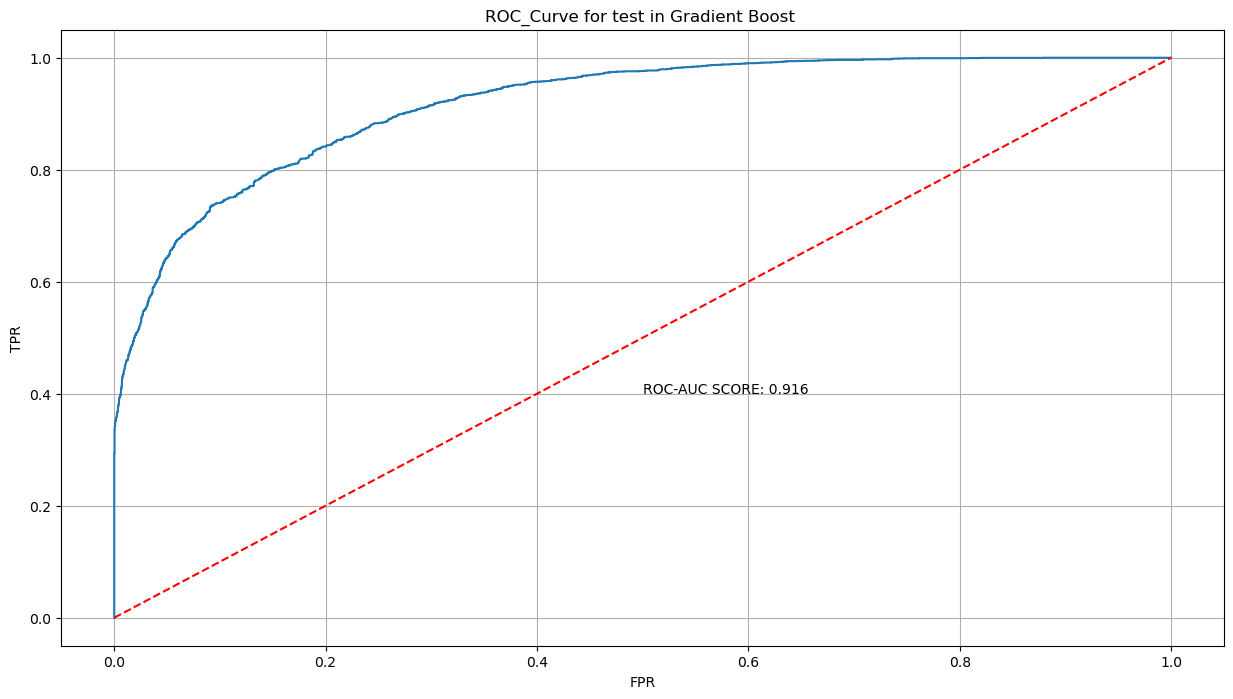

Name  Accuracy_train  Accuracy_test  Precision_train  \
0  Gradient Boost        0.853733       0.850225         0.823056   

   Precision_test  Recall_train  Recall_test  F1_score_train  F1_score_test  
0        0.815637      0.703364     0.705735        0.758518       0.756716

In [132]:
gb = GradientBoostingClassifier()
gb_model = gb.fit(xtrain,ytrain)

my_model(gb_model,'Gradient Boost')

### XG Boost

classification report for train  
               precision    recall  f1-score   support

           0       0.93      0.96      0.94     17099
           1       0.91      0.84      0.88      8293

    accuracy                           0.92     25392
   macro avg       0.92      0.90      0.91     25392
weighted avg       0.92      0.92      0.92     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      7291
           1       0.87      0.80      0.83      3592

    accuracy                           0.89     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.89      0.89      0.89     10883



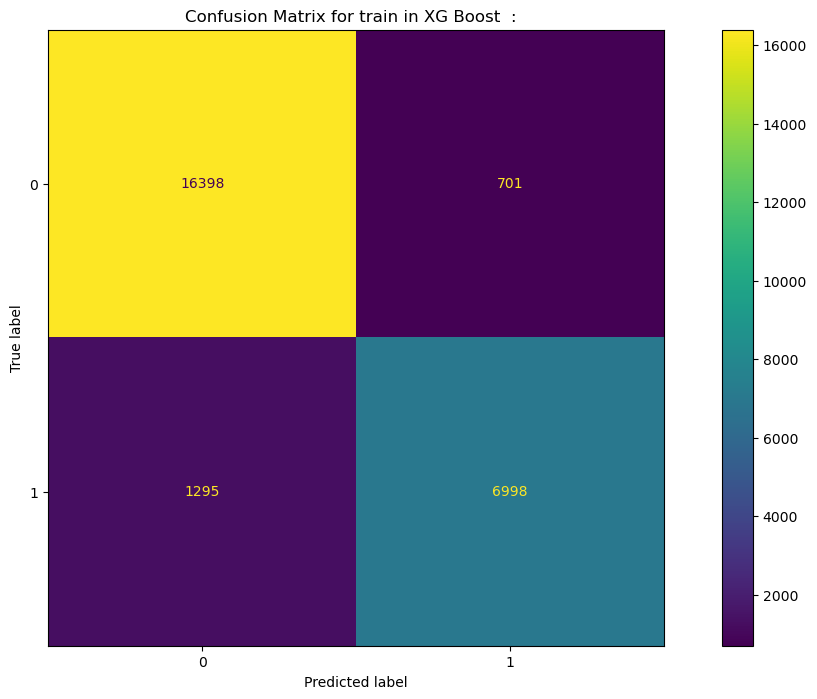

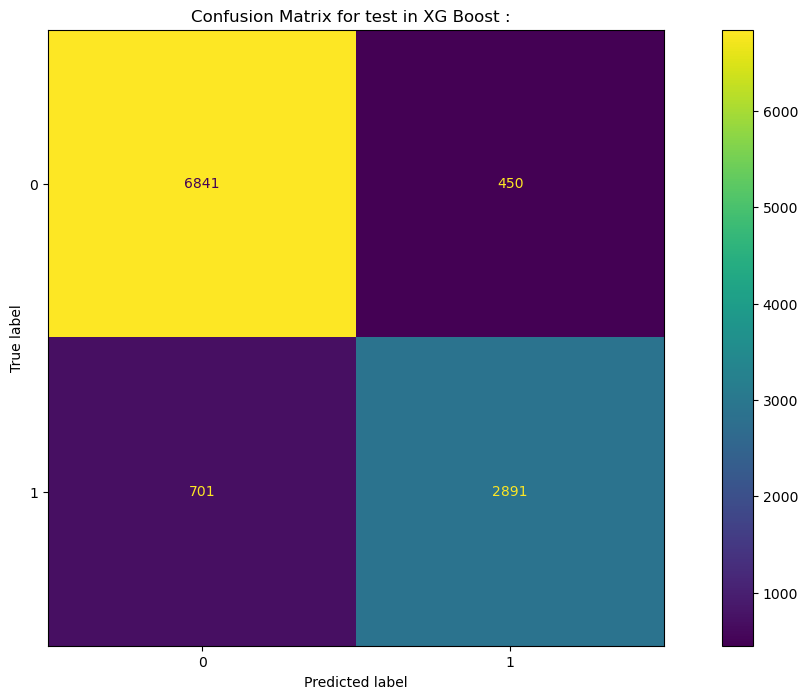

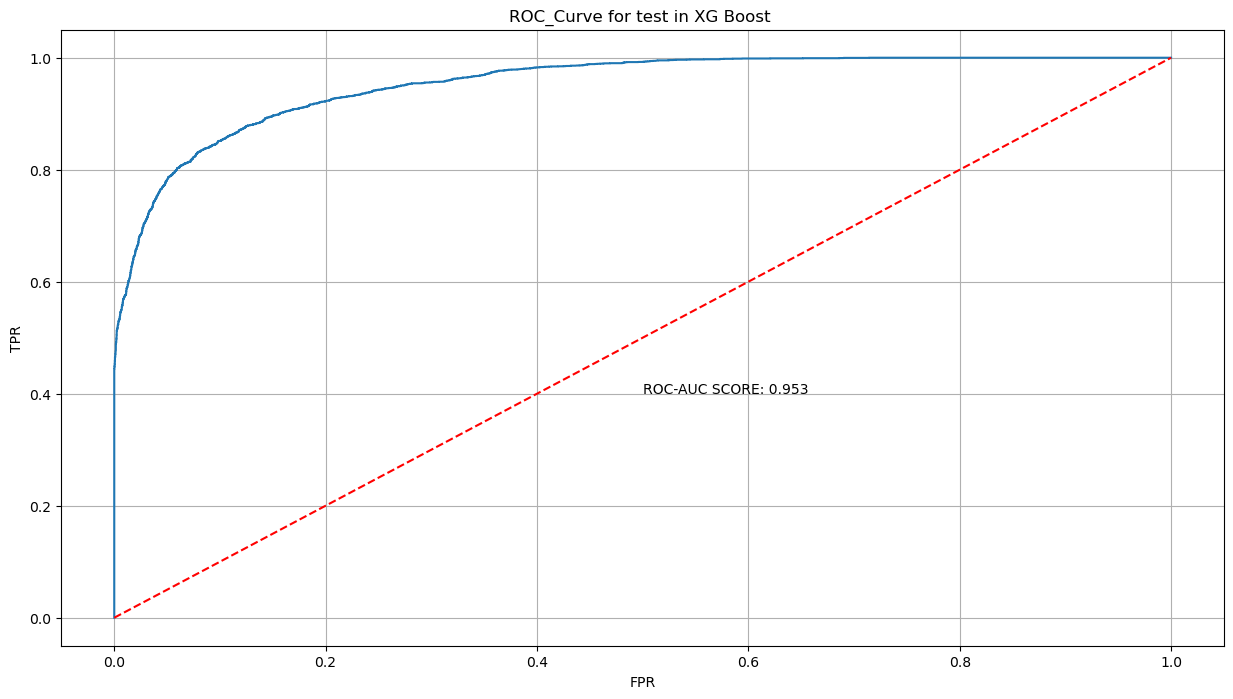

Name  Accuracy_train  Accuracy_test  Precision_train  Precision_test  \
0  XG Boost        0.921393       0.894239         0.908949         0.86531   

   Recall_train  Recall_test  F1_score_train  F1_score_test  
0      0.843844     0.804844        0.875188       0.833982

In [133]:
xg = XGBClassifier()
xg_model = xg.fit(xtrain,ytrain)

my_model(xg_model,'XG Boost')

### KNN

classification report for train  
               precision    recall  f1-score   support

           0       0.90      0.94      0.92     17099
           1       0.86      0.79      0.82      8293

    accuracy                           0.89     25392
   macro avg       0.88      0.86      0.87     25392
weighted avg       0.89      0.89      0.89     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      7291
           1       0.77      0.70      0.74      3592

    accuracy                           0.83     10883
   macro avg       0.82      0.80      0.81     10883
weighted avg       0.83      0.83      0.83     10883



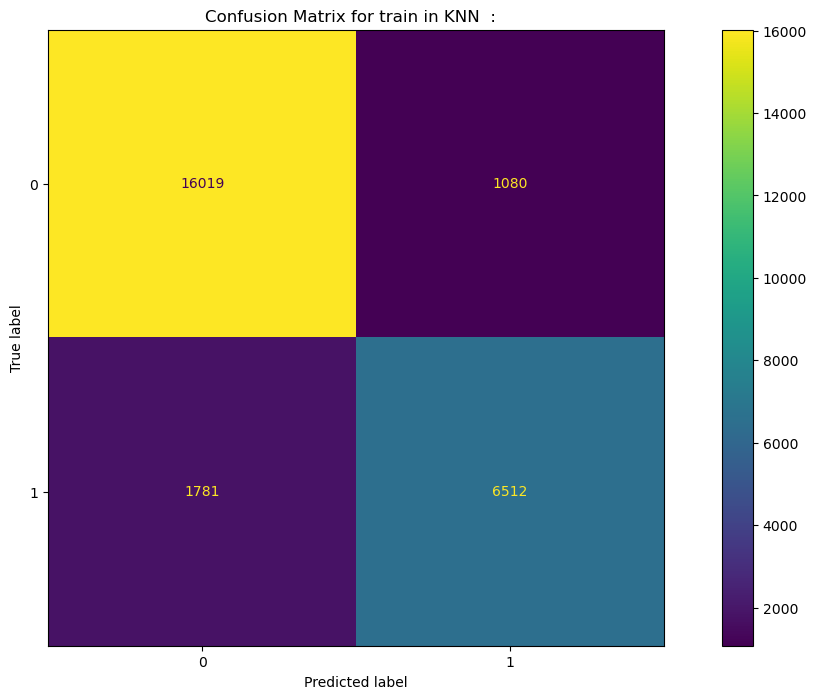

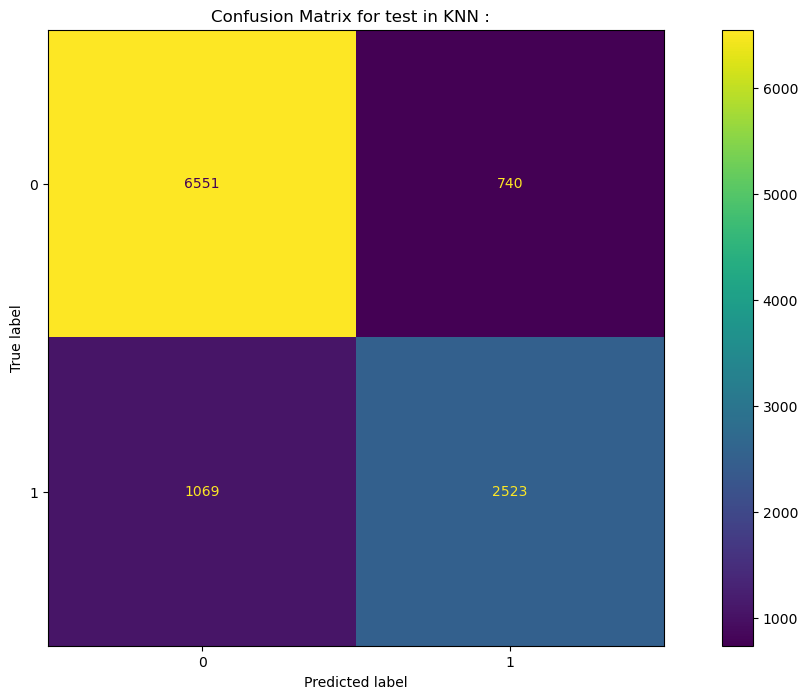

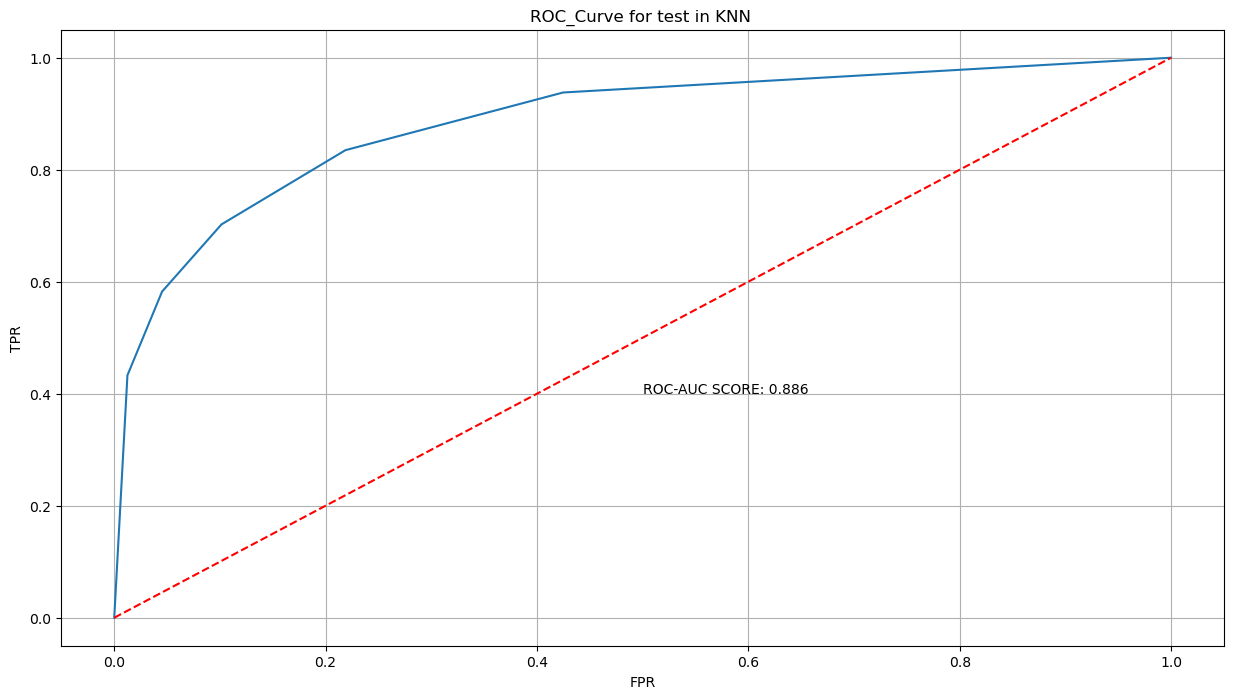

Name  Accuracy_train  Accuracy_test  Precision_train  Precision_test  \
0  KNN        0.887327       0.833777         0.857745        0.773215   

   Recall_train  Recall_test  F1_score_train  F1_score_test  
0      0.785241     0.702394        0.819893       0.736105

In [134]:
kn = KNeighborsClassifier()
kn_model = kn.fit(xtrain,ytrain)

my_model(kn_model,'KNN')

### KNN with Hyper Parameter Tuning

In [135]:
'''tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
 
# instantiate the 'KNeighborsClassifier' 
knn_classification = KNeighborsClassifier()

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the knn model
# param_grid: pass the dictionary with hyperparameters and its values
# cv: number of folds in k-fold i.e. here cv = 5
# scoring: pass the scoring parameter 'accuracy'
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')

# fit the model on X_train and y_train using fit()
knn_grid.fit(xtrain, ytrain)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')'''

"tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),\n                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}\n \n# instantiate the 'KNeighborsClassifier' \nknn_classification = KNeighborsClassifier()\n\n# use GridSearchCV() to find the optimal value of the hyperparameters\n# estimator: pass the knn model\n# param_grid: pass the dictionary with hyperparameters and its values\n# cv: number of folds in k-fold i.e. here cv = 5\n# scoring: pass the scoring parameter 'accuracy'\nknn_grid = GridSearchCV(estimator = knn_classification, \n                        param_grid = tuned_paramaters, \n                        cv = 5, \n                        scoring = 'accuracy')\n\n# fit the model on X_train and y_train using fit()\nknn_grid.fit(xtrain, ytrain)\n\n# get the best parameters\nprint('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')"

classification report for train  
               precision    recall  f1-score   support

           0       0.89      0.93      0.91     17099
           1       0.85      0.77      0.80      8293

    accuracy                           0.88     25392
   macro avg       0.87      0.85      0.86     25392
weighted avg       0.88      0.88      0.88     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      7291
           1       0.78      0.70      0.74      3592

    accuracy                           0.84     10883
   macro avg       0.82      0.80      0.81     10883
weighted avg       0.83      0.84      0.83     10883



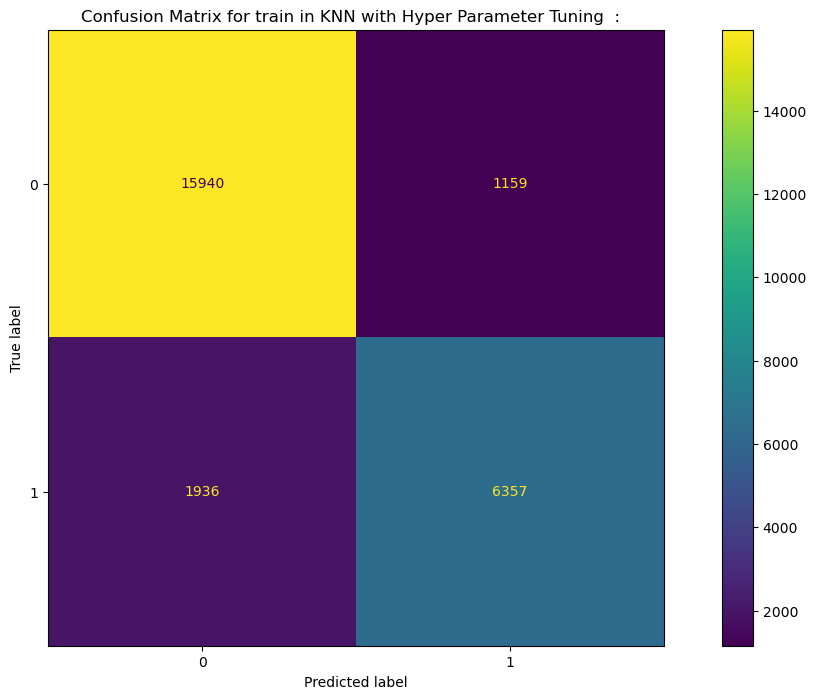

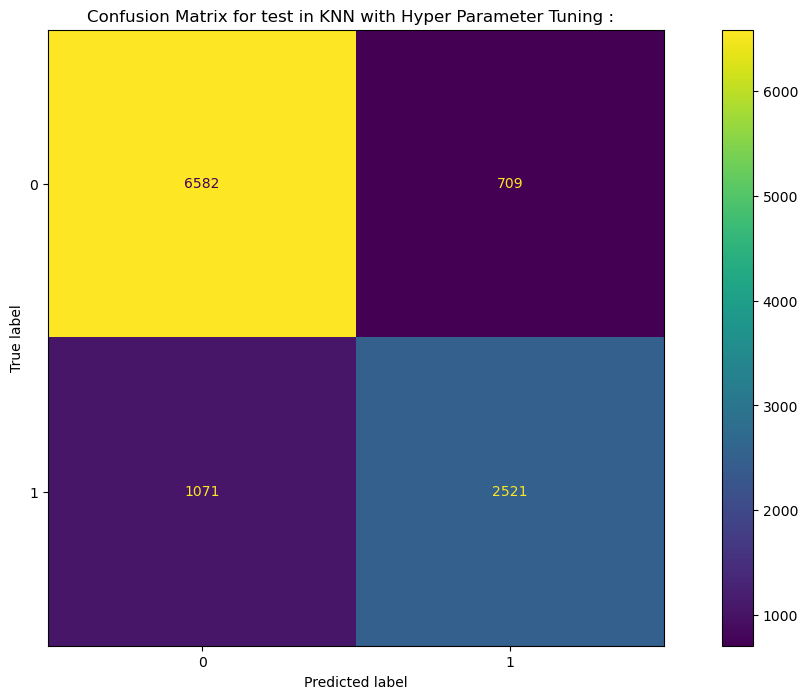

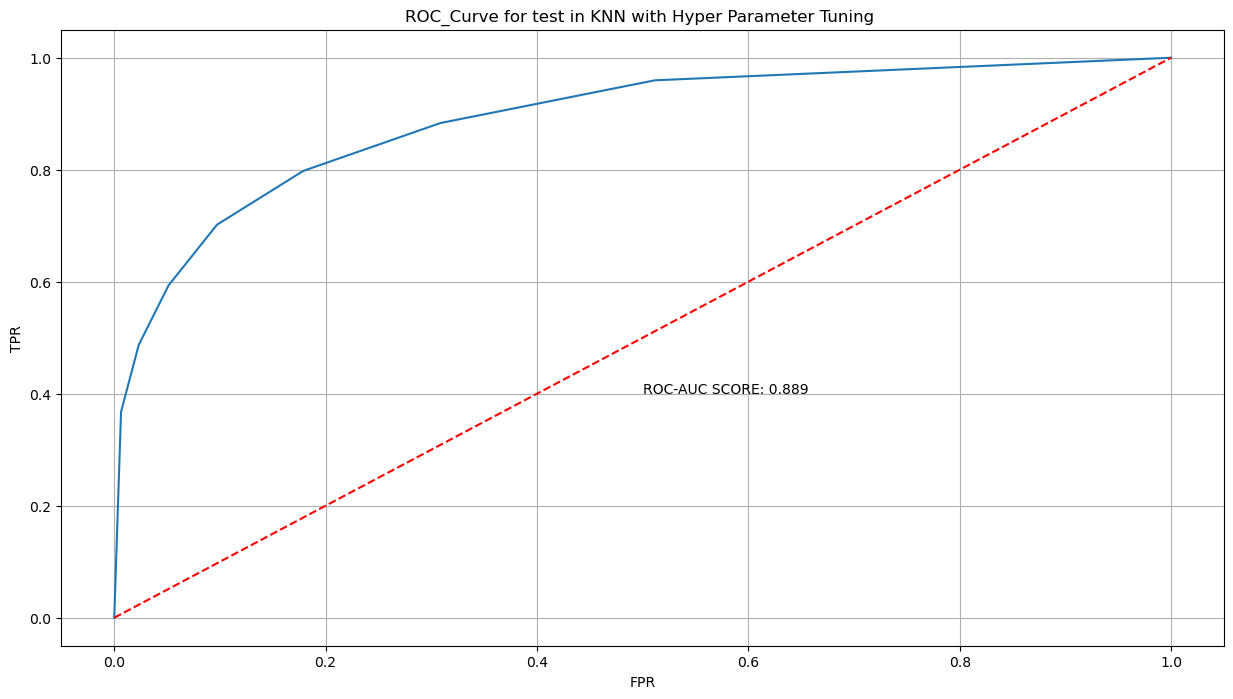

Name  Accuracy_train  Accuracy_test  \
0  KNN with Hyper Parameter Tuning        0.878111       0.836442   

   Precision_train  Precision_test  Recall_train  Recall_test  F1_score_train  \
0         0.845796        0.780495       0.76655     0.701837        0.804225   

   F1_score_test  
0       0.739079

In [136]:
kn = KNeighborsClassifier(metric='euclidean', n_neighbors=7)
kn_model_update = kn.fit(xtrain,ytrain)

my_model(kn_model_update,'KNN with Hyper Parameter Tuning')

### Naive Bayes

classification report for train  
               precision    recall  f1-score   support

           0       0.95      0.18      0.31     17099
           1       0.37      0.98      0.53      8293

    accuracy                           0.44     25392
   macro avg       0.66      0.58      0.42     25392
weighted avg       0.76      0.44      0.38     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.95      0.18      0.31      7291
           1       0.37      0.98      0.54      3592

    accuracy                           0.45     10883
   macro avg       0.66      0.58      0.42     10883
weighted avg       0.76      0.45      0.39     10883



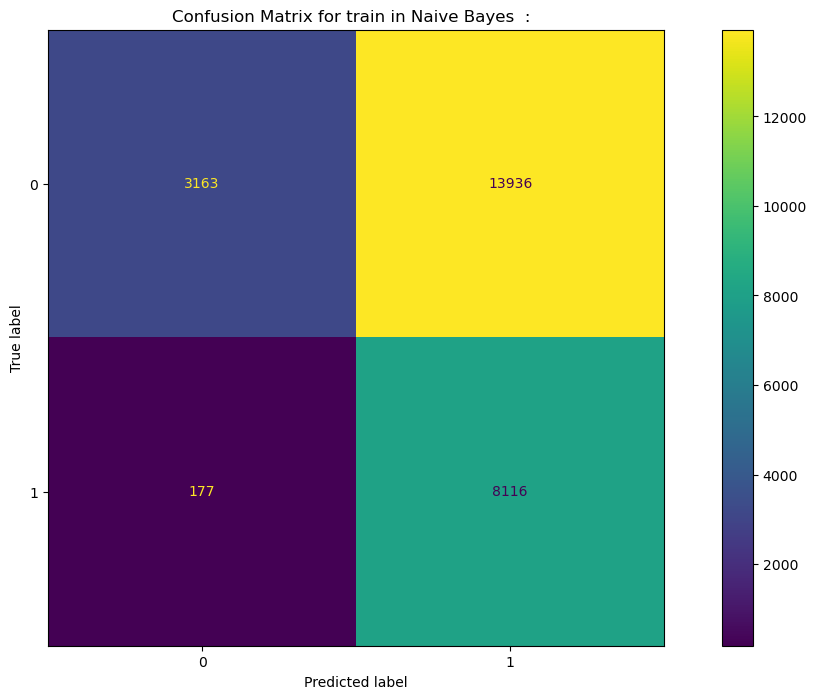

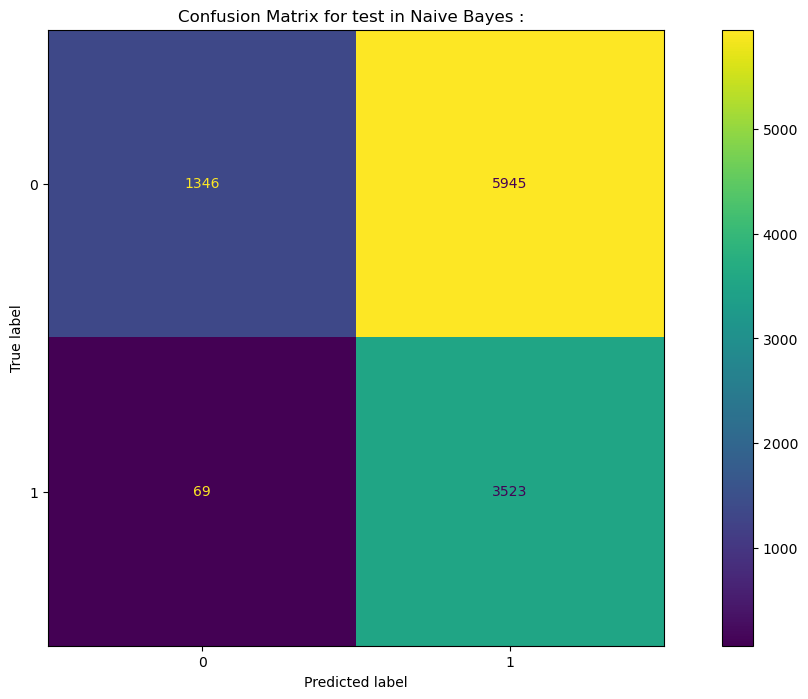

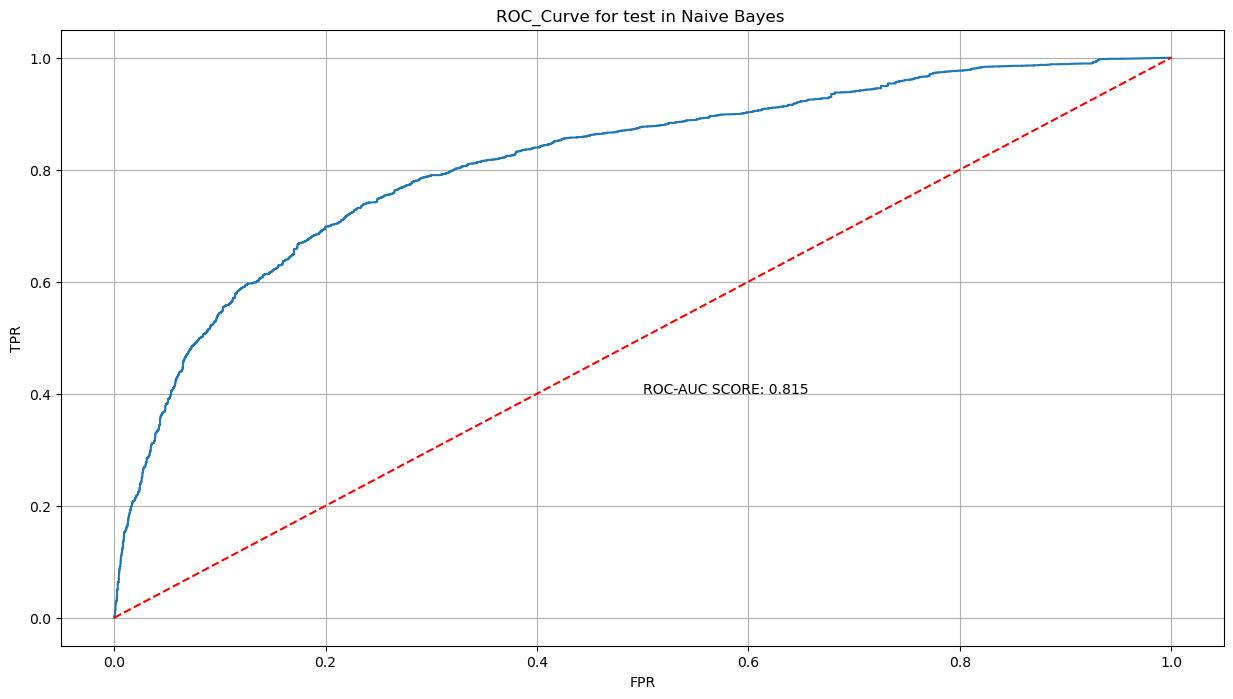

Name  Accuracy_train  Accuracy_test  Precision_train  \
0  Naive Bayes        0.444195       0.447395         0.368039   

   Precision_test  Recall_train  Recall_test  F1_score_train  F1_score_test  
0        0.372095      0.978657     0.980791        0.534915        0.53951

In [137]:
nb = GaussianNB()
nb_model = nb.fit(xtrain,ytrain)

my_model(nb_model,'Naive Bayes')

### Extra Tree

classification report for train  
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     17099
           1       1.00      0.99      0.99      8293

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

classification report for test  
               precision    recall  f1-score   support

           0       0.89      0.89      0.89      7291
           1       0.77      0.77      0.77      3592

    accuracy                           0.85     10883
   macro avg       0.83      0.83      0.83     10883
weighted avg       0.85      0.85      0.85     10883



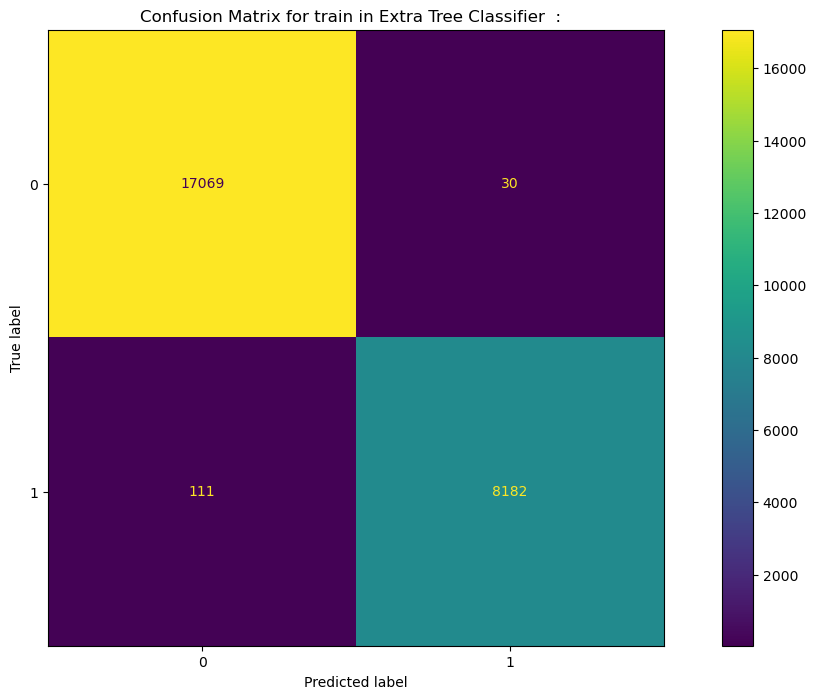

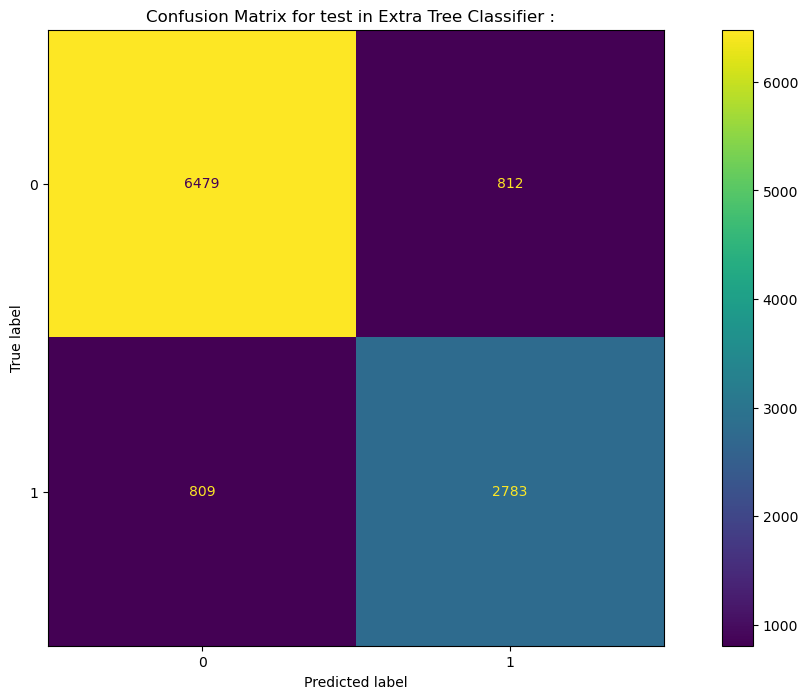

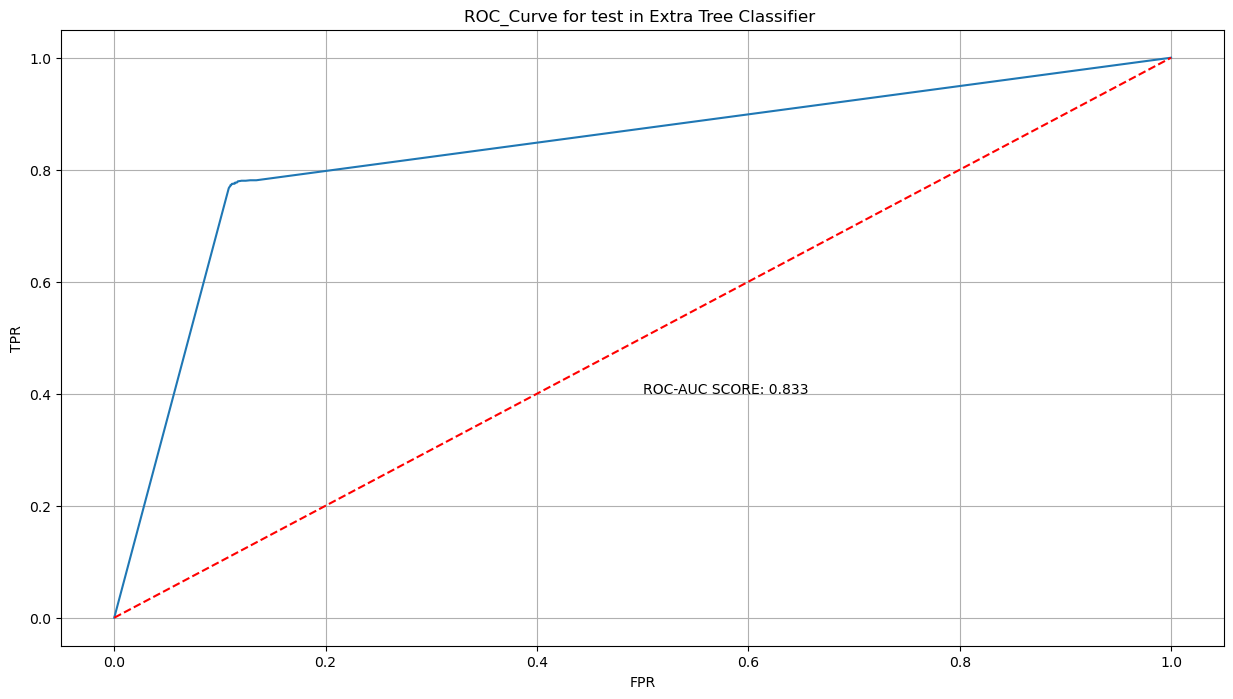

Name  Accuracy_train  Accuracy_test  Precision_train  \
0  Extra Tree Classifier        0.994447       0.851052         0.996347   

   Precision_test  Recall_train  Recall_test  F1_score_train  F1_score_test  
0        0.774131      0.986615     0.774777        0.991457       0.774454

In [138]:
et = ExtraTreeClassifier()
et_model = et.fit(xtrain,ytrain)

my_model(et_model,'Extra Tree Classifier')

### Cat Boost

Learning rate set to 0.040996
0:	learn: 0.6650338	total: 148ms	remaining: 2m 28s
1:	learn: 0.6387050	total: 155ms	remaining: 1m 17s
2:	learn: 0.6137322	total: 162ms	remaining: 53.8s
3:	learn: 0.5927619	total: 169ms	remaining: 42.1s
4:	learn: 0.5721980	total: 176ms	remaining: 35.1s
5:	learn: 0.5551309	total: 183ms	remaining: 30.4s
6:	learn: 0.5393560	total: 190ms	remaining: 27s
7:	learn: 0.5232865	total: 198ms	remaining: 24.6s
8:	learn: 0.5106514	total: 206ms	remaining: 22.7s
9:	learn: 0.4994903	total: 214ms	remaining: 21.2s
10:	learn: 0.4901153	total: 222ms	remaining: 20s
11:	learn: 0.4820530	total: 230ms	remaining: 18.9s
12:	learn: 0.4744033	total: 237ms	remaining: 18s
13:	learn: 0.4672517	total: 244ms	remaining: 17.2s
14:	learn: 0.4606794	total: 251ms	remaining: 16.4s
15:	learn: 0.4553352	total: 257ms	remaining: 15.8s
16:	learn: 0.4491272	total: 264ms	remaining: 15.3s
17:	learn: 0.4437996	total: 271ms	remaining: 14.8s
18:	learn: 0.4387017	total: 277ms	remaining: 14.3s
19:	learn: 0.43

187:	learn: 0.3088030	total: 1.45s	remaining: 6.25s
188:	learn: 0.3086444	total: 1.45s	remaining: 6.24s
189:	learn: 0.3084103	total: 1.46s	remaining: 6.23s
190:	learn: 0.3082006	total: 1.47s	remaining: 6.23s
191:	learn: 0.3079036	total: 1.48s	remaining: 6.22s
192:	learn: 0.3074202	total: 1.48s	remaining: 6.21s
193:	learn: 0.3068561	total: 1.49s	remaining: 6.19s
194:	learn: 0.3065720	total: 1.5s	remaining: 6.18s
195:	learn: 0.3064507	total: 1.5s	remaining: 6.17s
196:	learn: 0.3058671	total: 1.51s	remaining: 6.16s
197:	learn: 0.3054406	total: 1.52s	remaining: 6.14s
198:	learn: 0.3053386	total: 1.52s	remaining: 6.13s
199:	learn: 0.3051597	total: 1.53s	remaining: 6.12s
200:	learn: 0.3050384	total: 1.54s	remaining: 6.11s
201:	learn: 0.3048605	total: 1.54s	remaining: 6.1s
202:	learn: 0.3046235	total: 1.55s	remaining: 6.08s
203:	learn: 0.3044383	total: 1.56s	remaining: 6.07s
204:	learn: 0.3042749	total: 1.56s	remaining: 6.06s
205:	learn: 0.3039035	total: 1.57s	remaining: 6.05s
206:	learn: 0.3

355:	learn: 0.2739846	total: 2.63s	remaining: 4.77s
356:	learn: 0.2738266	total: 2.65s	remaining: 4.77s
357:	learn: 0.2736270	total: 2.66s	remaining: 4.77s
358:	learn: 0.2735148	total: 2.67s	remaining: 4.76s
359:	learn: 0.2731713	total: 2.67s	remaining: 4.76s
360:	learn: 0.2730389	total: 2.68s	remaining: 4.75s
361:	learn: 0.2729351	total: 2.69s	remaining: 4.74s
362:	learn: 0.2728469	total: 2.69s	remaining: 4.73s
363:	learn: 0.2726797	total: 2.7s	remaining: 4.72s
364:	learn: 0.2725166	total: 2.71s	remaining: 4.71s
365:	learn: 0.2723407	total: 2.71s	remaining: 4.7s
366:	learn: 0.2721900	total: 2.72s	remaining: 4.69s
367:	learn: 0.2720150	total: 2.73s	remaining: 4.68s
368:	learn: 0.2718800	total: 2.73s	remaining: 4.68s
369:	learn: 0.2717274	total: 2.74s	remaining: 4.67s
370:	learn: 0.2715007	total: 2.75s	remaining: 4.66s
371:	learn: 0.2713916	total: 2.75s	remaining: 4.65s
372:	learn: 0.2713201	total: 2.76s	remaining: 4.64s
373:	learn: 0.2711517	total: 2.77s	remaining: 4.63s
374:	learn: 0.

524:	learn: 0.2528822	total: 3.87s	remaining: 3.5s
525:	learn: 0.2528306	total: 3.87s	remaining: 3.49s
526:	learn: 0.2527455	total: 3.88s	remaining: 3.48s
527:	learn: 0.2526591	total: 3.89s	remaining: 3.48s
528:	learn: 0.2525673	total: 3.9s	remaining: 3.47s
529:	learn: 0.2524832	total: 3.9s	remaining: 3.46s
530:	learn: 0.2524160	total: 3.91s	remaining: 3.46s
531:	learn: 0.2523340	total: 3.92s	remaining: 3.45s
532:	learn: 0.2521966	total: 3.93s	remaining: 3.44s
533:	learn: 0.2521213	total: 3.93s	remaining: 3.43s
534:	learn: 0.2519784	total: 3.94s	remaining: 3.43s
535:	learn: 0.2518053	total: 3.95s	remaining: 3.42s
536:	learn: 0.2517207	total: 3.96s	remaining: 3.41s
537:	learn: 0.2516367	total: 3.96s	remaining: 3.4s
538:	learn: 0.2515190	total: 3.97s	remaining: 3.4s
539:	learn: 0.2514286	total: 3.98s	remaining: 3.39s
540:	learn: 0.2513050	total: 3.99s	remaining: 3.38s
541:	learn: 0.2510766	total: 3.99s	remaining: 3.38s
542:	learn: 0.2510019	total: 4s	remaining: 3.37s
543:	learn: 0.250881

696:	learn: 0.2370965	total: 5.11s	remaining: 2.22s
697:	learn: 0.2370639	total: 5.11s	remaining: 2.21s
698:	learn: 0.2369678	total: 5.12s	remaining: 2.21s
699:	learn: 0.2369052	total: 5.13s	remaining: 2.2s
700:	learn: 0.2368483	total: 5.13s	remaining: 2.19s
701:	learn: 0.2367651	total: 5.14s	remaining: 2.18s
702:	learn: 0.2367104	total: 5.15s	remaining: 2.17s
703:	learn: 0.2366477	total: 5.16s	remaining: 2.17s
704:	learn: 0.2365741	total: 5.16s	remaining: 2.16s
705:	learn: 0.2364752	total: 5.17s	remaining: 2.15s
706:	learn: 0.2364039	total: 5.17s	remaining: 2.15s
707:	learn: 0.2363509	total: 5.18s	remaining: 2.14s
708:	learn: 0.2362856	total: 5.19s	remaining: 2.13s
709:	learn: 0.2362357	total: 5.2s	remaining: 2.12s
710:	learn: 0.2360699	total: 5.2s	remaining: 2.11s
711:	learn: 0.2359586	total: 5.21s	remaining: 2.11s
712:	learn: 0.2358812	total: 5.21s	remaining: 2.1s
713:	learn: 0.2358315	total: 5.22s	remaining: 2.09s
714:	learn: 0.2357560	total: 5.23s	remaining: 2.08s
715:	learn: 0.23

878:	learn: 0.2241758	total: 6.35s	remaining: 875ms
879:	learn: 0.2240876	total: 6.36s	remaining: 868ms
880:	learn: 0.2240504	total: 6.37s	remaining: 860ms
881:	learn: 0.2239932	total: 6.38s	remaining: 853ms
882:	learn: 0.2239065	total: 6.38s	remaining: 846ms
883:	learn: 0.2238473	total: 6.39s	remaining: 839ms
884:	learn: 0.2237767	total: 6.4s	remaining: 831ms
885:	learn: 0.2237514	total: 6.4s	remaining: 824ms
886:	learn: 0.2236847	total: 6.41s	remaining: 817ms
887:	learn: 0.2236260	total: 6.42s	remaining: 809ms
888:	learn: 0.2235564	total: 6.42s	remaining: 802ms
889:	learn: 0.2235131	total: 6.43s	remaining: 795ms
890:	learn: 0.2234671	total: 6.44s	remaining: 787ms
891:	learn: 0.2234241	total: 6.44s	remaining: 780ms
892:	learn: 0.2233253	total: 6.45s	remaining: 773ms
893:	learn: 0.2232575	total: 6.46s	remaining: 766ms
894:	learn: 0.2231932	total: 6.46s	remaining: 758ms
895:	learn: 0.2231029	total: 6.47s	remaining: 751ms
896:	learn: 0.2230293	total: 6.48s	remaining: 744ms
897:	learn: 0.

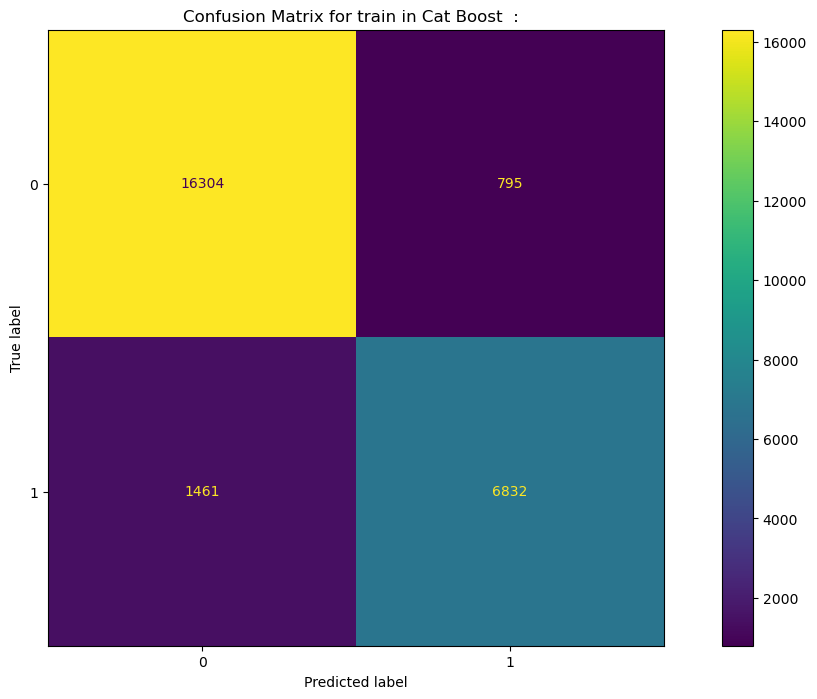

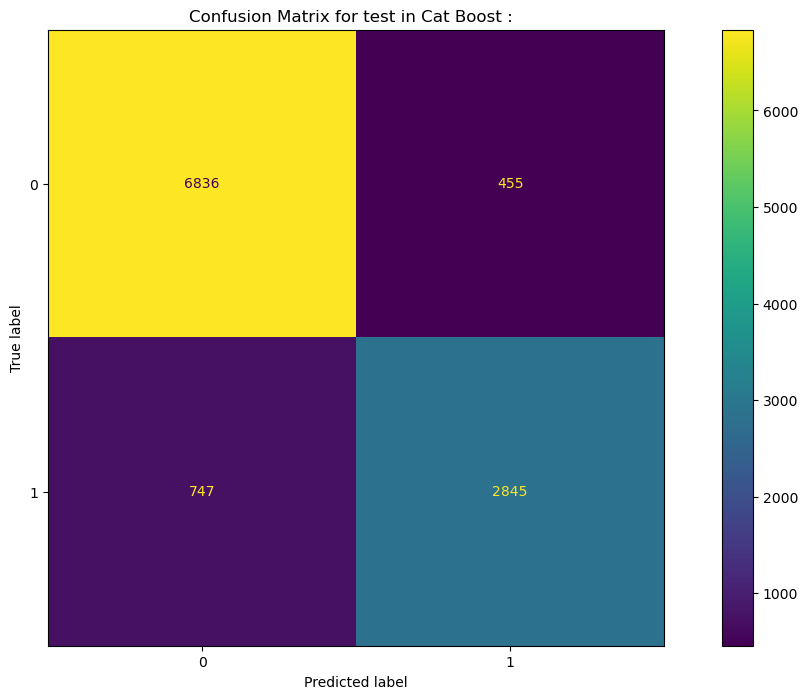

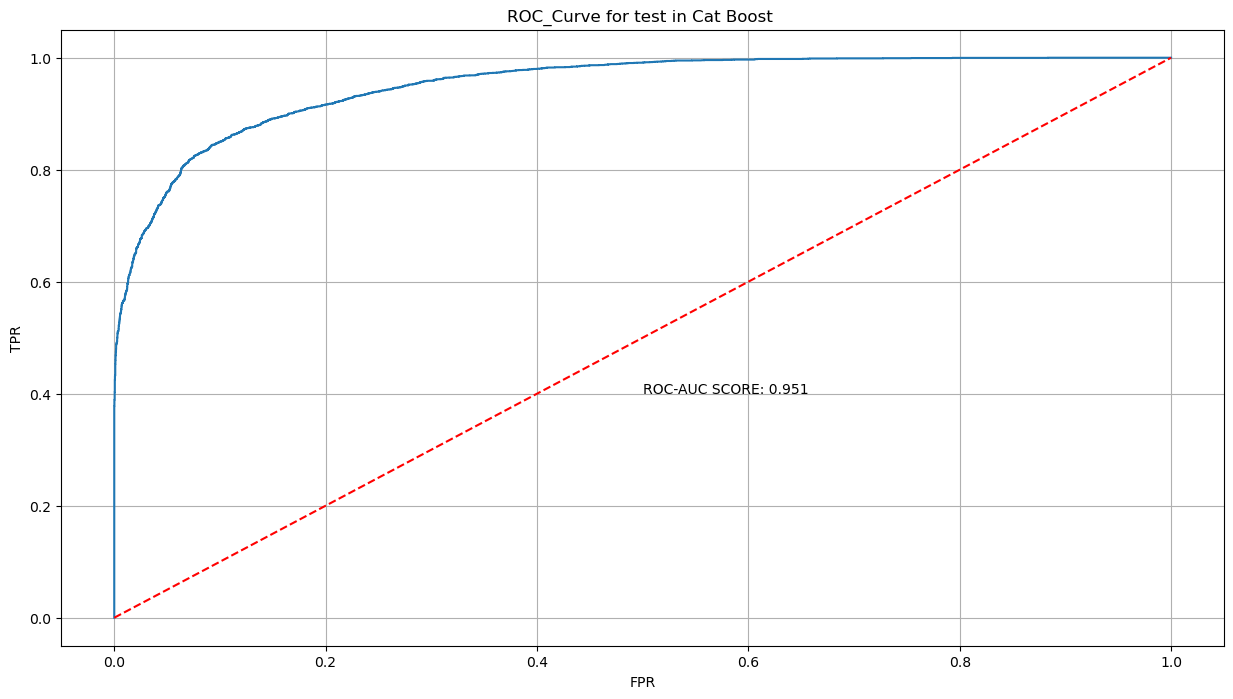

Name  Accuracy_train  Accuracy_test  Precision_train  Precision_test  \
0  Cat Boost        0.911153       0.889553         0.895765        0.862121   

   Recall_train  Recall_test  F1_score_train  F1_score_test  
0      0.823827     0.792038        0.858291       0.825595

In [139]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb_model = cb.fit(xtrain,ytrain)

my_model(cb_model,'Cat Boost')

## Check results

In [140]:
check_df

Name  Accuracy_train  Accuracy_test  \
0                         Logistic Regression        0.799386       0.800147   
1                               Decision Tree        0.994447       0.867316   
2          Decision Tree with Hyper Parameter        0.787965       0.784618   
3                               Random Forest        0.994447       0.902508   
4   Random Forest with Hyper Parameter Tuning        0.825221       0.821465   
5                                   Ada Boost        0.820692       0.817146   
6                              Gradient Boost        0.853733       0.850225   
7                                    XG Boost        0.921393       0.894239   
8                                         KNN        0.887327       0.833777   
9             KNN with Hyper Parameter Tuning        0.878111       0.836442   
10                                Naive Bayes        0.444195       0.447395   
11                      Extra Tree Classifier        0.994447       0.851052   
12                                  Cat Boost        0.911153       0.889553   

    Precision_train  Precision_test  Recall_train  Recall_test  \
0          0.732858        0.735460      0.607018     0.616091   
1          0.996347        0.795217      0.986615     0.805401   
2          0.690804        0.689091      0.634993     0.633073   
3          0.995261        0.886412      0.987700     0.808185   
4          0.831584        0.822953      0.582901     0.584911   
5          0.748142        0.742287      0.679850     0.683185   
6          0.823056        0.815637      0.703364     0.705735   
7          0.908949        0.865310      0.843844     0.804844   
8          0.857745        0.773215      0.785241     0.702394   
9          0.845796        0.780495      0.766550     0.701837   
10         0.368039        0.372095      0.978657     0.980791   
11         0.996347        0.774131      0.986615     0.774777   
12         0.895765        0.862121      0.823827     0.792038   

    F1_score_train  F1_score_test  
0         0.664028       0.670504  
1         0.991457       0.800277  
2         0.661724       0.659896  
3         0.991466       0.845493  
4         0.685382       0.683808  
5         0.712363       0.711511  
6         0.758518       0.756716  
7         0.875188       0.833982  
8         0.819893       0.736105  
9         0.804225       0.739079  
10        0.534915       0.539510  
11        0.991457       0.774454  
12        0.858291       0.825595

## Interpret the Model

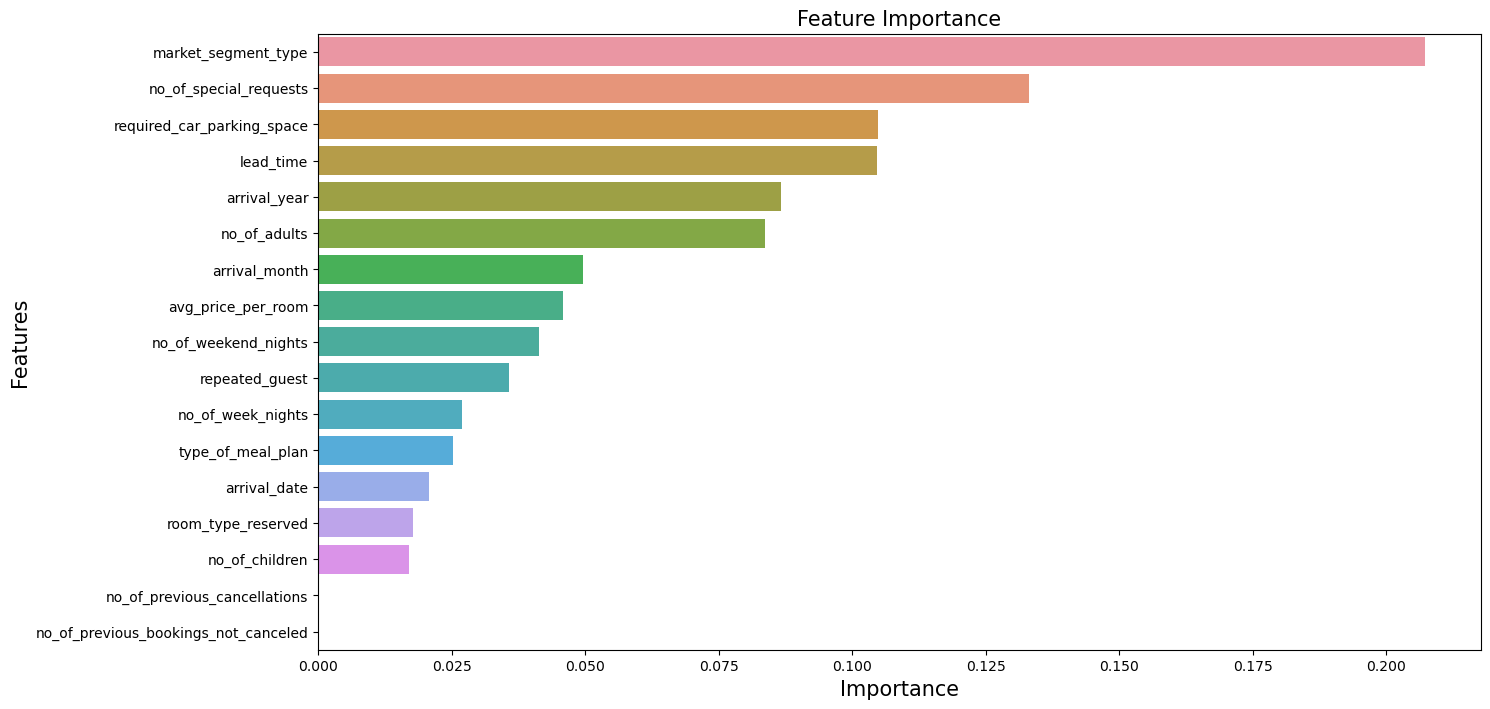

In [141]:
# create a dataframe that stores the feature names and their importance
# 'feature_importances_' returns the features based on the average gain 
important_features = pd.DataFrame({'Features': xtrain.columns, 
                                   'Importance': xg_model.feature_importances_})

# sort the dataframe in the descending order according to the feature importance
important_features = important_features.sort_values('Importance', ascending = False)

# create a barplot to visualize the features based on their importance
sns.barplot(x = 'Importance', y = 'Features', data = important_features)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

# display the plot
plt.show()

## Model Pipeline

In [142]:
def print_metrics(ytest,y_pred,model_name):
    print('Metrics for the model',model_name)
    print('')
    print('Accuracy Score =',accuracy_score(ytest,y_pred))
    print('')
    print('Precision Score =',precision_score(ytest,y_pred))
    print('')
    print('Recall Score =',recall_score(ytest,y_pred))
    print('')
    print('F1 Score =',f1_score(ytest,y_pred))
    print('')
    print('ROC Score =',roc_auc_score(ytest,y_pred))

In [143]:
from sklearn.pipeline import Pipeline
sc = StandardScaler()
xg = xg
steps=[('scaler',sc),('xgboost',xg)]
pipeline = Pipeline(steps)
pipeline.fit(xtrain,ytrain)
y_pred=pipeline.predict(xtest)
print_metrics(ytest,y_pred,'Pipeline')

Metrics for the model Pipeline

Accuracy Score = 0.894238720940917

Precision Score = 0.8653097874887759

Recall Score = 0.8048440979955457

F1 Score = 0.8339824030001444

ROC Score = 0.871562084658176


## Freeze the Pipeline Model

In [144]:
import pickle
model = open('capstone.pickle','wb')
pickle.dump(pipeline,model)
model.close()

## Deploy the pickled model

In [145]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
st.title("Hotel Reservation Cancellation Predictor")
st.markdown('Will the booking be cancelled or not?')

model = open("capstone.pickle", "rb")
clf = pickle.load(model)
model.close()

# Collect user input
no_of_adults = st.slider("Number of Adults", 0, 4)
no_of_children = st.slider("Number of Children", 0, 10)
no_of_weekend_nights = st.slider("Number of Weekend Nights", 0, 7)
no_of_week_nights = st.slider("Number of Week Nights", 1, 17)
type_of_meal_plan = st.selectbox("Type of Meal Plan", ["Not Selected", "Meal Plan 1", "Meal Plan 2", "Meal Plan 3"])
required_car_parking_space = st.selectbox("Required Car Parking Space", ['No', 'Yes'])
room_type_reserved = st.selectbox("Room Type Reserved", ["Room_Type 1", "Room_Type 2", "Room_Type 3", "Room_Type 4", "Room_Type 5", "Room_Type 6", "Room_Type 7"])
lead_time = st.slider("Lead Time", 0, 600)
arrival_year = st.selectbox("Arrival Year", [2017, 2018])
arrival_month = st.selectbox("Arrival Month", list(range(1, 13)))
arrival_date = st.slider("Arrival Date", 1, 31)
market_segment_type = st.selectbox("Market Segment Type", ["Online", "Offline", "Corporate", "Complementary", "Aviation"])
repeated_guest = st.selectbox("Repeated Guest", ['No', 'Yes'])
no_of_previous_cancellations = st.slider("Number of Previous Cancellations", 0, 13)
no_of_previous_bookings_not_canceled = st.slider("Number of Previous Bookings Not Canceled", 0, 60)
avg_price_per_room = st.slider("Average Price per Room", 0, 540)
no_of_special_requests = st.slider("Number of Special Requests", 0, 5)

# Create a dictionary to hold user input data
input_data = {
    "no_of_adults": [no_of_adults],
    "no_of_children": [no_of_children],
    "no_of_weekend_nights": [no_of_weekend_nights],
    "no_of_week_nights": [no_of_week_nights],
    "type_of_meal_plan": [type_of_meal_plan],
    "required_car_parking_space": [required_car_parking_space],
    "room_type_reserved": [room_type_reserved],
    "lead_time": [lead_time],
    "arrival_year": [arrival_year],
    "arrival_month": [arrival_month],
    "arrival_date": [arrival_date],
    "market_segment_type": [market_segment_type],
    "repeated_guest": [repeated_guest],
    "no_of_previous_cancellations": [no_of_previous_cancellations],
    "no_of_previous_bookings_not_canceled": [no_of_previous_bookings_not_canceled],
    "avg_price_per_room": [avg_price_per_room],
    "no_of_special_requests": [no_of_special_requests]
}

# Create a DataFrame from the input data
input_df = pd.DataFrame(input_data)

# Perform one-hot encoding on categorical variables
categorical_columns = ["type_of_meal_plan", "room_type_reserved", "market_segment_type",'repeated_guest','required_car_parking_space']
input_df_encoded = pd.get_dummies(input_df, columns=categorical_columns)

# Make the prediction
prediction = clf.predict(input_df_encoded)[0]

if st.button('Prediction'):
    if prediction == 1:
        st.error('Booking will be cancelled')
    else:
        st.success('Booking will not be cancelled')


Writing app.py
